<a href="https://colab.research.google.com/github/Staffilon/KestraDataOrchestrator/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
path_to_folder = '/content/drive/My Drive/Dati-TBDM'

In [3]:
path_to_file = '/content/drive/My Drive/Dati-TBDM/energy_bak/energy_bak/location_Tormatic-channel_108-register_Ea_Imp_2022-08-10T00-00-00Z_2022-08-10T23-59-59Z.csv'

# **Just a check on one of the files to see if the dataframe its correctly displayed, gave a brief look on the general structure of the dataframe and noticed that there are some missing values, we should handle this through feature engineering.**

In [4]:
import pandas as pd
from IPython.display import display

# Leggi il file CSV
df = pd.read_csv(path_to_file)

# Visualizza le prime 5 righe del DataFrame
display(df.head())

id             TimeStamp  Ea_Imp
0   0  2022-08-10T00:00:00Z   113.7
1   1  2022-08-10T00:15:00Z   117.1
2   2  2022-08-10T00:30:00Z   110.8
3   3  2022-08-10T00:45:00Z   111.2
4   4  2022-08-10T01:00:00Z   122.5

In [5]:
print("Dataframe informations:")
display(df.info())

Dataframe informations:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         95 non-null     int64  
 1   TimeStamp  95 non-null     object 
 2   Ea_Imp     91 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.4+ KB


None

In [6]:
print("Descriptive statistichs")
display(df.describe())

Descriptive statistichs


id      Ea_Imp
count  95.000000   91.000000
mean   47.000000   39.240659
std    27.568098   55.545151
min     0.000000    0.000000
25%    23.500000    0.000000
50%    47.000000    0.900000
75%    70.500000  112.550000
max    94.000000  150.500000

In [7]:
print("Dataframe dimensions:")
display(df.shape)

Dataframe dimensions:


(95, 3)

# **Here I decided to combine all the csv files present in the energy_bak folder. I also added a column named channel which is the ID of the machine. **

In [ ]:
import os
import re  # Regular expression library

# Assuming all CSV files are in a single directory
directory = '/content/drive/My Drive/Dati-TBDM/energy_bak/energy_bak'

all_data = pd.DataFrame()

for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        # Check if the filename contains 'channel_XXX' pattern
        if re.search('channel_\d{3}', filename):
            file_path = os.path.join(directory, filename)
            temp_df = pd.read_csv(file_path)
            # Extract channel number from filename and assign it to 'channel' column
            temp_df['channel'] = re.search('channel_(\d{3})', filename).group(1)
            all_data = all_data.append(temp_df, ignore_index=True)
        else:
            print(f"Skipping file: {filename}")

# Now `all_data` contains only the data from files that match the pattern

Skipping file: location_Esempio_Industria-channel_Energia_acquistata_totale-register_Ea_Imp_2021-04-01T00-00-00Z_2021-04-06T00-00-00Z.csv


<ipython-input-18-a9bdfe605ea5>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(temp_df, ignore_index=True)
<ipython-input-18-a9bdfe605ea5>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(temp_df, ignore_index=True)
<ipython-input-18-a9bdfe605ea5>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(temp_df, ignore_index=True)
<ipython-input-18-a9bdfe605ea5>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(temp_df, ignore_index=True)
<ipython-input-18-a9bdfe605ea5>:17: FutureWarning: The frame.append method is deprecated and wil

Skipping file: Tormatic_20211217_18331426.csv
Skipping file: Tormatic_20220602_0033112.csv
Skipping file: Tormatic_20220604_0033114.csv
Skipping file: Tormatic_20220527_12525310.csv
Skipping file: Tormatic_20220529_0033111.csv
Skipping file: Tormatic_20220528_0033008.csv
Skipping file: Tormatic_20220531_0033113.csv
Skipping file: Tormatic_20220601_0033112.csv
Skipping file: Tormatic_20220603_0033113.csv
Skipping file: Tormatic_20211217_18312033.csv
Skipping file: Tormatic_20220530_0033113.csv
Skipping file: Tormatic_20220605_0033117.csv
Skipping file: Tormatic_20220620_15260376.csv
Skipping file: Tormatic_20220610_0033118.csv
Skipping file: Tormatic_20220624_ 3303163.csv
Skipping file: Tormatic_20220628_ 3303166.csv
Skipping file: Tormatic_20220609_0033118.csv
Skipping file: Tormatic_20220621_ 3303159.csv
Skipping file: Tormatic_20220608_0033118.csv
Skipping file: Tormatic_20220622_ 3303160.csv
Skipping file: Tormatic_20220606_0033117.csv
Skipping file: Tormatic_20220626_ 3303162.csv
S

Output streaming troncato alle ultime 5000 righe.
<ipython-input-18-a9bdfe605ea5>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(temp_df, ignore_index=True)
<ipython-input-18-a9bdfe605ea5>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(temp_df, ignore_index=True)
<ipython-input-18-a9bdfe605ea5>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(temp_df, ignore_index=True)
<ipython-input-18-a9bdfe605ea5>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(temp_df, ignore_index=True)
<ipython-input-18-a9bdfe605ea5>:17: FutureWarn

Skipping file: location_Esempio_Industria-channel_Energia_acquistata_totale-register_Ea_Imp_Er_Ind_Imp_2021-04-01T00-00-00Z_2021-04-06T00-00-00Z.csv


<ipython-input-18-a9bdfe605ea5>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(temp_df, ignore_index=True)
<ipython-input-18-a9bdfe605ea5>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(temp_df, ignore_index=True)
<ipython-input-18-a9bdfe605ea5>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(temp_df, ignore_index=True)
<ipython-input-18-a9bdfe605ea5>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(temp_df, ignore_index=True)
<ipython-input-18-a9bdfe605ea5>:17: FutureWarning: The frame.append method is deprecated and wil

In [12]:
display(all_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 567805 entries, 0 to 825140
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype              
---  ------     --------------   -----              
 0   id         567805 non-null  int64              
 1   TimeStamp  567805 non-null  datetime64[ns, UTC]
 2   Ea_Imp     567805 non-null  float64            
 3   channel    567805 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(1), int64(2)
memory usage: 21.7 MB


None

In [13]:
all_data.head()

id                 TimeStamp  Ea_Imp  channel
0   0 2022-08-10 00:00:00+00:00   113.7      108
1   1 2022-08-10 00:15:00+00:00   117.1      108
2   2 2022-08-10 00:30:00+00:00   110.8      108
3   3 2022-08-10 00:45:00+00:00   111.2      108
4   4 2022-08-10 01:00:00+00:00   122.5      108

In [9]:
# Replace 'your_file_path' with the path to your CSV file in Google Drive
file_path = '/content/drive/My Drive/sorted_combined_energy_data.csv'
all_data = pd.read_csv(file_path)

# Convert 'timestamp' column to datetime
all_data['TimeStamp'] = pd.to_datetime(all_data['TimeStamp'])

# Sort by 'machine_id' and then by 'timestamp'
all_data_sorted = all_data.sort_values(by=['channel', 'TimeStamp'])

# Specify the path where you want to save the combined and sorted CSV file
output_file_path = '/content/drive/My Drive/sorted_combined_energy_data.csv'

# Save the sorted DataFrame to a CSV file
all_data_sorted.to_csv(output_file_path, index=False)

print(f"Sorted combined CSV saved to {output_file_path}")

Sorted combined CSV saved to /content/drive/My Drive/sorted_combined_energy_data.csv


# **Removing the null values rows when Ea Imp is null. This is mainly cause null values can interfere with our analysis considering ea imp is a crucial information in our dataset.**

In [31]:
all_data_sorted = all_data_sorted[all_data_sorted['Ea_Imp'].notnull()]

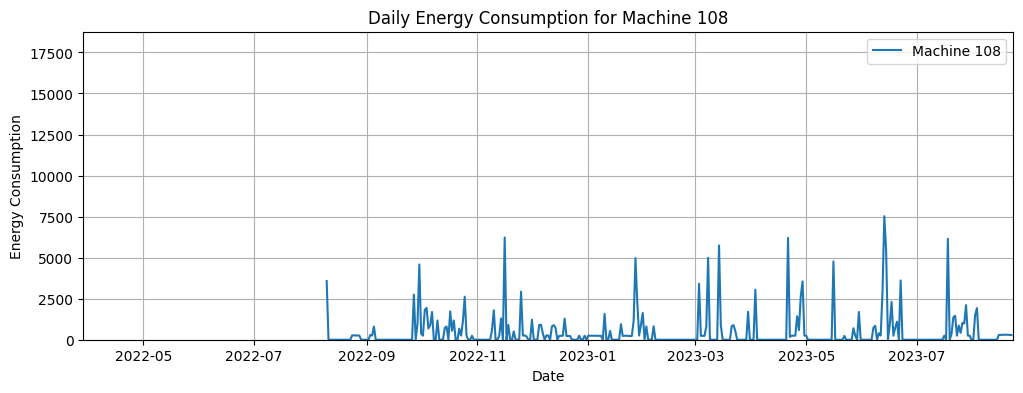

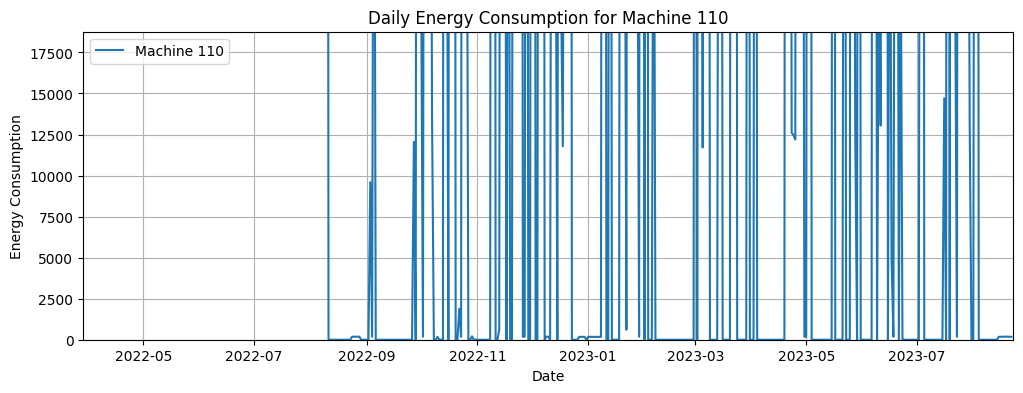

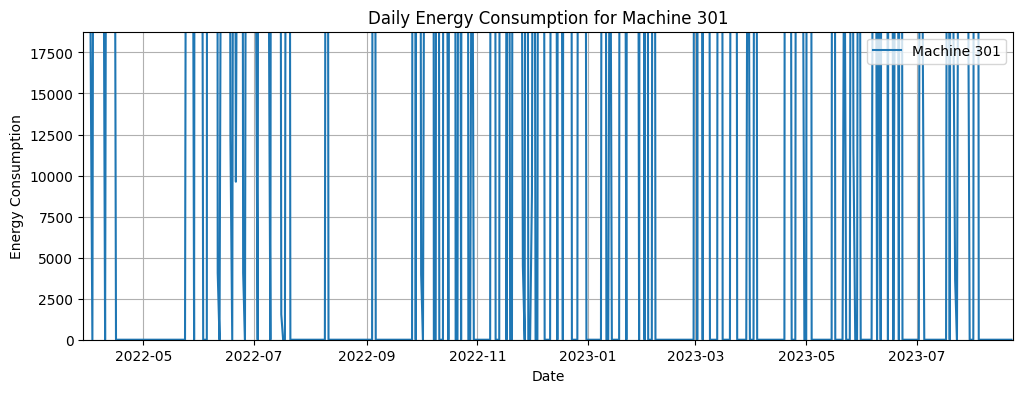

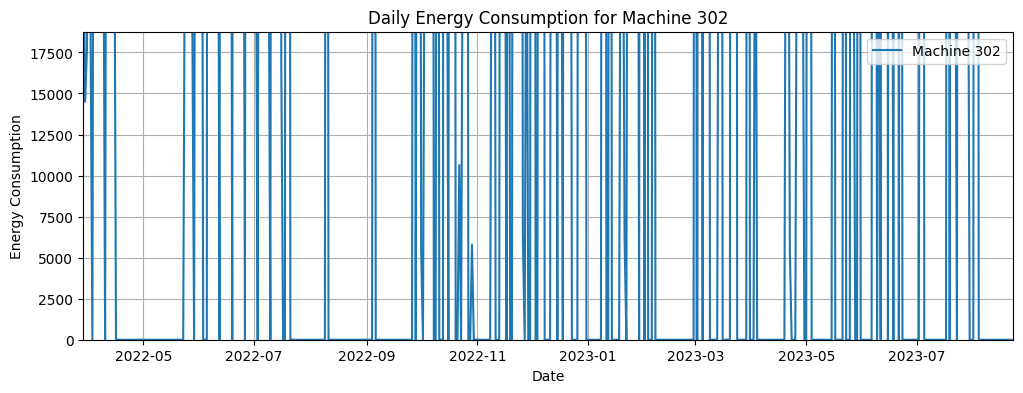

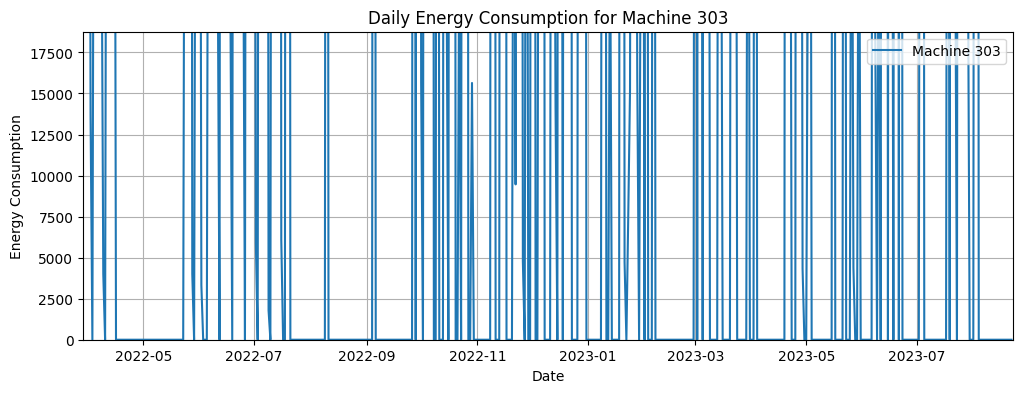

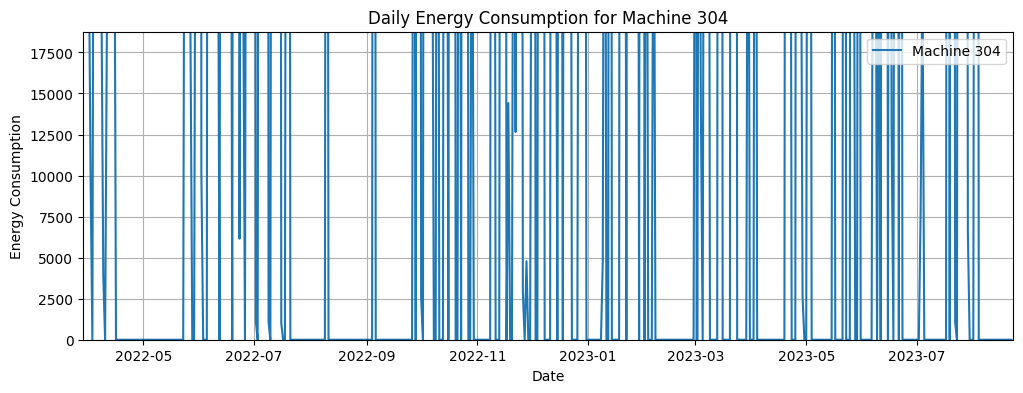

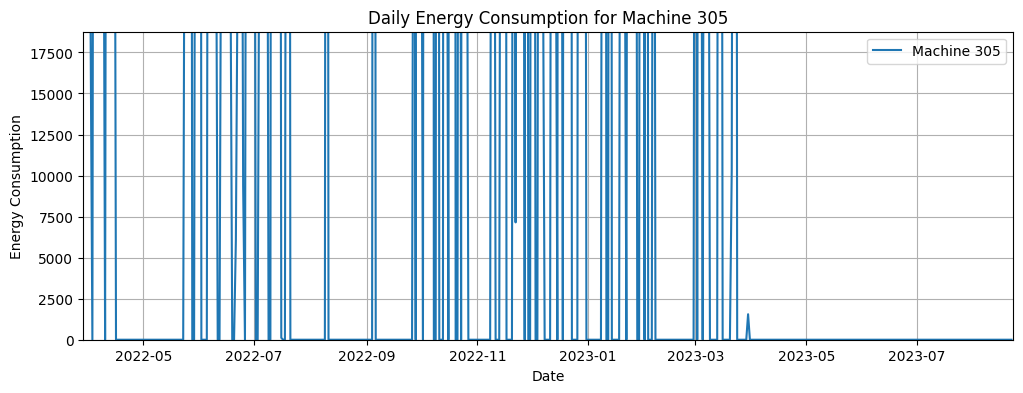

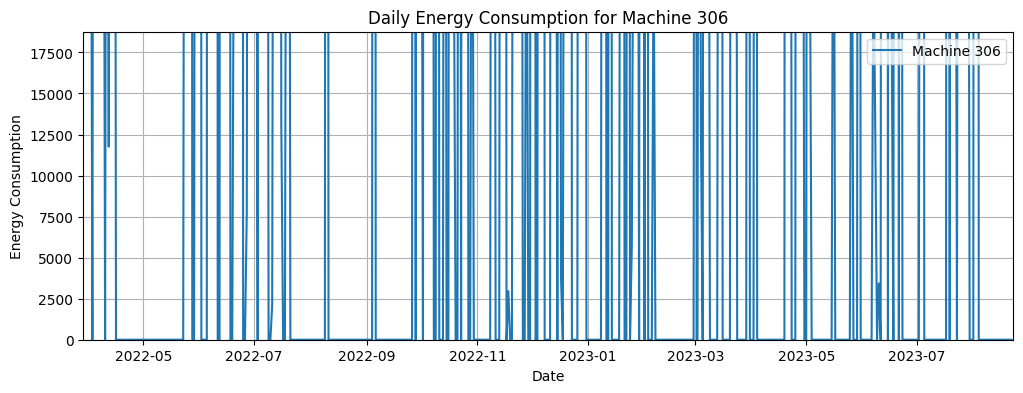

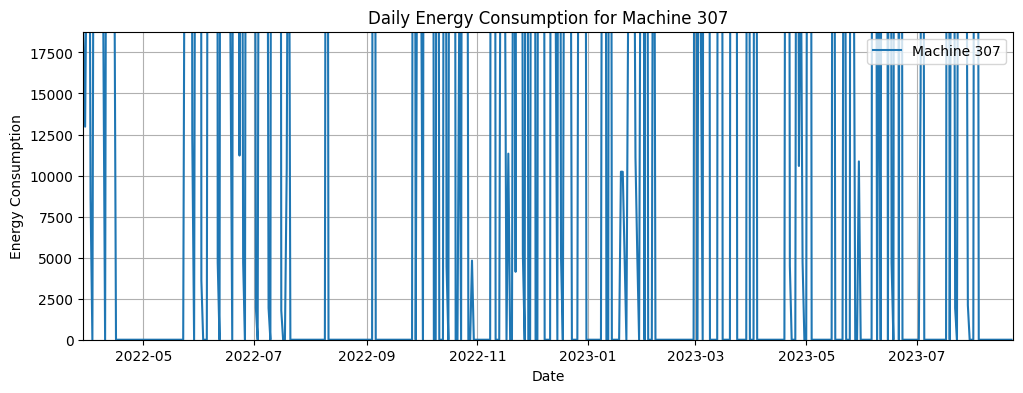

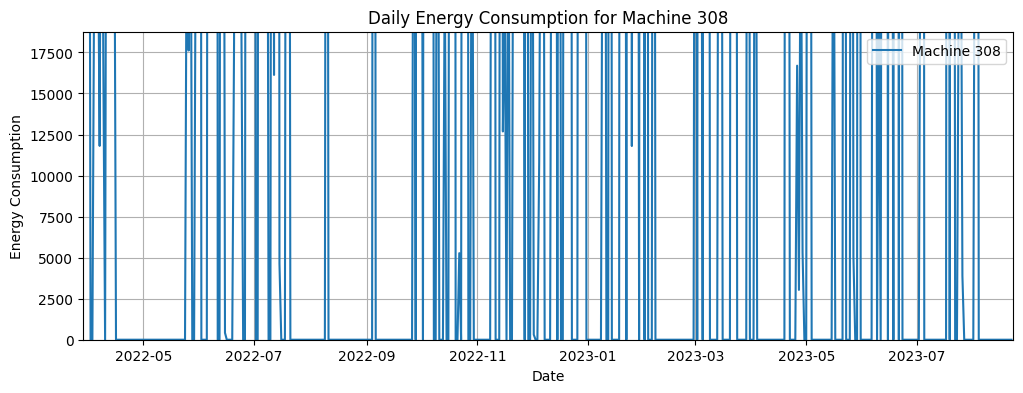

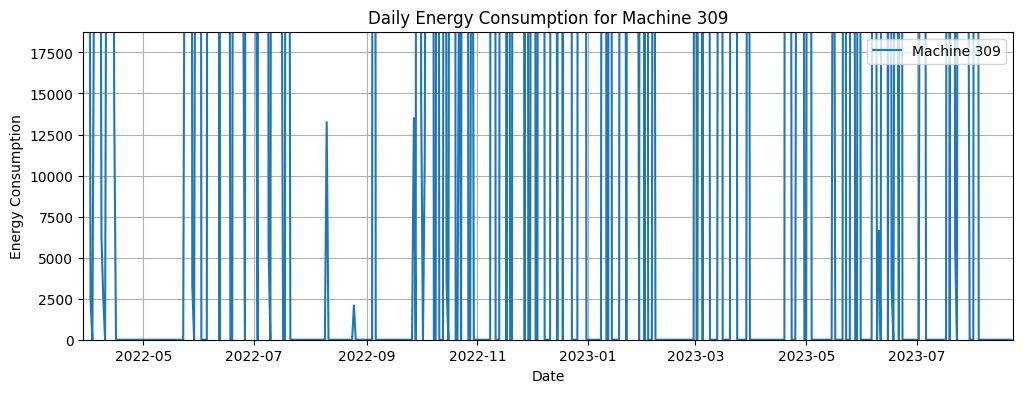

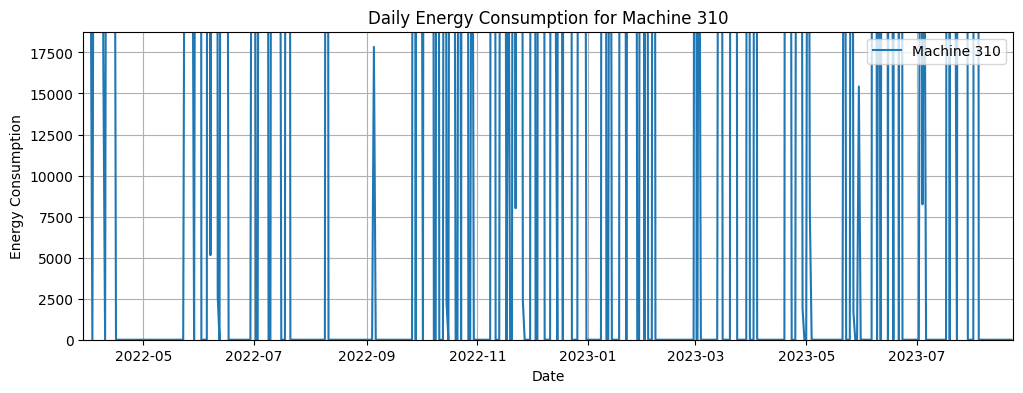

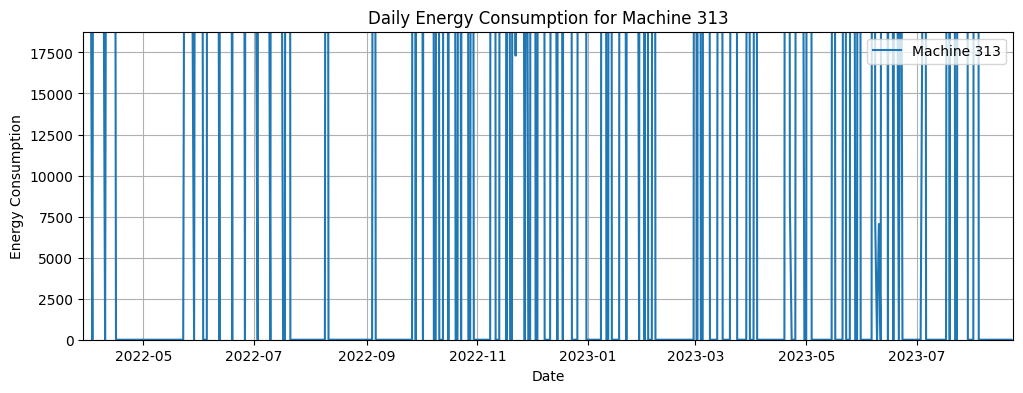

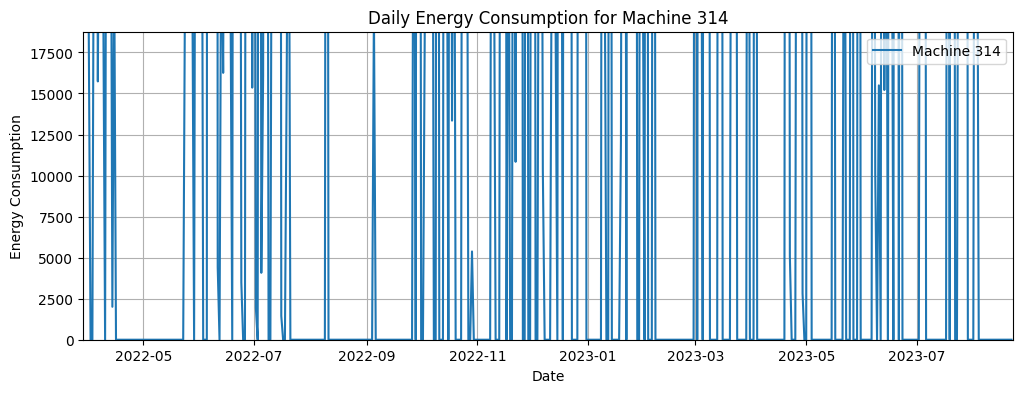

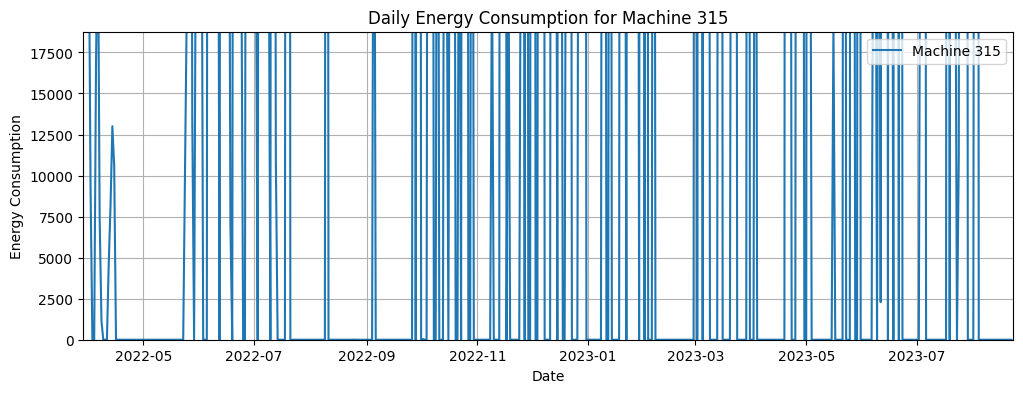

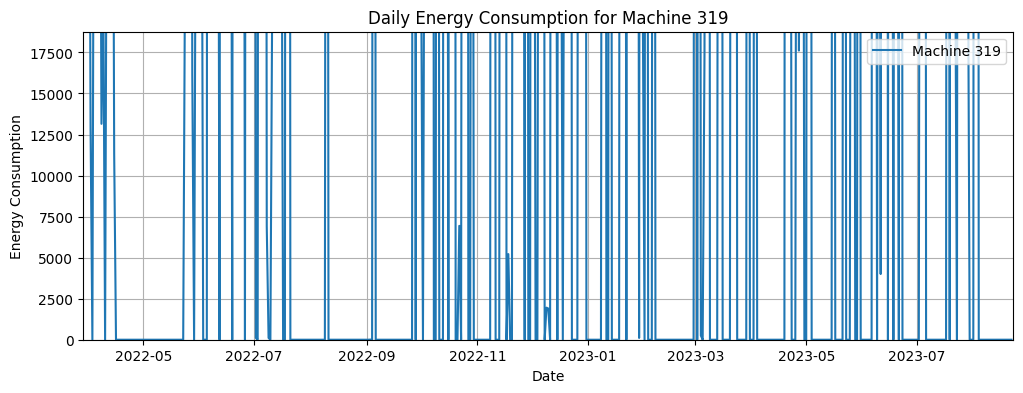

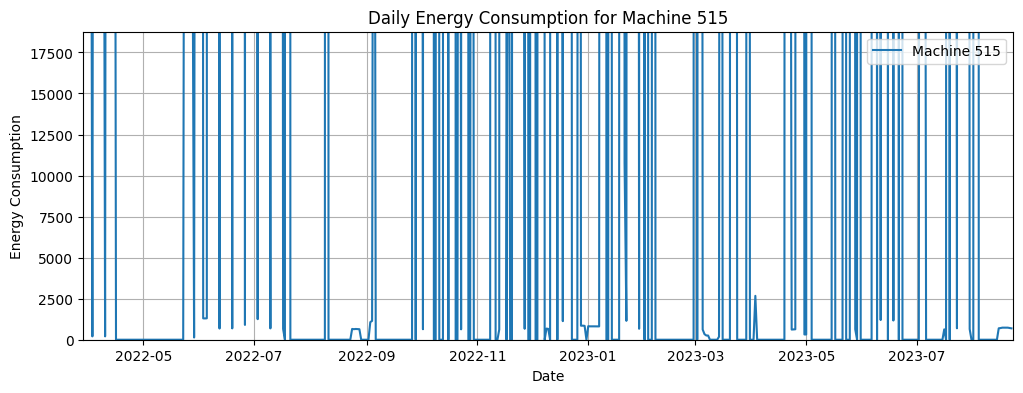

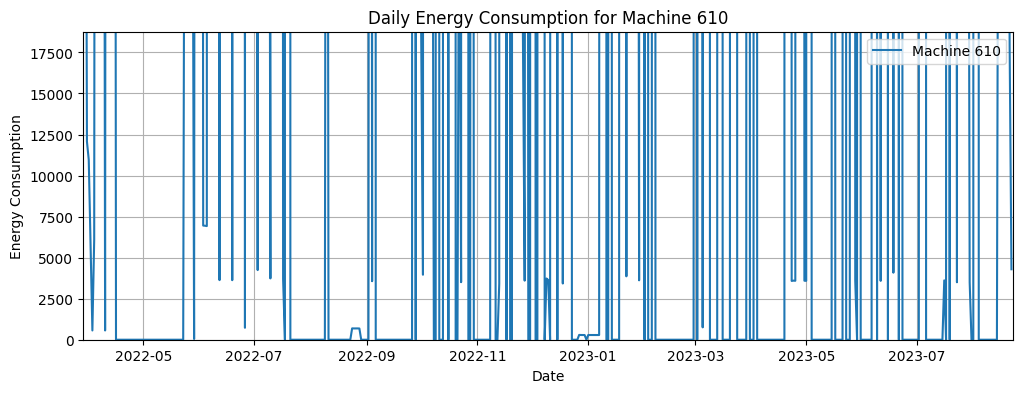

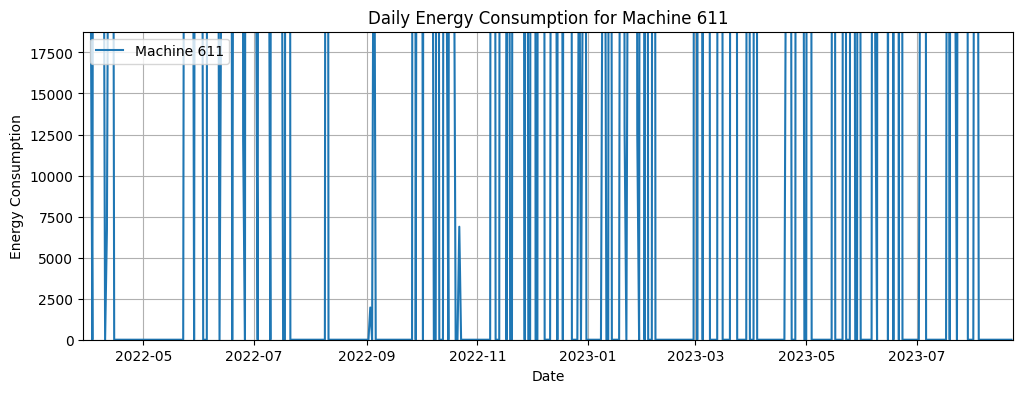

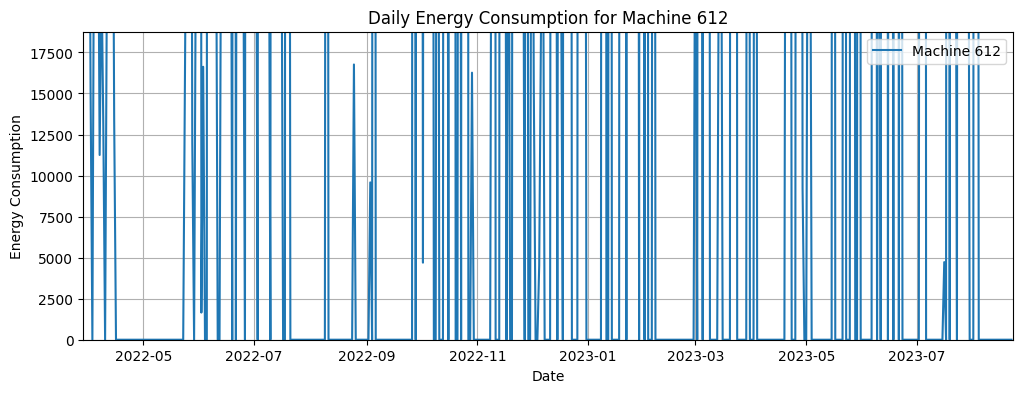

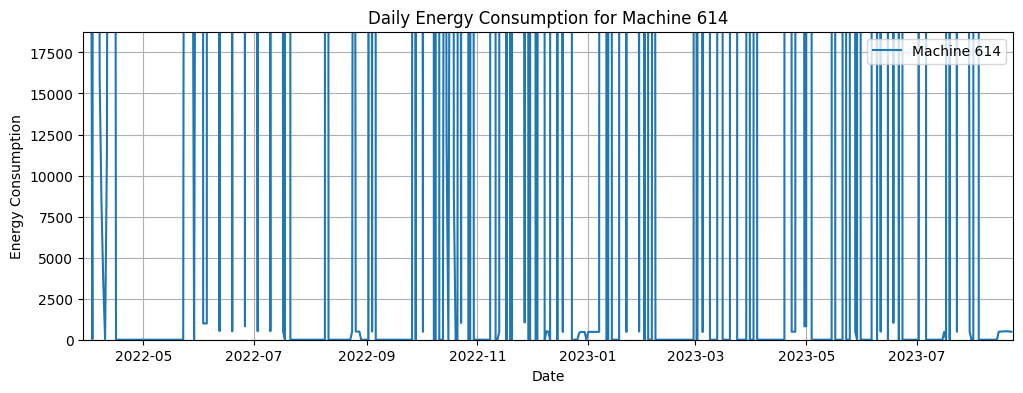

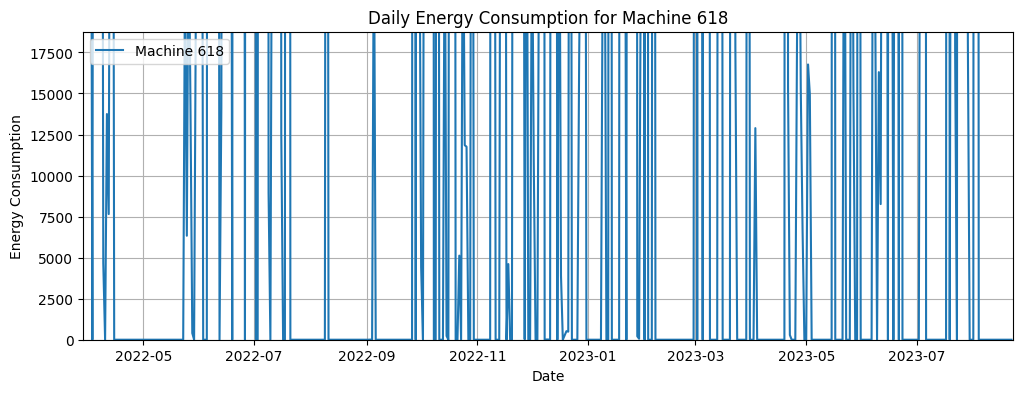

In [33]:
import matplotlib.pyplot as plt

# Unique list of machines
machines = all_data_sorted['channel'].unique()

# Determine the overall limits for x-axis (dates) and y-axis (energy consumption)
min_date, max_date = all_data_sorted['TimeStamp'].min(), all_data_sorted['TimeStamp'].max()
min_energy, max_energy = all_data_sorted['Ea_Imp'].min(), all_data_sorted['Ea_Imp'].max()

# Plot for each machine
for machine in machines:
    machine_data = all_data_sorted[all_data_sorted['channel'] == machine]
    machine_data.set_index('TimeStamp', inplace=True)
    daily_data = machine_data.resample('D')['Ea_Imp'].sum()

    plt.figure(figsize=(12, 4))
    plt.plot(daily_data.index, daily_data.values, label=f'Machine {machine}')
    plt.xlabel('Date')
    plt.ylabel('Energy Consumption')
    plt.title(f'Daily Energy Consumption for Machine {machine}')
    plt.legend()
    plt.grid(True)

    # Set the same scale for each plot
    plt.xlim(min_date, max_date)
    plt.ylim(min_energy, max_energy)

    plt.show()

# **DISTRIBUTION HISTOGRAMS FOR EA_IMP**

Just some distributions histograms to see for each machine the values recorded of energy consuption

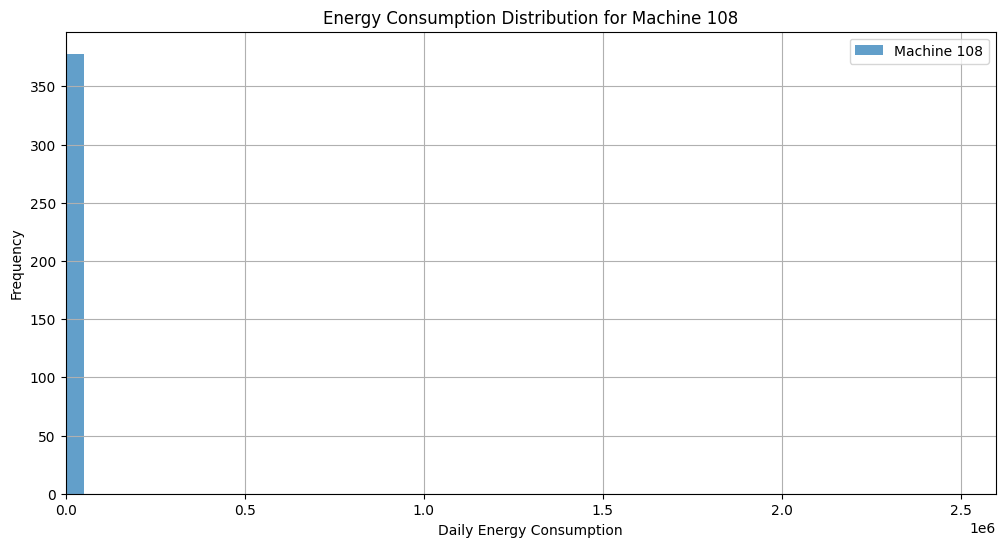

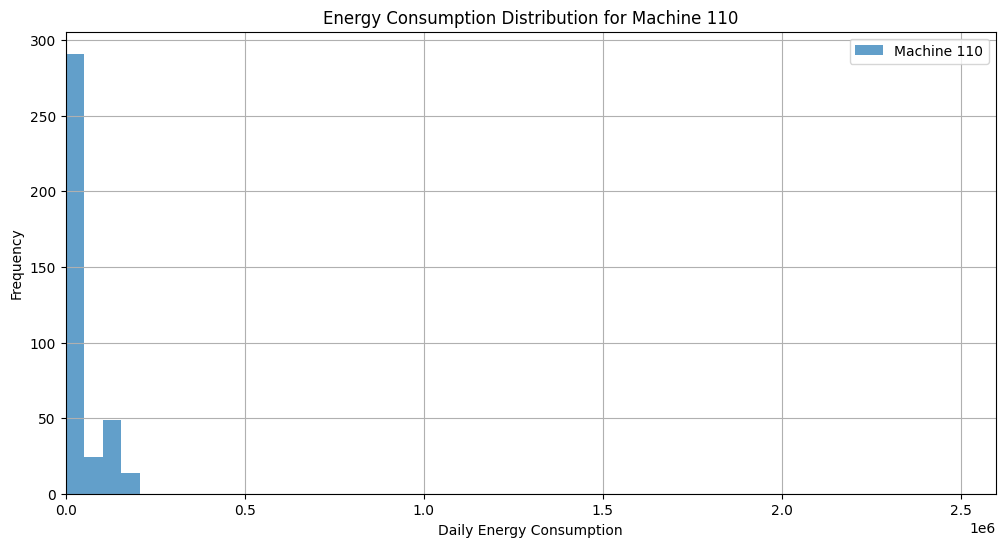

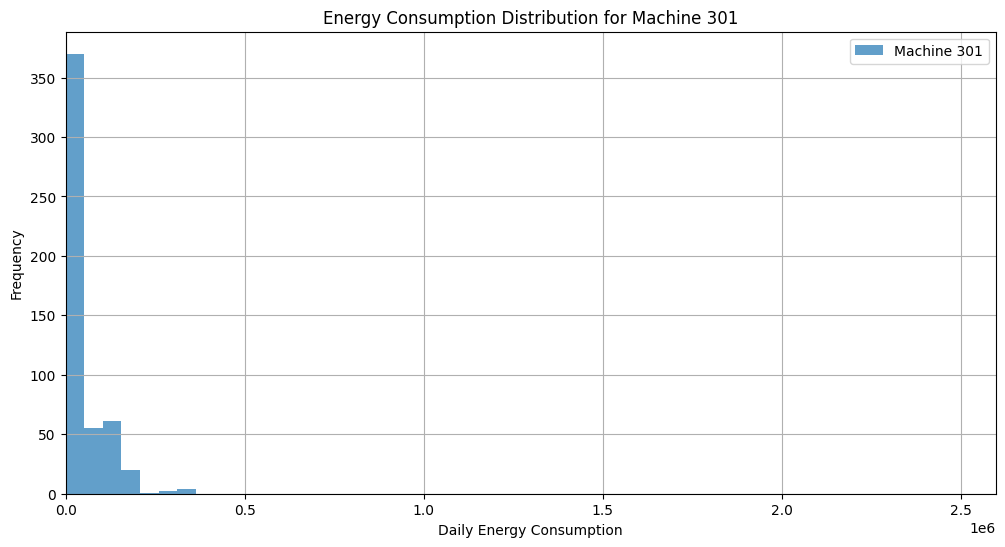

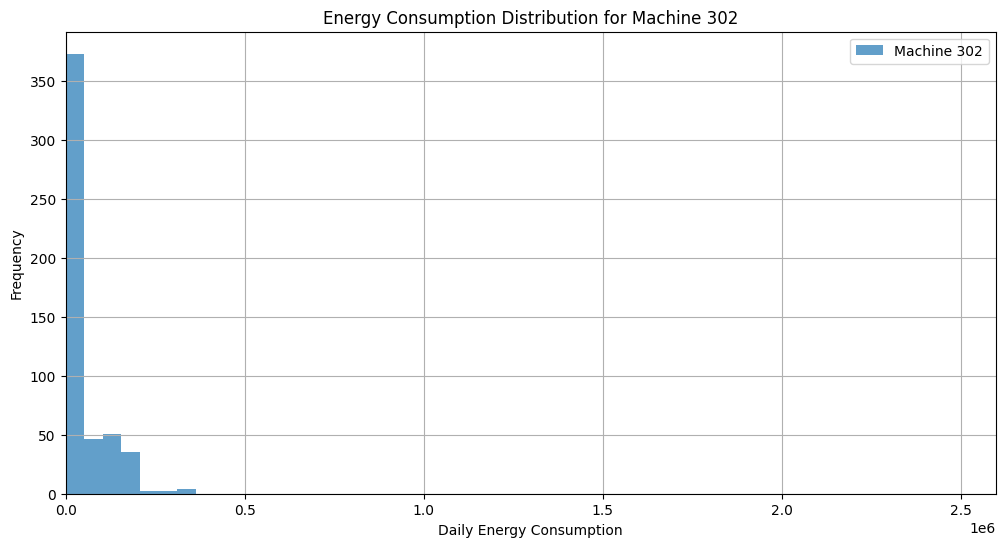

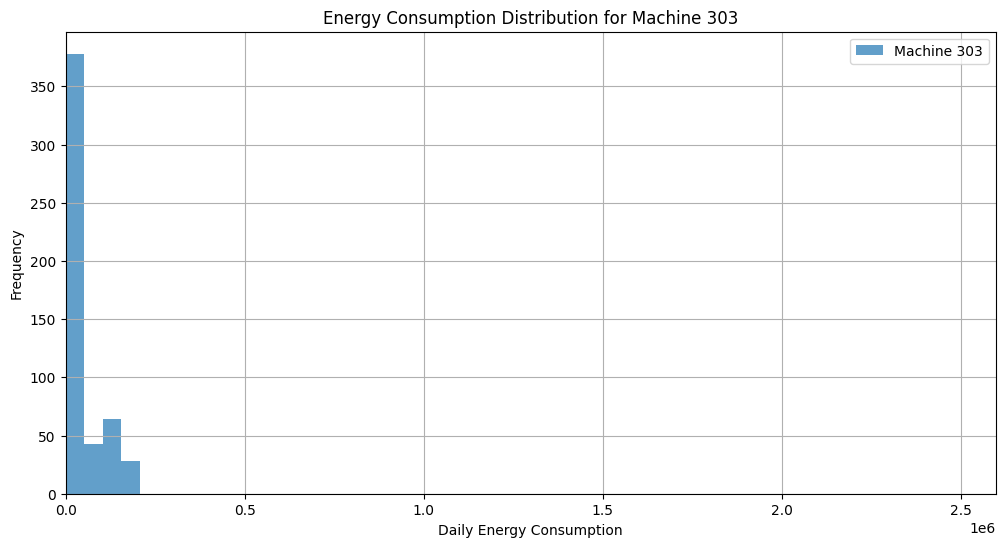

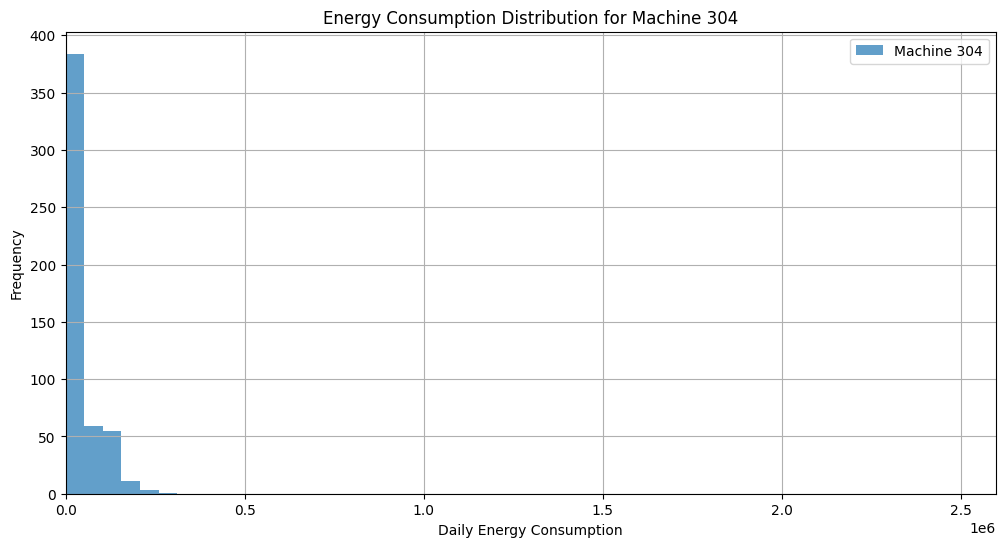

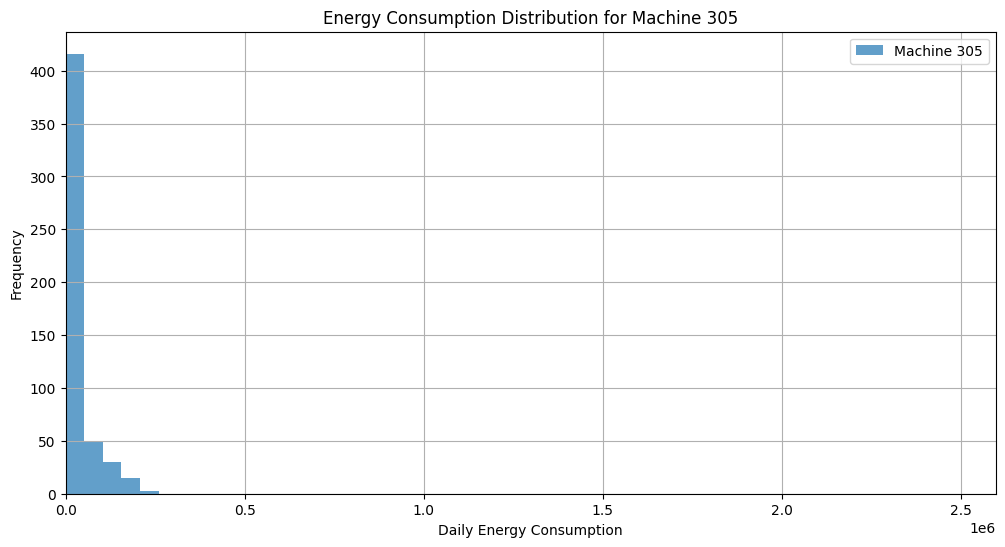

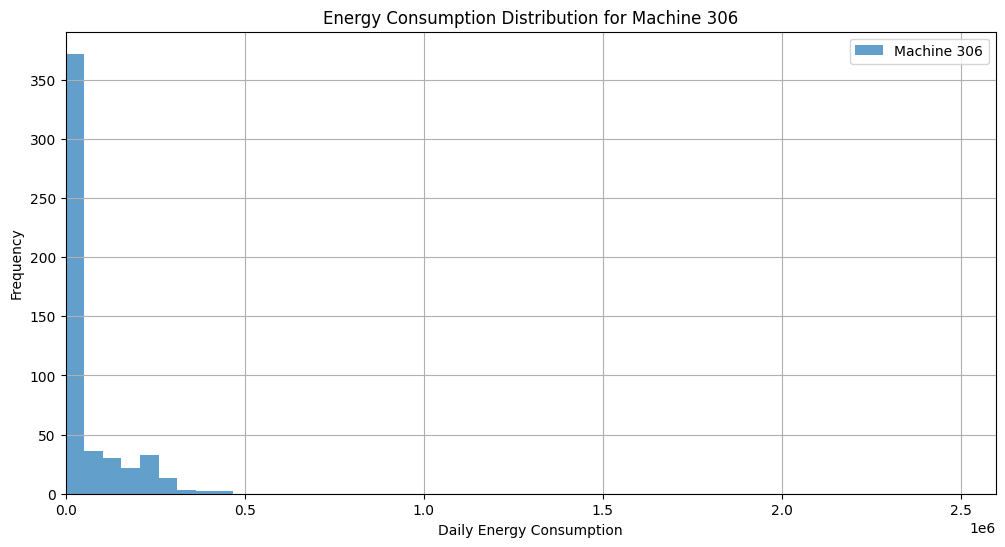

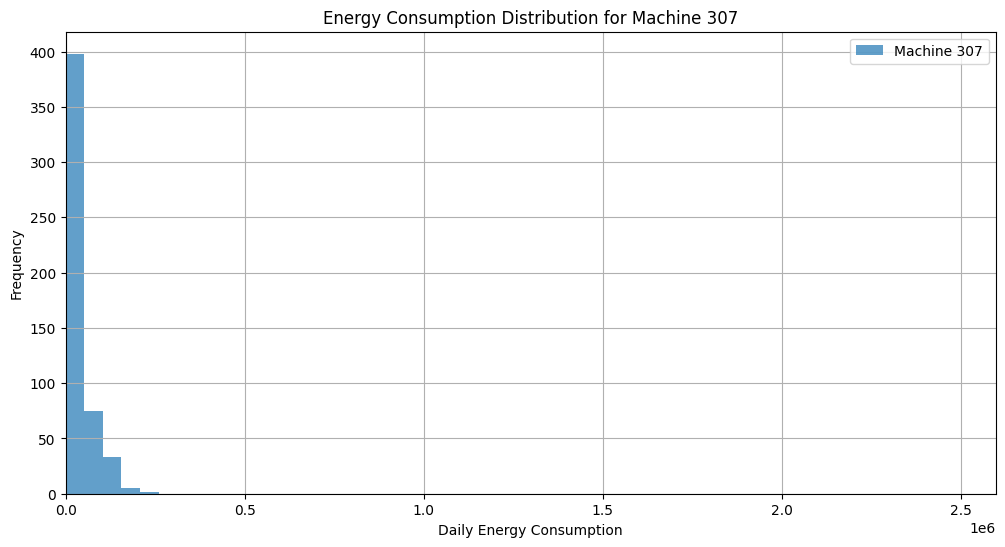

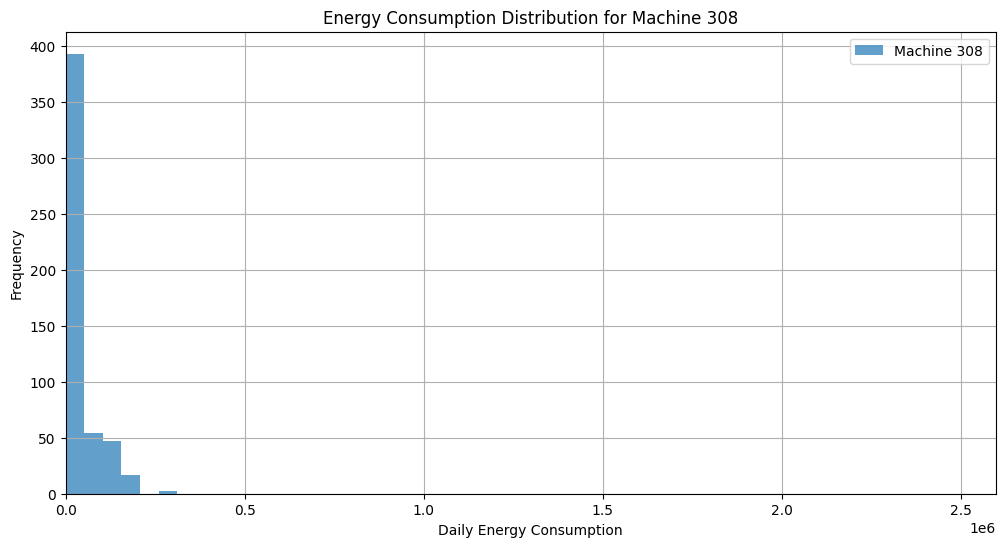

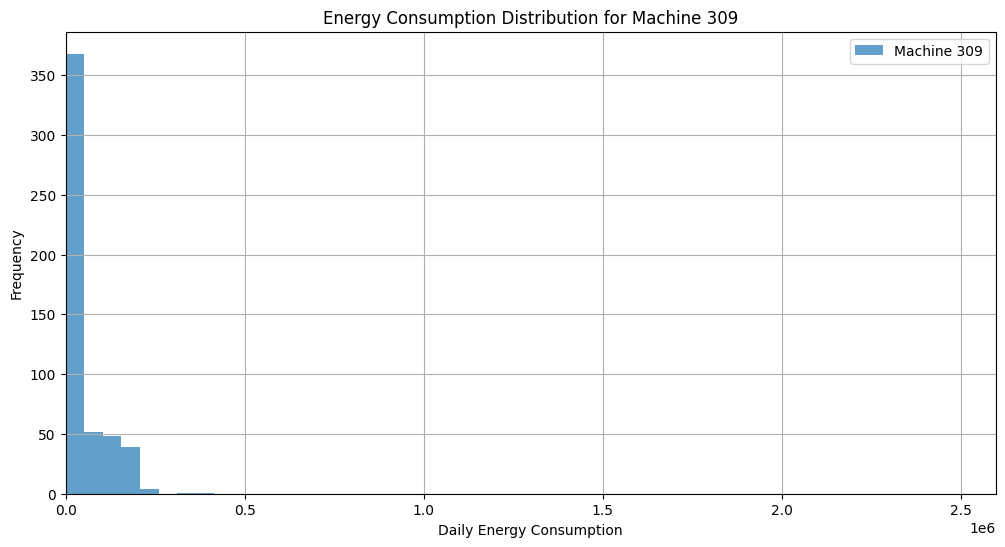

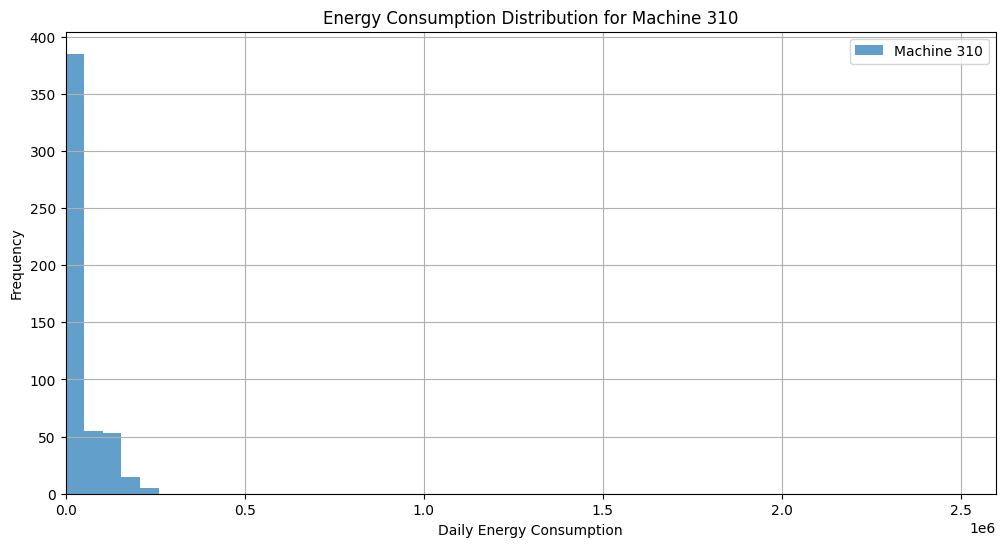

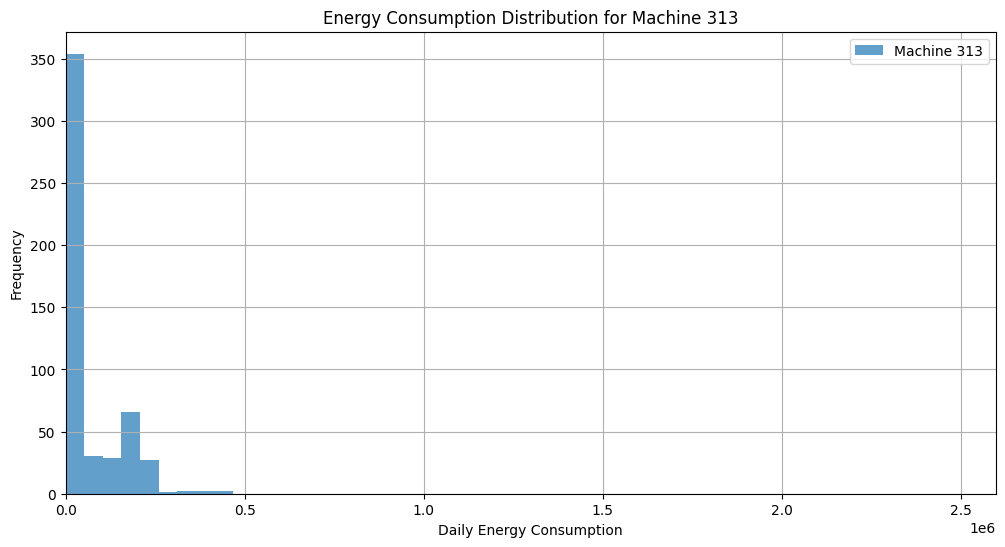

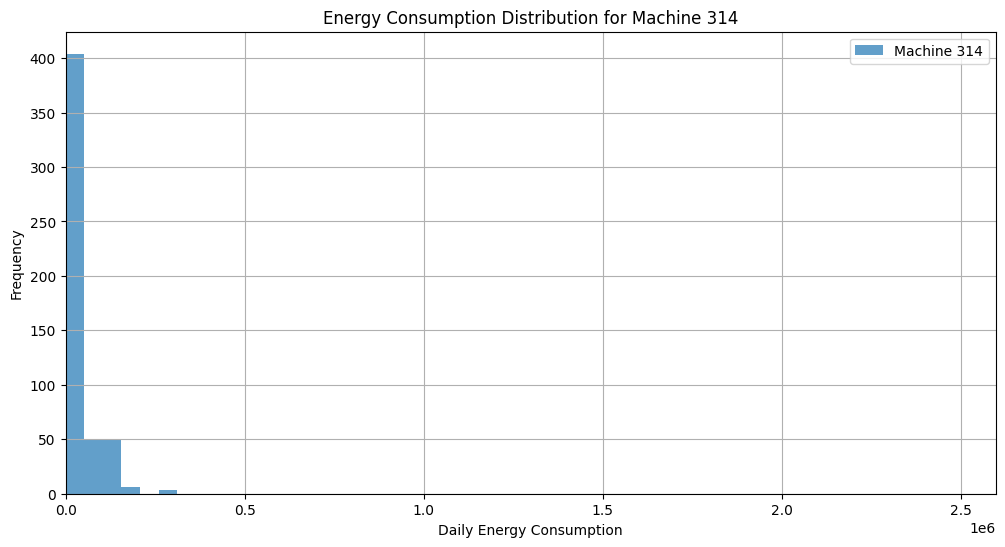

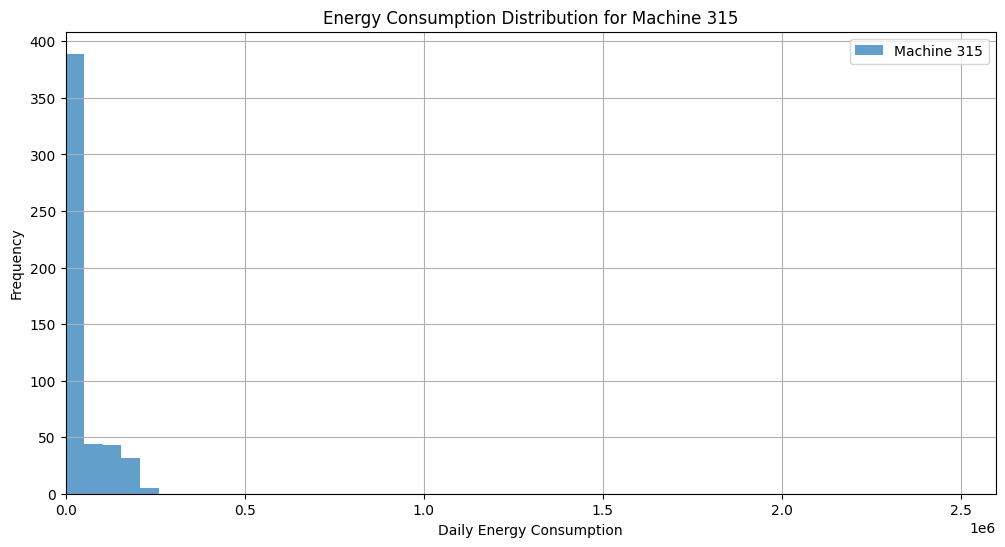

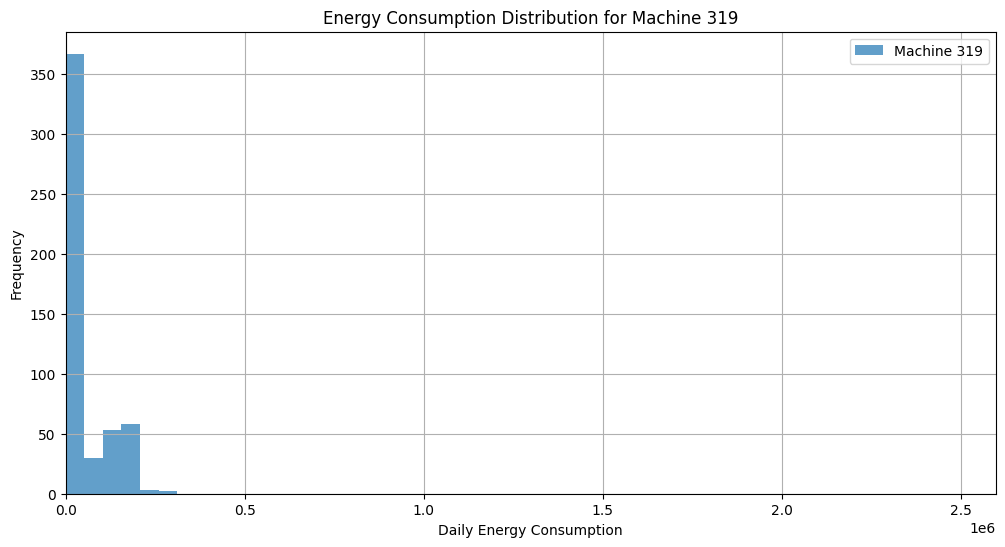

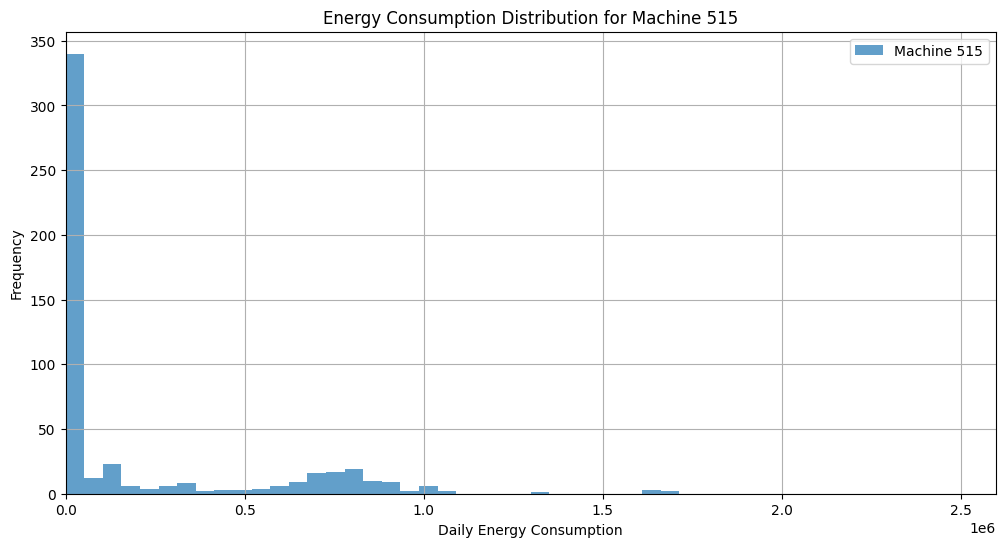

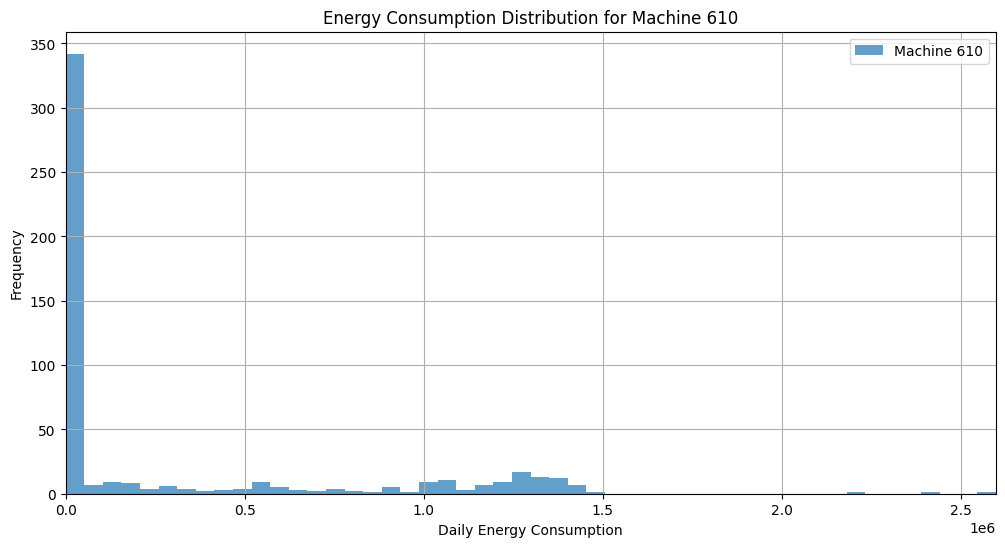

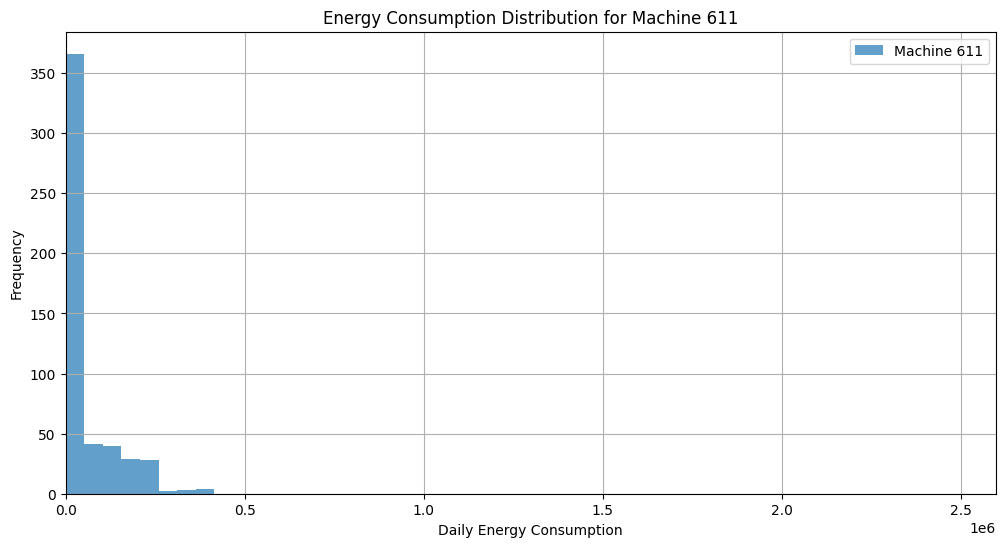

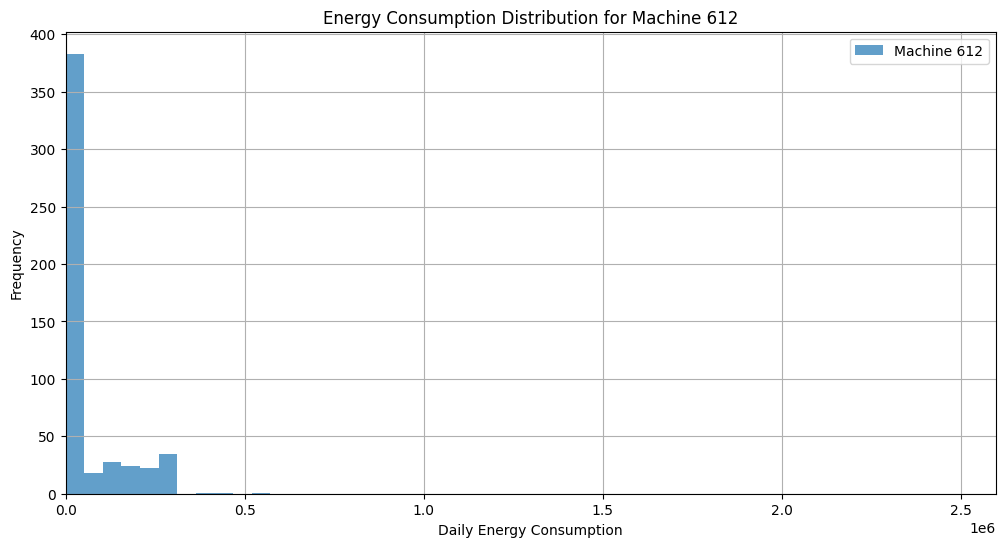

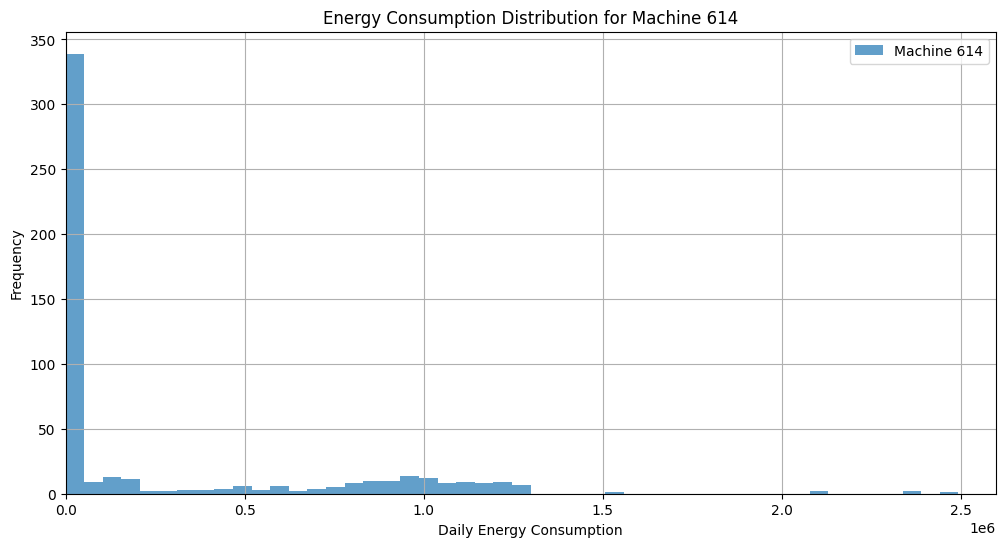

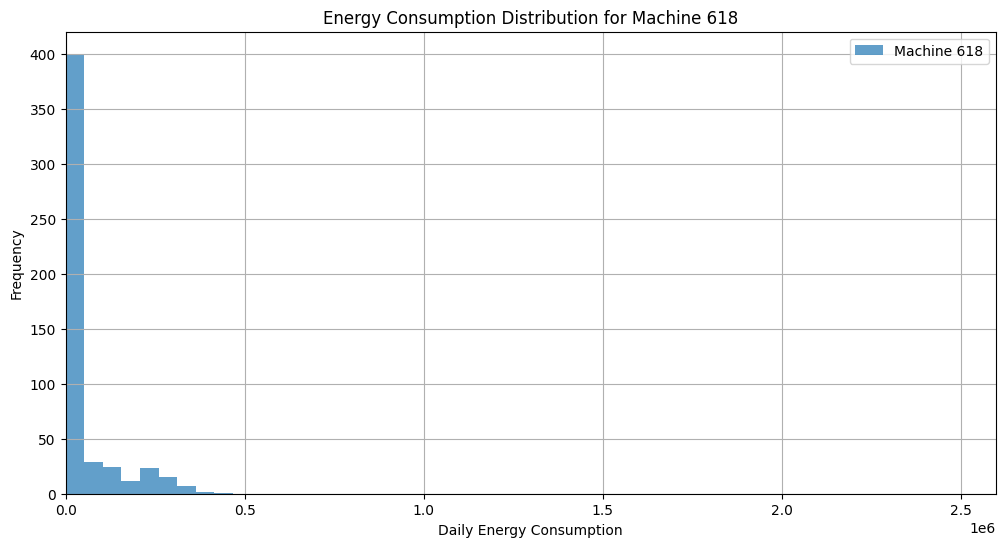

In [35]:
import matplotlib.pyplot as plt

# Unique list of machines
machines = all_data_sorted['channel'].unique()

# Prepare an empty list to collect the daily sums of each machine
all_daily_sums = []

# Loop to calculate daily sums for each machine and store them
for machine in machines:
    machine_data = all_data_sorted[all_data_sorted['channel'] == machine]
    daily_data = machine_data.resample('D', on='TimeStamp')['Ea_Imp'].sum()
    all_daily_sums.extend(daily_data.values)  # Extend the list with daily sums

# Determine the global min and max daily energy consumption
global_min_energy = min(all_daily_sums)
global_max_energy = max(all_daily_sums)

# Histogram bin size
bin_size = 50

# Loop through each machine and create a histogram with consistent x-axis limits
for machine in machines:
    machine_data = all_data_sorted[all_data_sorted['channel'] == machine]
    daily_data = machine_data.resample('D', on='TimeStamp')['Ea_Imp'].sum()

    plt.figure(figsize=(12, 6))
    plt.hist(daily_data, bins=bin_size, alpha=0.7, label=f'Machine {machine}',
             range=(global_min_energy, global_max_energy))  # Set the range for x-axis

    plt.xlabel('Daily Energy Consumption')
    plt.ylabel('Frequency')
    plt.title(f'Energy Consumption Distribution for Machine {machine}')
    plt.legend()
    plt.grid(True)

    # Set the same x-axis scale for each histogram
    plt.xlim(global_min_energy, global_max_energy)

    plt.show()

# **Summary Statistics**

Printed summary statistics for each machine, like the mean, standard deviation, min & max, and percentiles.

In [14]:
# Group data by machine_id
grouped_data = all_data_sorted.groupby('channel')

# Statistical Summary and Outlier Detection for each machine
for channel, data in grouped_data:
    print(f"\n\nMachine ID: {channel}")
    print("-" * 30)  # This adds a line of dashes for visual separation

    # Summary Statistics
    summary_stats = data['Ea_Imp'].describe()
    print("Summary Statistics:")
    print(summary_stats)

    # Outlier Detection
    Q1 = data['Ea_Imp'].quantile(0.25)
    Q3 = data['Ea_Imp'].quantile(0.75)
    IQR = Q3 - Q1
    outliers = data[(data['Ea_Imp'] < (Q1 - 1.5 * IQR)) | (data['Ea_Imp'] > (Q3 + 1.5 * IQR))]
    print(f"Number of Outliers: {outliers.shape[0]}")
    print("-" * 30)  # End of section for a machine



Machine ID: 108
------------------------------
Summary Statistics:
count    13452.000000
mean        12.850461
std         27.166082
min          0.000000
25%          2.500000
50%          2.700000
75%          3.200000
max        271.300000
Name: Ea_Imp, dtype: float64
Number of Outliers: 5814
------------------------------


Machine ID: 110
------------------------------
Summary Statistics:
count    14801.000000
mean       798.777596
std        800.988445
min          0.000000
25%          2.000000
50%        621.000000
75%       1657.900000
max       2564.300000
Name: Ea_Imp, dtype: float64
Number of Outliers: 0
------------------------------


Machine ID: 301
------------------------------
Summary Statistics:
count    27185.000000
mean       702.691234
std        786.340038
min          0.000000
25%          0.000000
50%        410.300000
75%       1540.900000
max       2409.400000
Name: Ea_Imp, dtype: float64
Number of Outliers: 0
------------------------------


Machine ID: 30

# **Here i combine all the fermate file.**

In [15]:
import glob
import pandas as pd

# Path to FERMATE files
path_to_fermatefiles = '/content/drive/My Drive/Dati-TBDM/fermi/fermi/Fermate/*'

# Read all files and combine them
all_fermate_files = glob.glob(path_to_fermatefiles)
fermate_df = pd.concat((pd.read_excel(f) for f in all_fermate_files), ignore_index=True)

# **Printing some basic informations, I can see that there are not any missing values, in fact the entries and the non null count are the same. I can also see that i probably need to apply one hot encoding to desferm to make it a numerical value.**

In [16]:
print(fermate_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364231 entries, 0 to 364230
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   SHIFT_DATE        364231 non-null  datetime64[ns]
 1   SHIFT_CODE        364231 non-null  int64         
 2   SHIFT_START       364231 non-null  datetime64[ns]
 3   SHIFT_END         364231 non-null  datetime64[ns]
 4   START_DATE        364231 non-null  datetime64[ns]
 5   END_DATE          364231 non-null  datetime64[ns]
 6   RESOURCE          364231 non-null  int64         
 7   PRODUCTION_ORDER  364231 non-null  int64         
 8   STAGE             364231 non-null  int64         
 9   STOP_CODE         364231 non-null  int64         
 10  T_STOP            364231 non-null  int64         
 11  QTY_GOOD          364231 non-null  int64         
 12  QTY_SCRAP         364231 non-null  int64         
 13  DESFERM           364231 non-null  object        
dtypes: d

In [17]:
print(fermate_df.describe())

       SHIFT_CODE       RESOURCE  PRODUCTION_ORDER          STAGE  \
count    364231.0  364231.000000      3.642310e+05  364231.000000   
mean          0.0     283.653099      9.942830e+09      10.004667   
std           0.0     175.957724      4.054082e+05       0.629846   
min           0.0     101.000000      9.941062e+09      10.000000   
25%           0.0     201.000000      9.943010e+09      10.000000   
50%           0.0     211.000000      9.943031e+09      10.000000   
75%           0.0     315.000000      9.943061e+09      10.000000   
max           0.0     618.000000      9.943112e+09      95.000000   

           STOP_CODE         T_STOP       QTY_GOOD      QTY_SCRAP  
count  364231.000000  364231.000000  364231.000000  364231.000000  
mean        8.518374      10.452754       0.035604       0.675385  
std         7.056213      46.311904      39.193733      31.181664  
min         0.000000       1.000000   -7000.000000       0.000000  
25%         0.000000       1.000000   

# **Check**
Here I'm just checking to see if the columns SHIFT_START and START_DATE are the same. Since we dont want duplicated values in our dataframes, as you can see they are the same so I can decide to drop the clones.

In [18]:
same_start = fermate_df['SHIFT_START'] == fermate_df['START_DATE']

# Verificare se SHIFT_END è uguale a END_DATE
same_end = fermate_df['SHIFT_END'] == fermate_df['END_DATE']

# Controllare se tutti i valori corrispondono
all_same_start = same_start.all()
all_same_end = same_end.all()

print(f"Tutti i valori in SHIFT_START e START_DATE sono uguali: {all_same_start}")
print(f"Tutti i valori in SHIFT_END e END_DATE sono uguali: {all_same_end}")

Tutti i valori in SHIFT_START e START_DATE sono uguali: True
Tutti i valori in SHIFT_END e END_DATE sono uguali: True


In [19]:
# Assuming fermate_df is your DataFrame

# Drop the duplicate columns
fermate_df = fermate_df.drop(columns=['START_DATE', 'END_DATE'])

# Now, fermate_df will have only one of each pair of the duplicate columns


In [20]:
print(fermate_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364231 entries, 0 to 364230
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   SHIFT_DATE        364231 non-null  datetime64[ns]
 1   SHIFT_CODE        364231 non-null  int64         
 2   SHIFT_START       364231 non-null  datetime64[ns]
 3   SHIFT_END         364231 non-null  datetime64[ns]
 4   RESOURCE          364231 non-null  int64         
 5   PRODUCTION_ORDER  364231 non-null  int64         
 6   STAGE             364231 non-null  int64         
 7   STOP_CODE         364231 non-null  int64         
 8   T_STOP            364231 non-null  int64         
 9   QTY_GOOD          364231 non-null  int64         
 10  QTY_SCRAP         364231 non-null  int64         
 11  DESFERM           364231 non-null  object        
dtypes: datetime64[ns](3), int64(8), object(1)
memory usage: 33.3+ MB
None


# **Machinery code standardization**
For consistency and to standardize informations in both our dataframes im gonna change the machinery code in the fermate_df since they are different from the ones in the energy df. To do so I'm just gonna delete the starting zero from the resource column for each row.

In [21]:
# Convert the 'resource' column to string, then strip leading zeros
fermate_df['RESOURCE'] = fermate_df['RESOURCE'].astype(str).str.lstrip('0')

# **Removing machines**
Here im just removing the machines that are present in the fermate df but not in the one with the logs of the energy consuptions. This is cause its not useful for our analysis if a machine doesnt have the logs of their energy consuptions as we cannot do any further

In [22]:
# Convert the machine code columns to the same type (if they are not already)
fermate_df['RESOURCE'] = fermate_df['RESOURCE'].astype(str)
all_data_sorted['channel'] = all_data_sorted['channel'].astype(str)

# Filter the fermate_df to only include machines that are present in all_data_sorted
fermate_df = fermate_df[fermate_df['RESOURCE'].isin(all_data_sorted['channel'])]

# **Saving the new fermate dataframe**
Here with this simple snippet of code im saving the fermate dataframe after the processing in my drive.

In [23]:
# Specify the output file path
output_file_path = '/content/drive/My Drive/processed_fermate_data.csv'

# Save the DataFrame to a CSV file
fermate_df.to_csv(output_file_path, index=False)

print(f"DataFrame saved to {output_file_path}")


DataFrame saved to /content/drive/My Drive/processed_fermate_data.csv


In [37]:
#Converting the resource type to int
fermate_df['RESOURCE'] = fermate_df['RESOURCE'].astype(int)

In [38]:
print(fermate_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102827 entries, 9502 to 364230
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype              
---  ------            --------------   -----              
 0   SHIFT_DATE        102827 non-null  datetime64[ns, UTC]
 1   SHIFT_CODE        102827 non-null  int64              
 2   SHIFT_START       102827 non-null  datetime64[ns, UTC]
 3   SHIFT_END         102827 non-null  datetime64[ns, UTC]
 4   RESOURCE          102827 non-null  int64              
 5   PRODUCTION_ORDER  102827 non-null  int64              
 6   STAGE             102827 non-null  int64              
 7   STOP_CODE         102827 non-null  int64              
 8   T_STOP            102827 non-null  int64              
 9   QTY_GOOD          102827 non-null  int64              
 10  QTY_SCRAP         102827 non-null  int64              
 11  DESFERM           102827 non-null  object             
dtypes: datetime64[ns, UTC](3), int64(8), obje

In [39]:
print(all_data_sorted.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 567805 entries, 0 to 825140
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype              
---  ------     --------------   -----              
 0   id         567805 non-null  int64              
 1   TimeStamp  567805 non-null  datetime64[ns, UTC]
 2   Ea_Imp     567805 non-null  float64            
 3   channel    567805 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(1), object(1)
memory usage: 21.7+ MB
None


In [40]:
print(fermate_df.describe())

       SHIFT_CODE       RESOURCE  PRODUCTION_ORDER     STAGE      STOP_CODE  \
count    102827.0  102827.000000      1.028270e+05  102827.0  102827.000000   
mean          0.0     372.357328      9.942858e+09      10.0       8.509069   
std           0.0     180.177680      3.808512e+05       0.0       6.919263   
min           0.0     108.000000      9.941123e+09      10.0       0.000000   
25%           0.0     302.000000      9.943010e+09      10.0       0.000000   
50%           0.0     310.000000      9.943031e+09      10.0      11.000000   
75%           0.0     610.000000      9.943061e+09      10.0      15.000000   
max           0.0     618.000000      9.943102e+09      10.0      15.000000   

              T_STOP       QTY_GOOD      QTY_SCRAP  
count  102827.000000  102827.000000  102827.000000  
mean       13.683673      -0.247328       0.431112  
std        56.455398      18.737138      18.504152  
min         1.000000   -5000.000000       0.000000  
25%         1.000000   

# **Time Conversion**

In [27]:
fermate_df['SHIFT_DATE'] = fermate_df['SHIFT_DATE'].dt.tz_localize('Europe/Rome').dt.tz_convert('UTC')
fermate_df['SHIFT_START'] = fermate_df['SHIFT_START'].dt.tz_localize('Europe/Rome').dt.tz_convert('UTC')
fermate_df['SHIFT_END'] = fermate_df['SHIFT_END'].dt.tz_localize('Europe/Rome').dt.tz_convert('UTC')

# **DISTRIBUTION HISTOGRAMS FOR THE FERMATE DATAFRAME**

Plotting histograms for each machine in the fermate dataframe regarding numerical columns and their values.

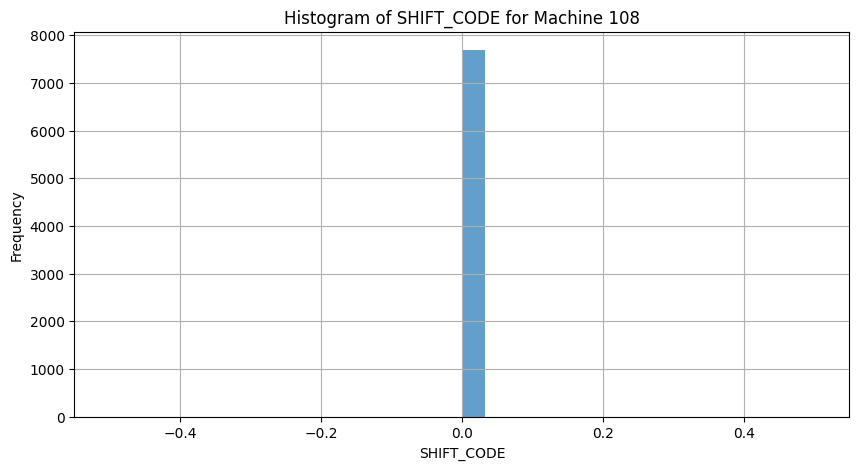

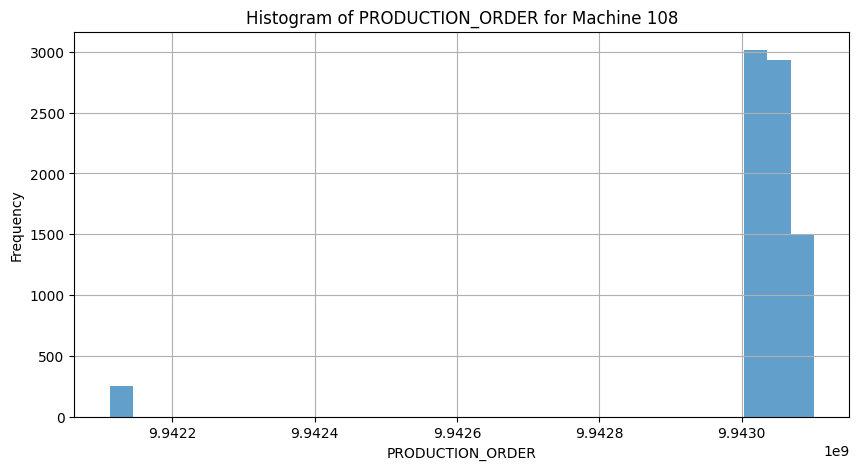

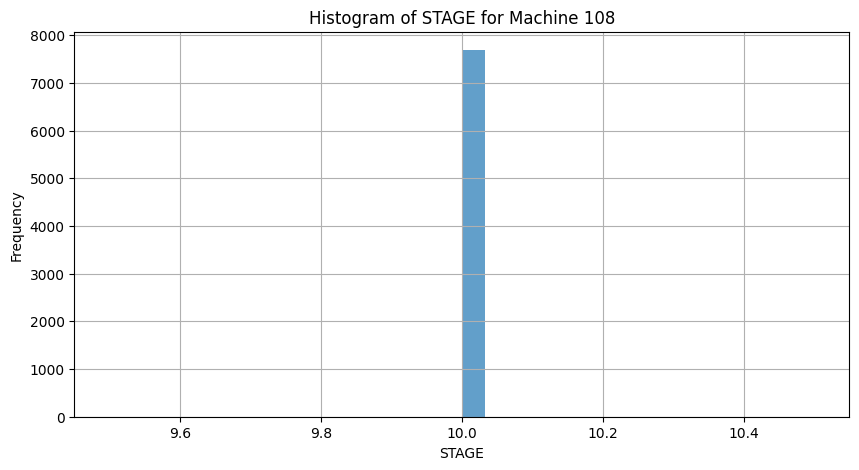

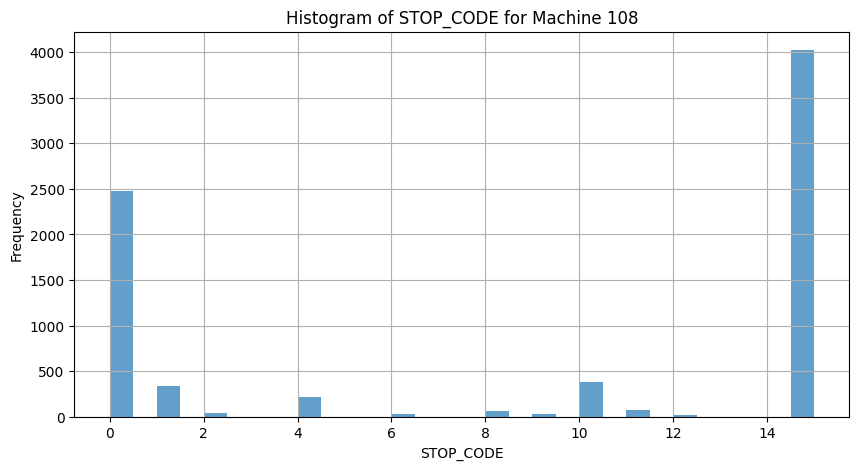

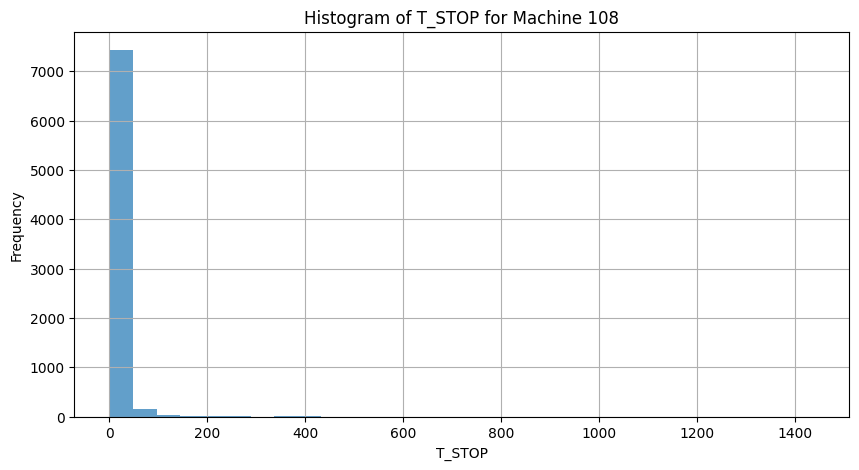

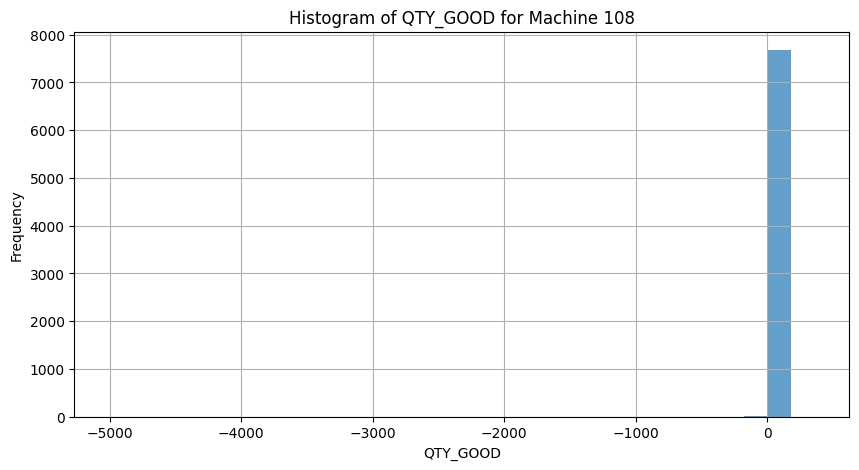

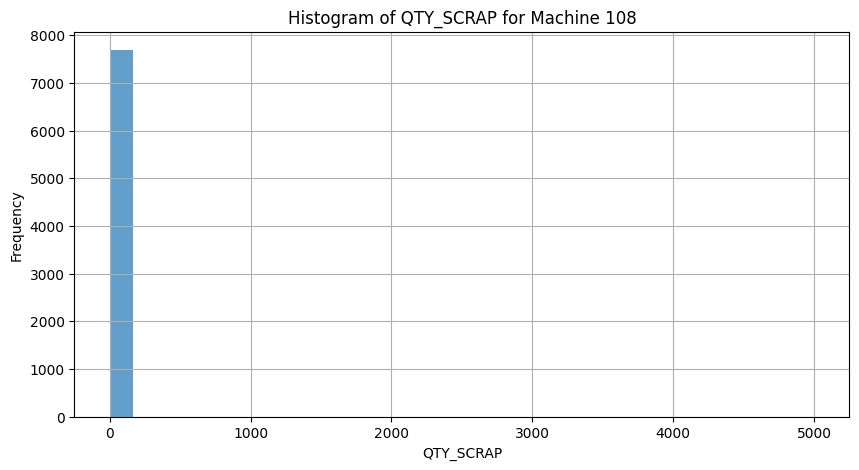

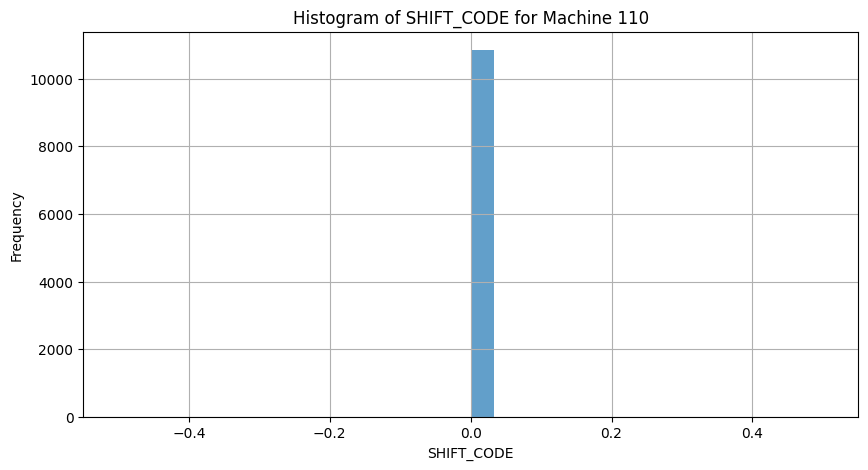

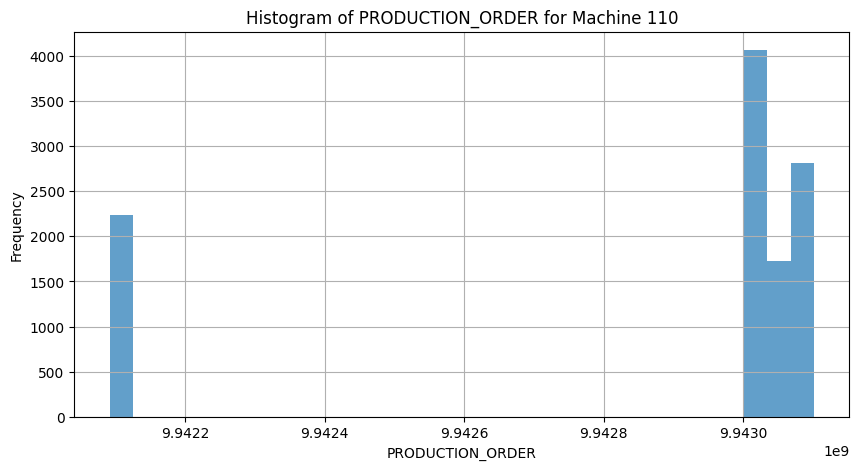

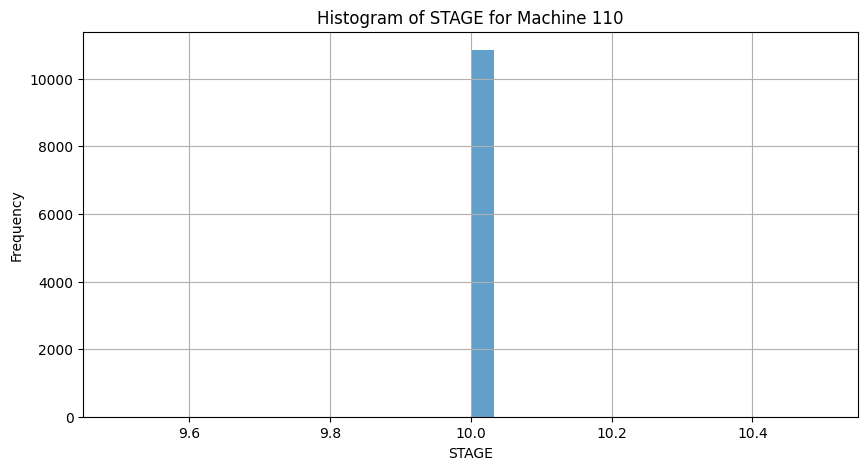

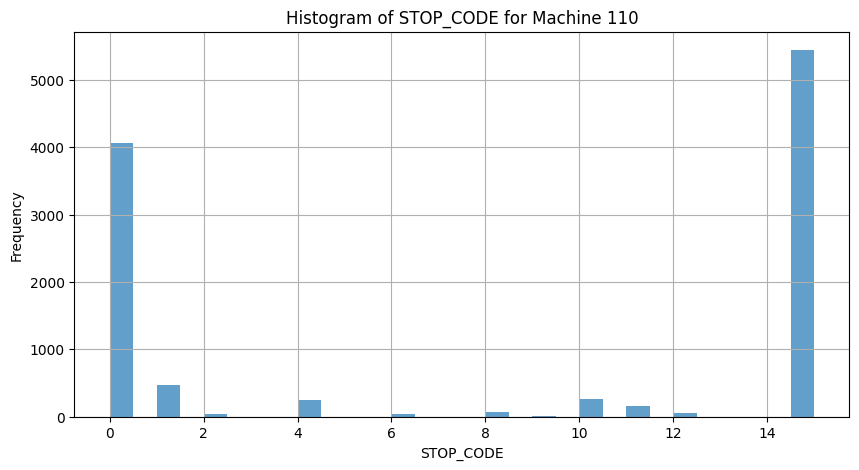

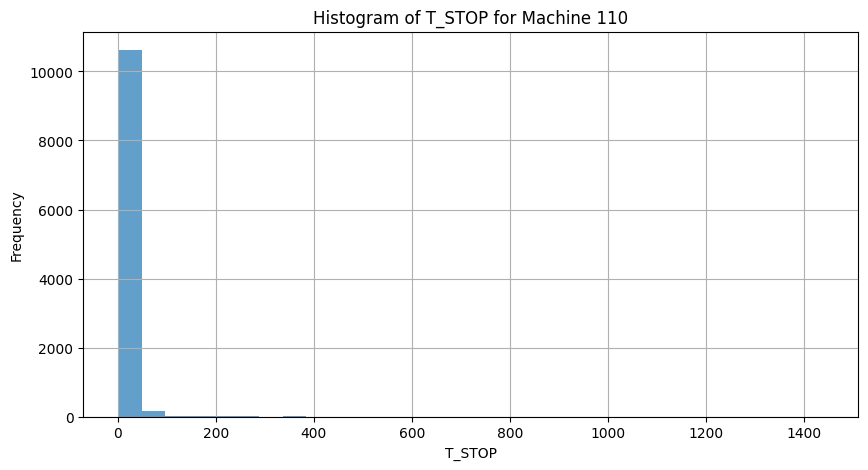

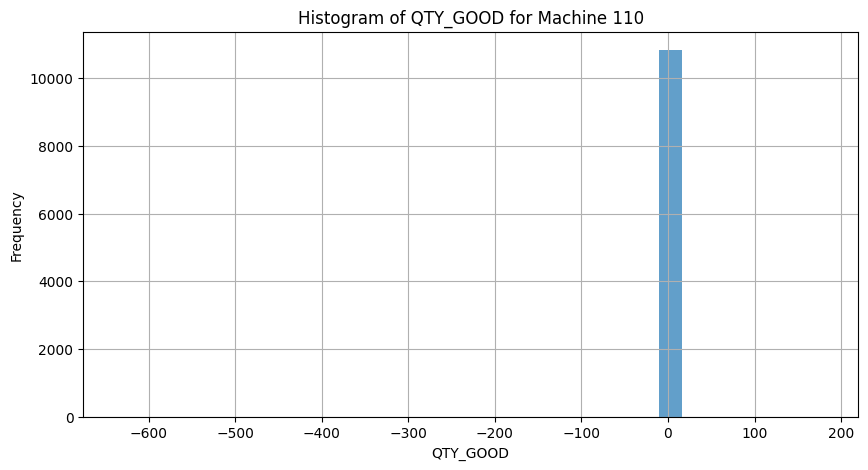

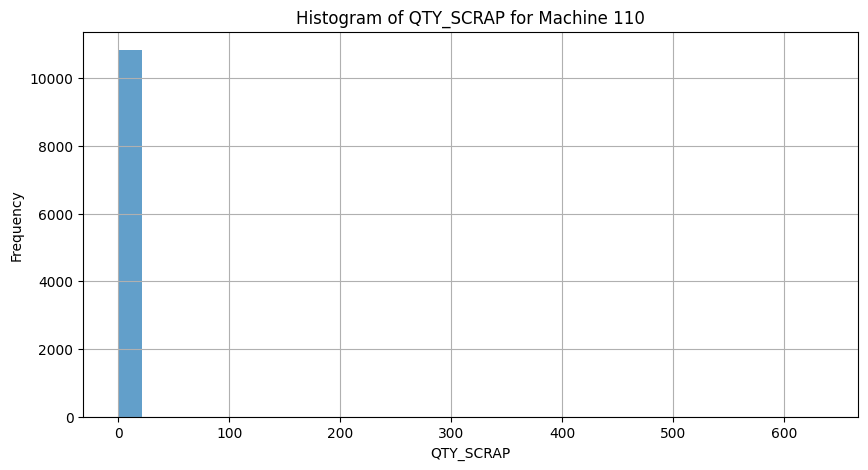

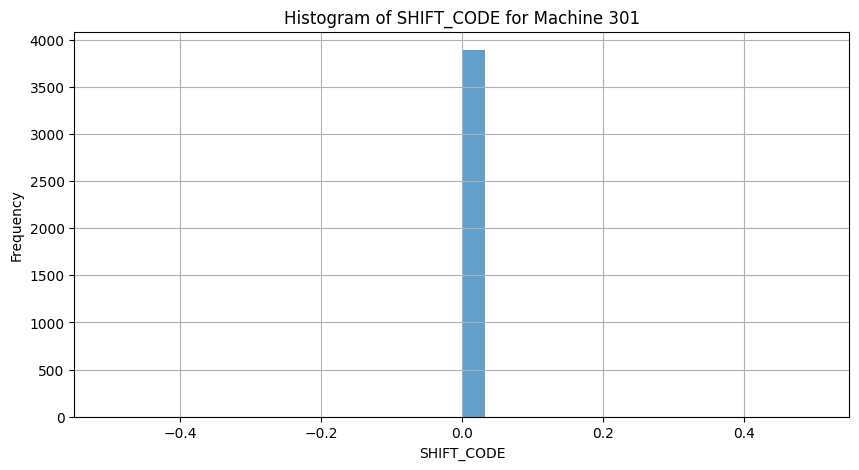

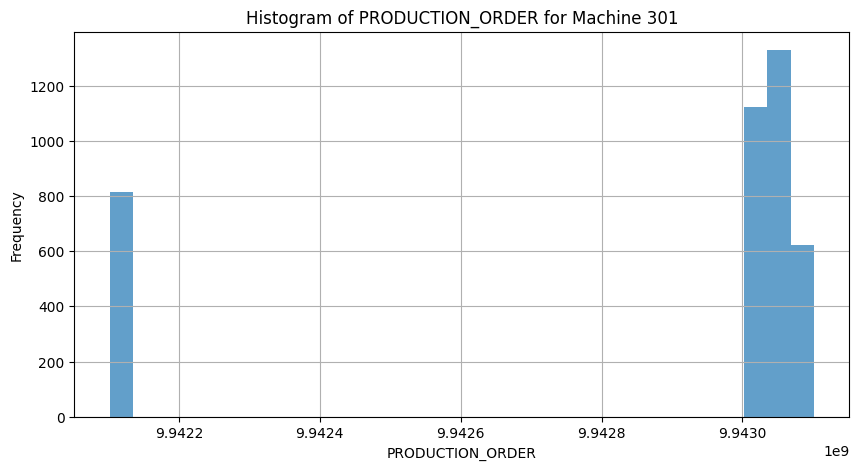

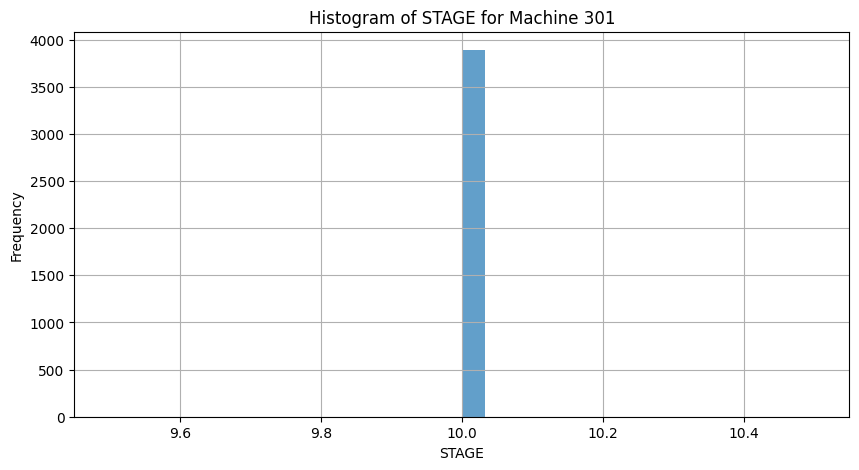

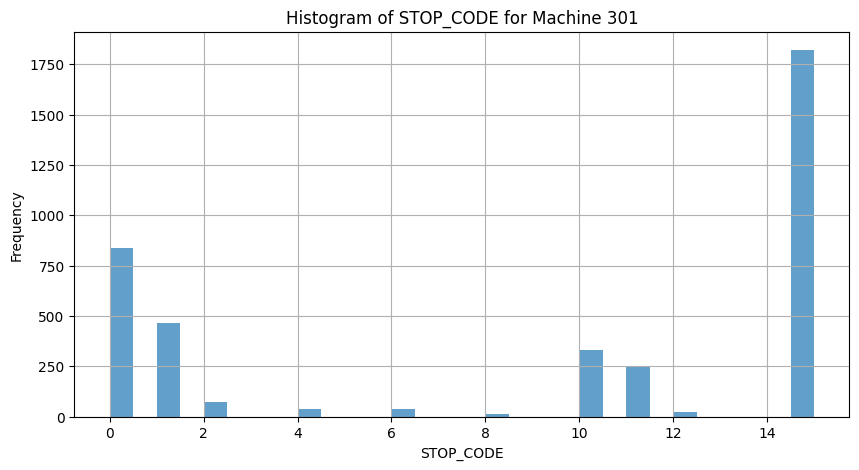

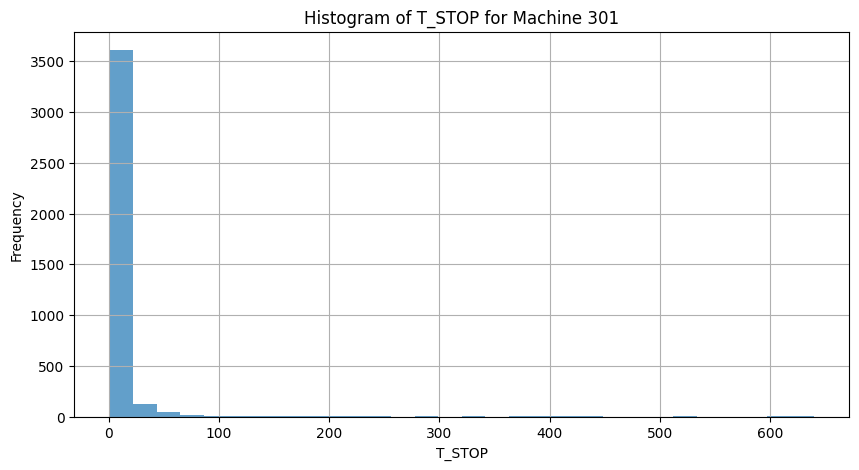

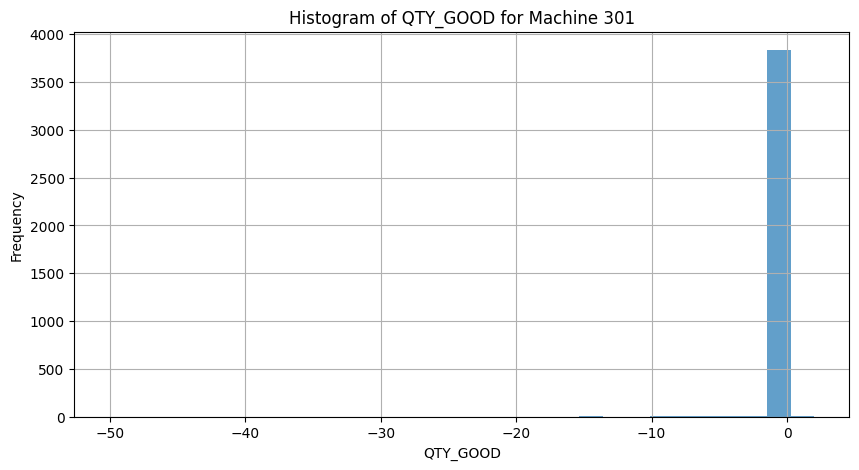

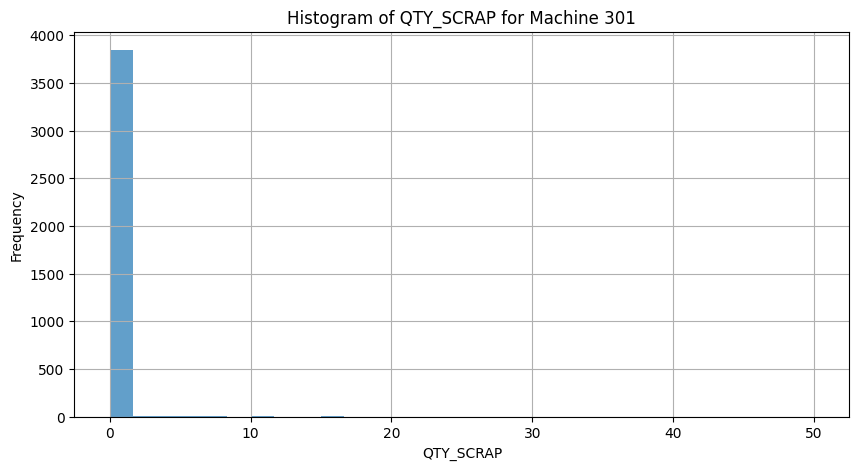

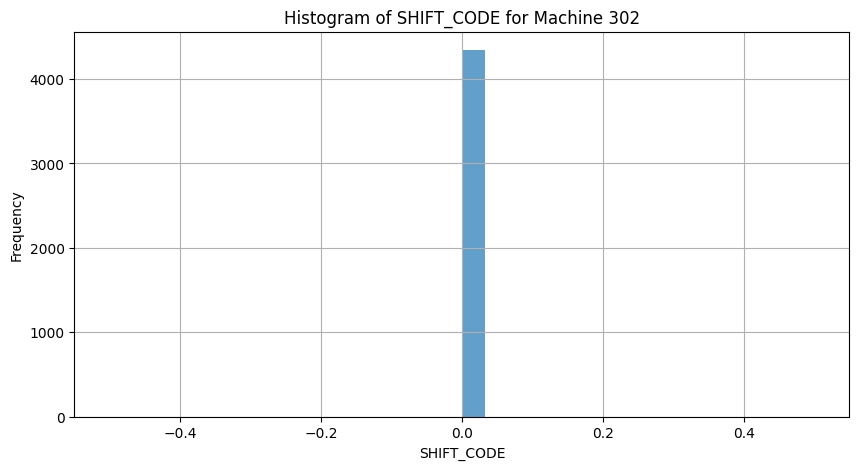

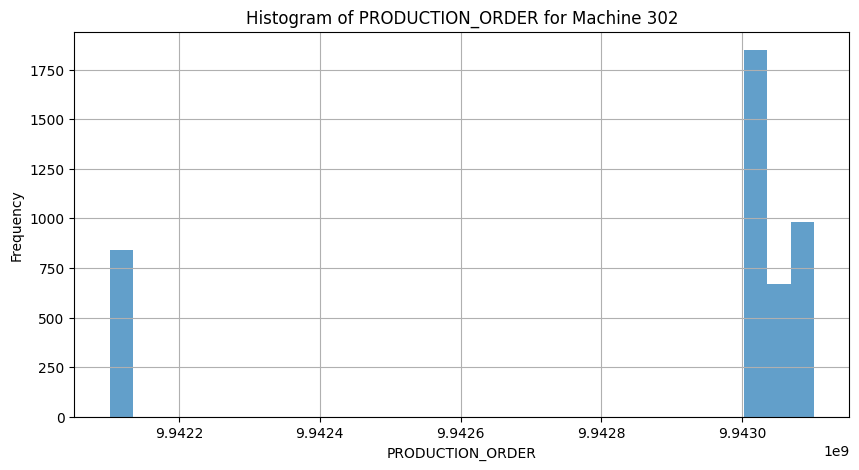

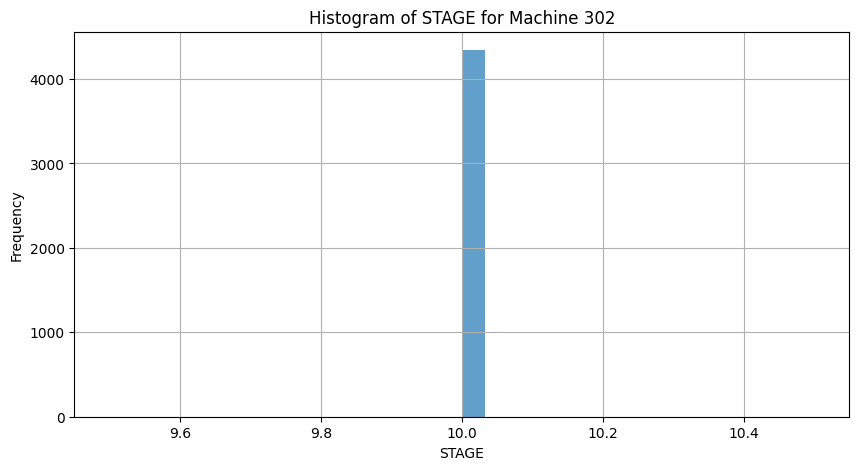

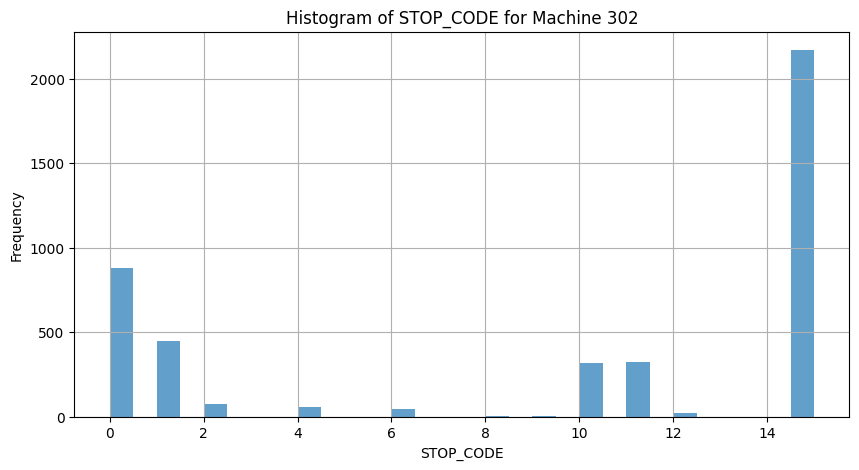

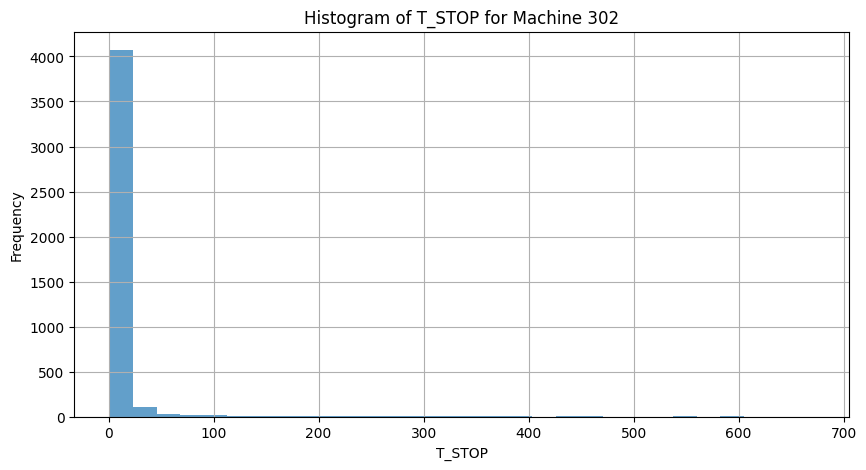

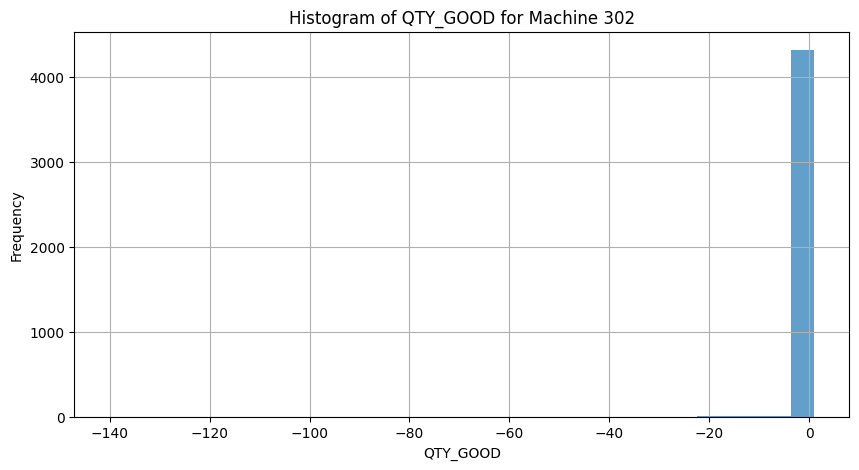

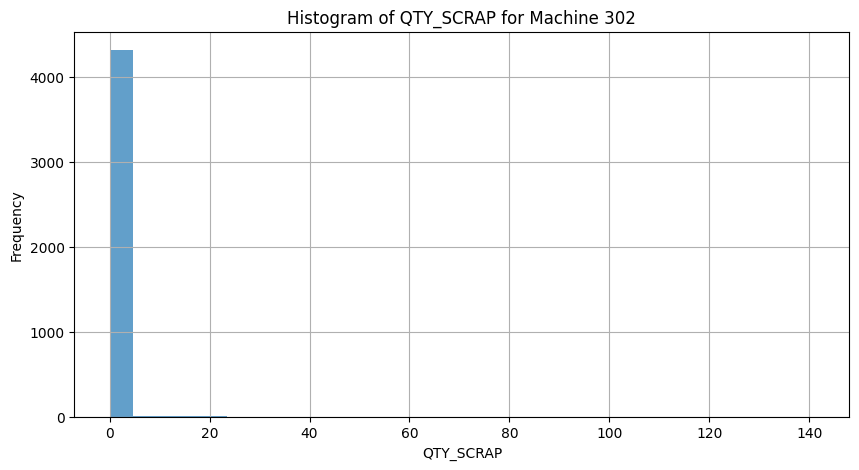

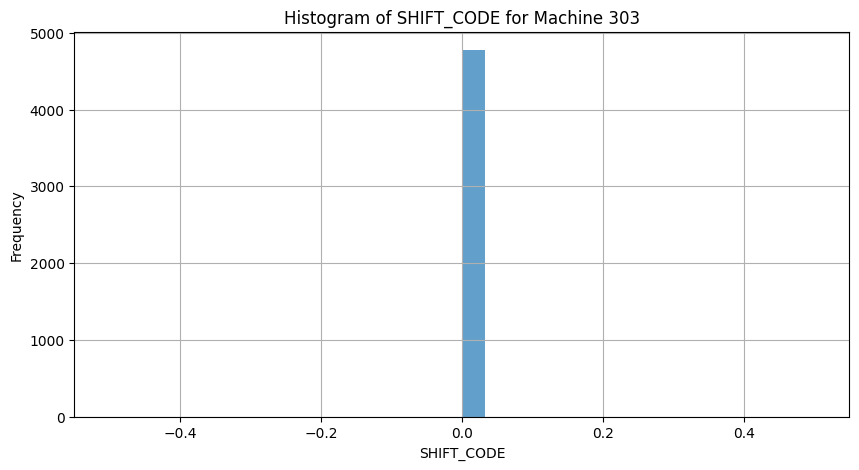

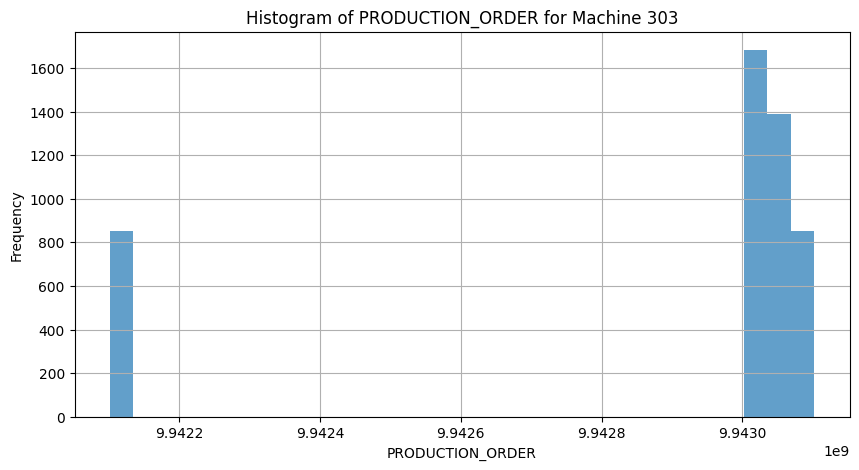

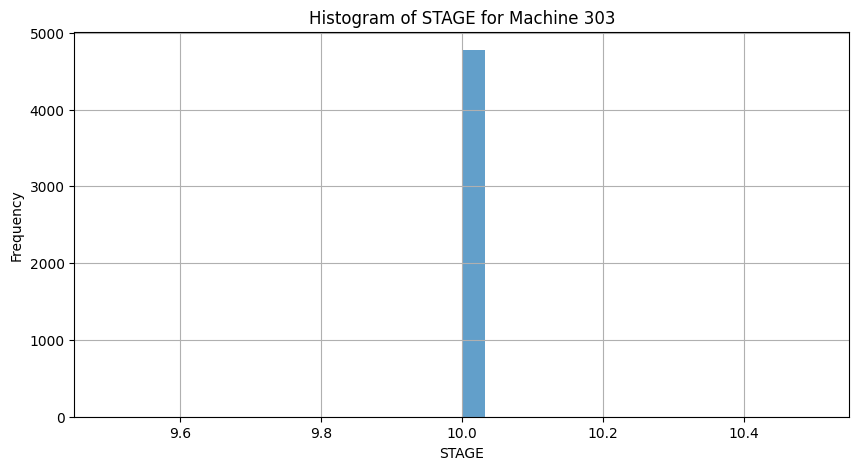

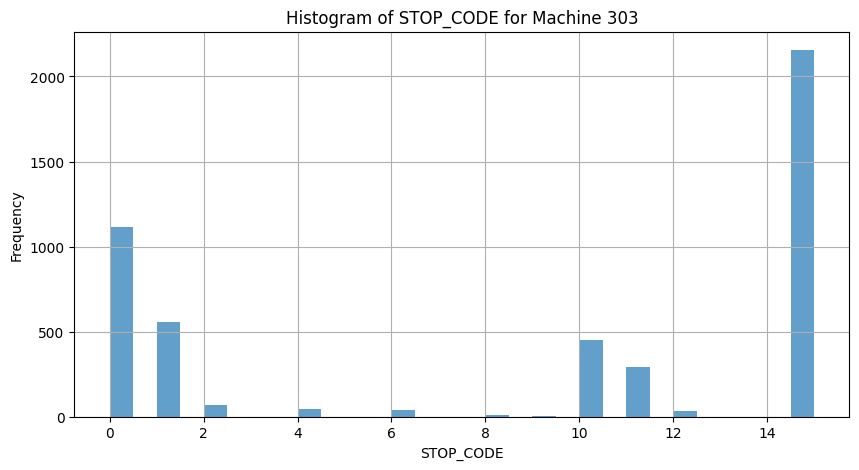

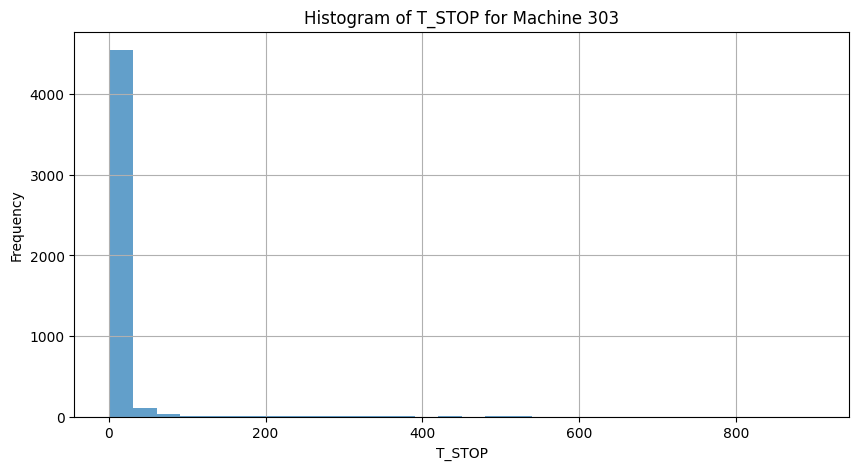

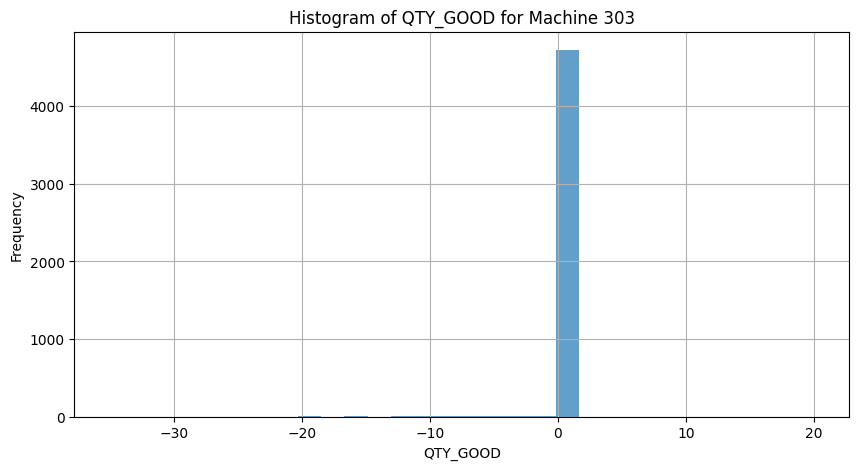

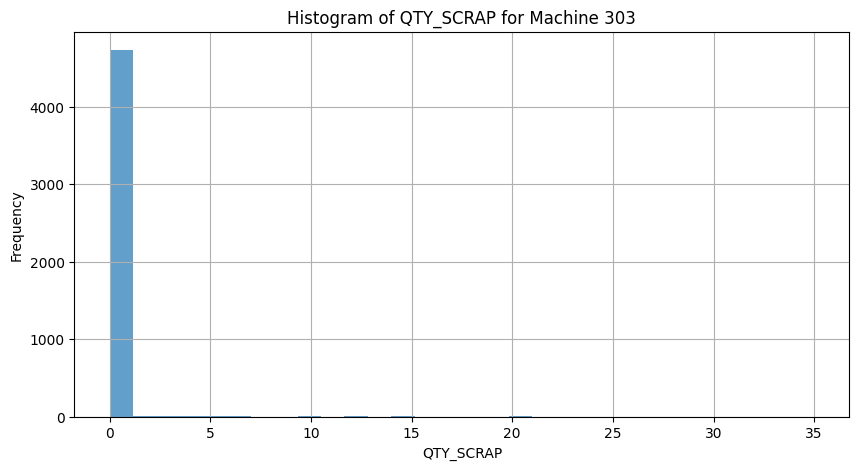

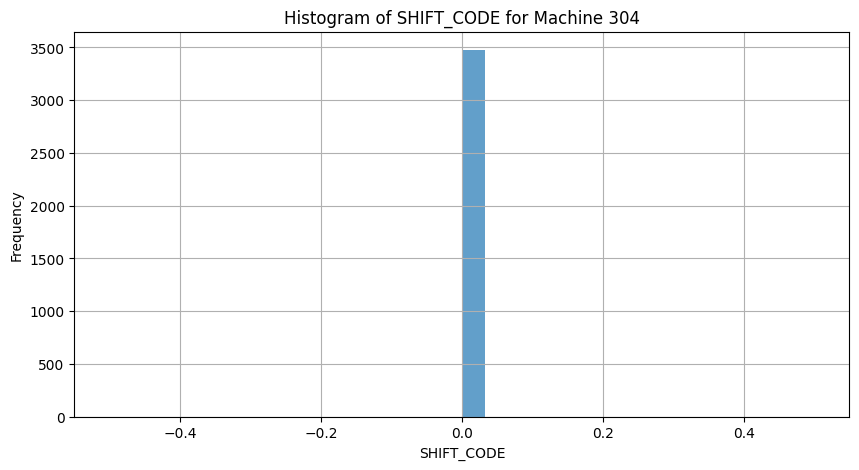

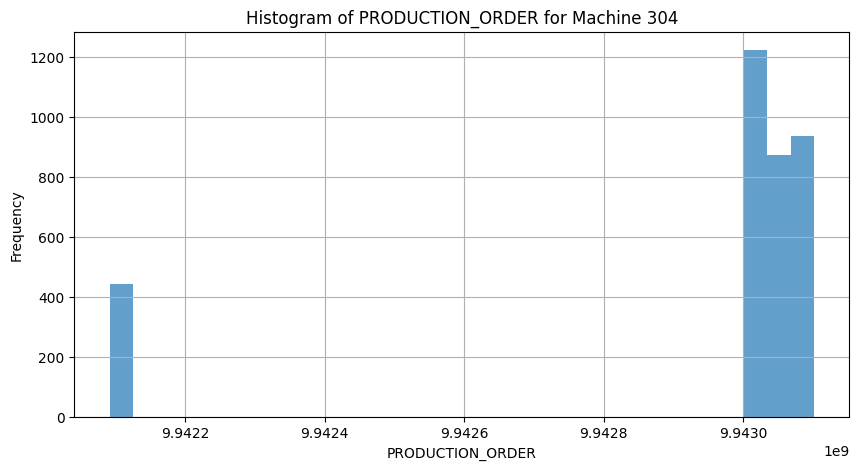

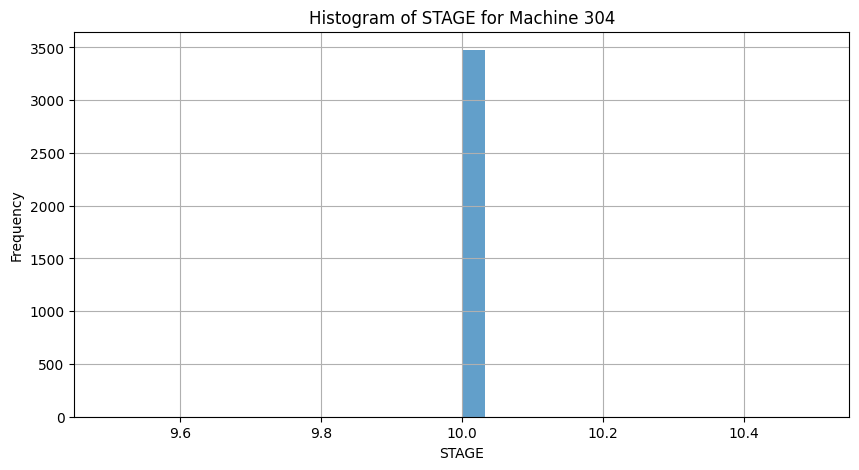

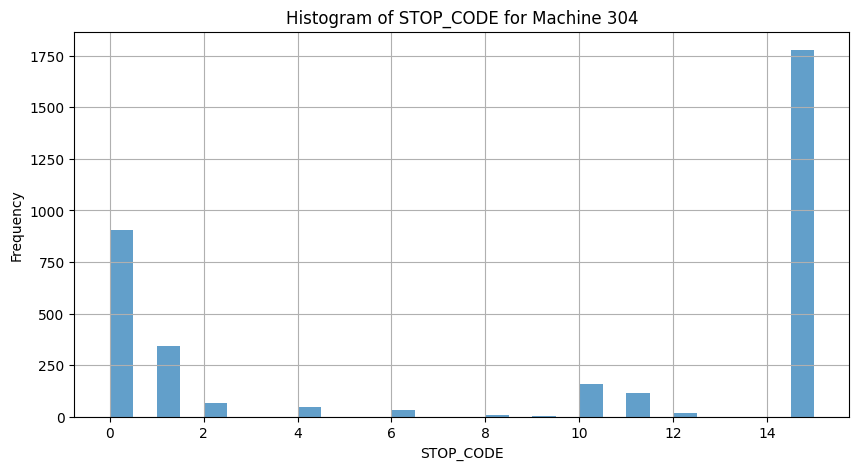

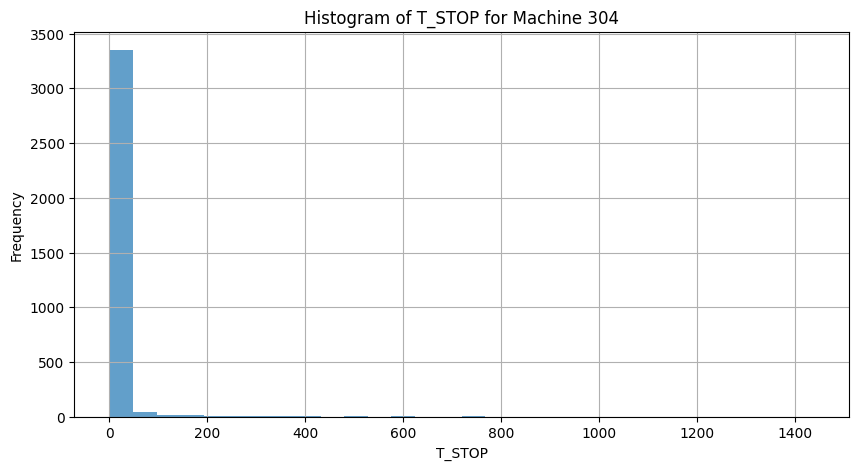

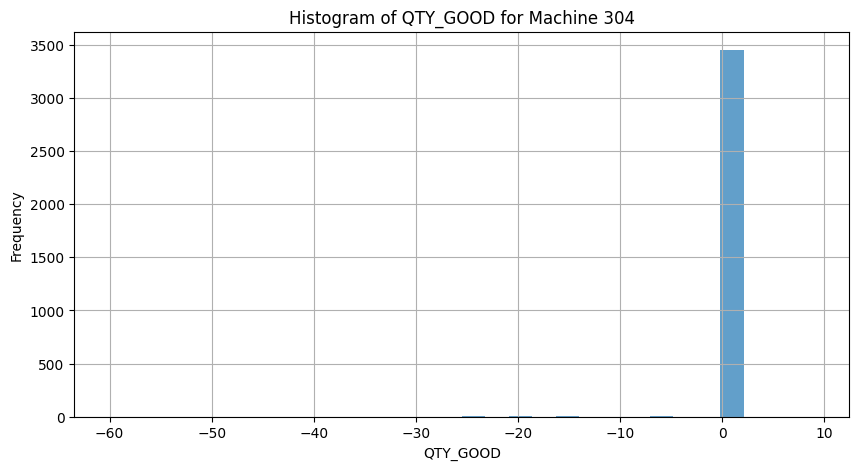

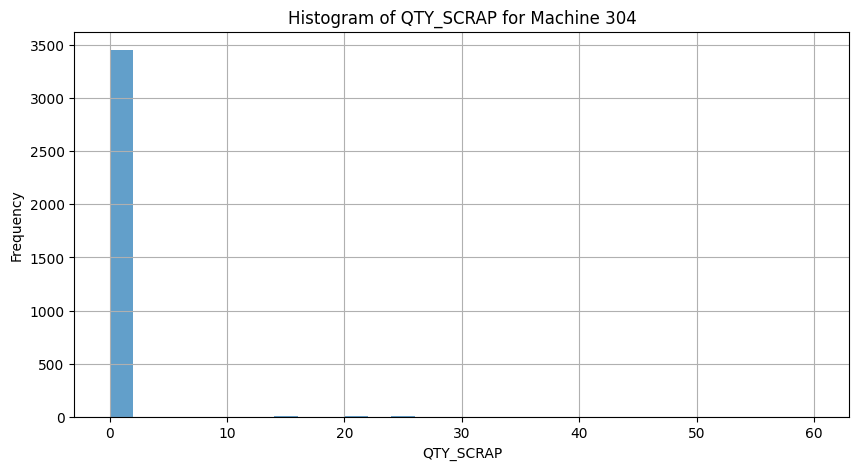

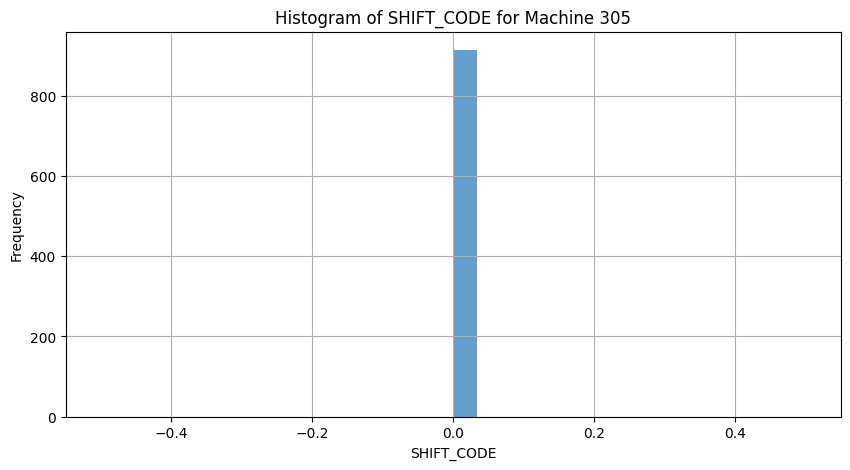

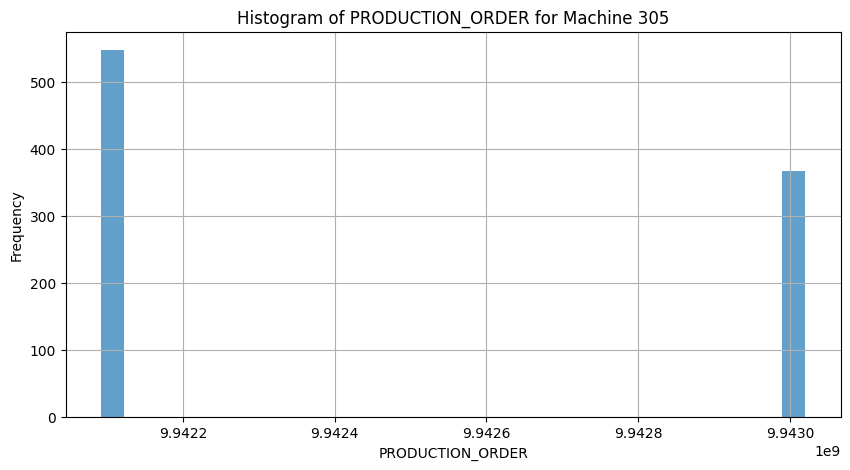

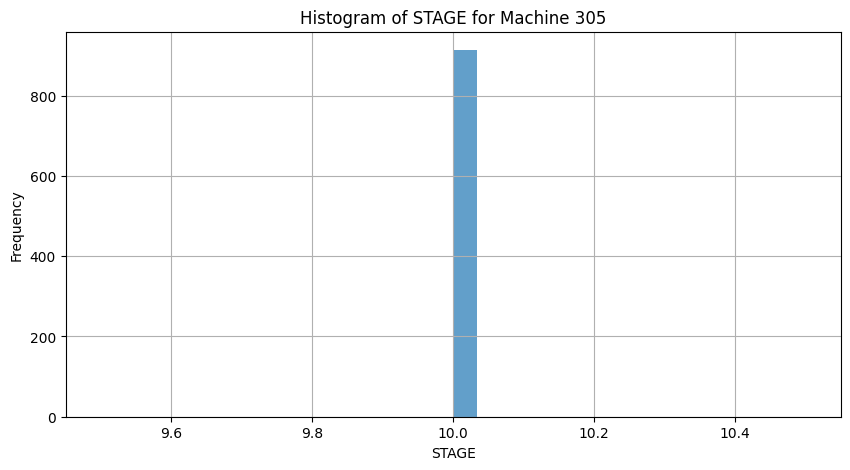

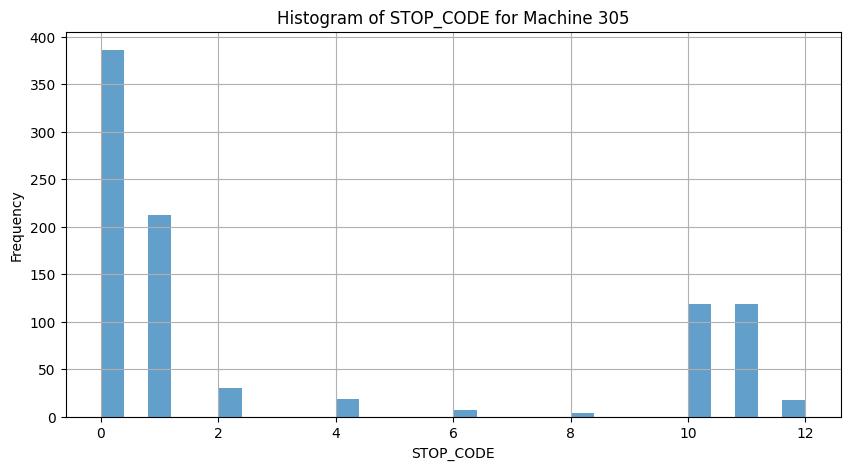

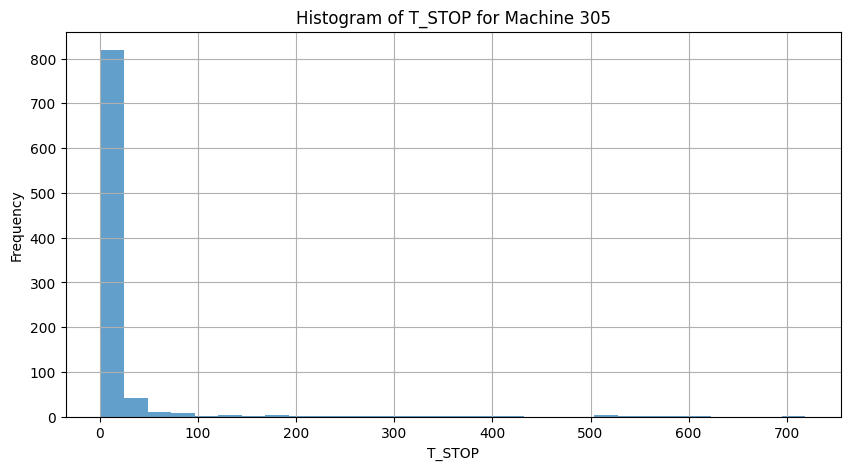

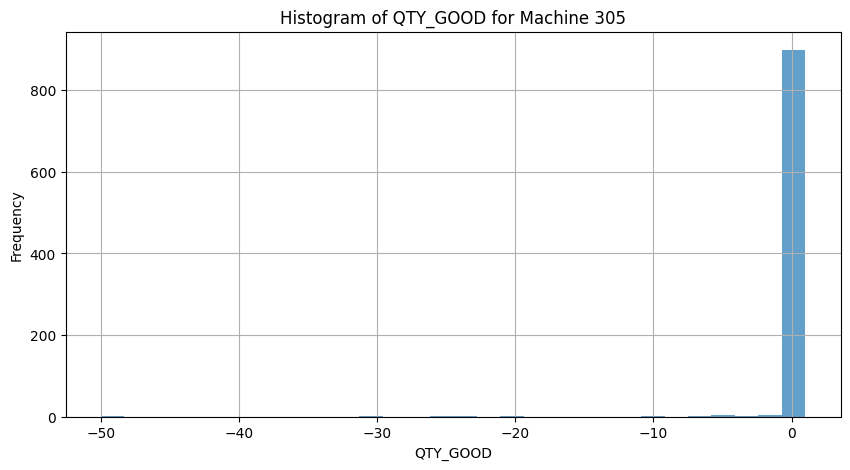

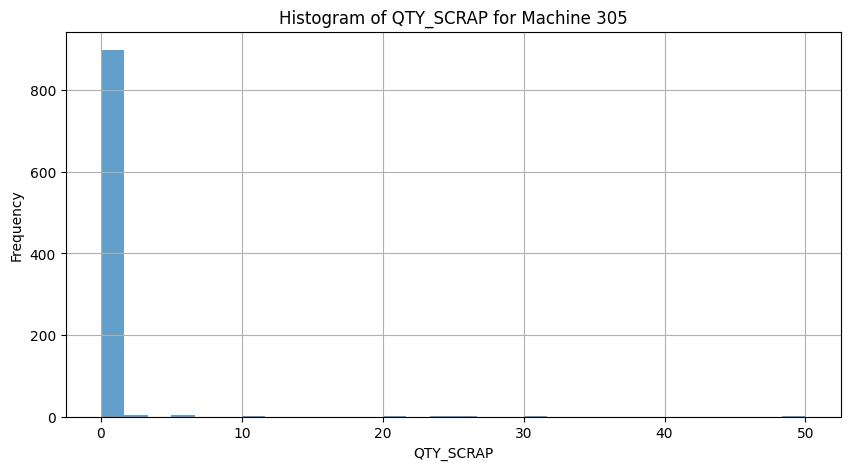

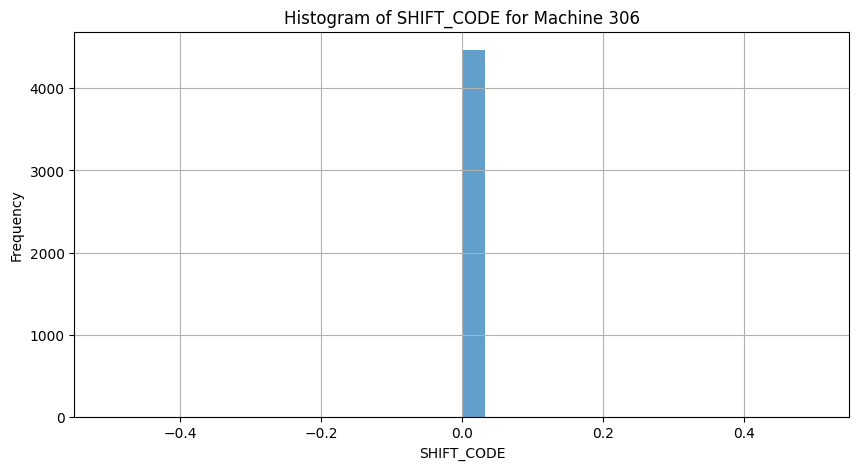

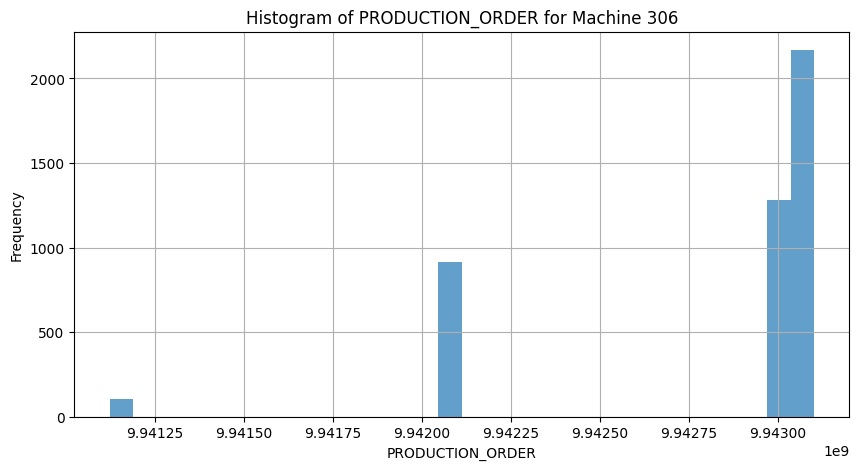

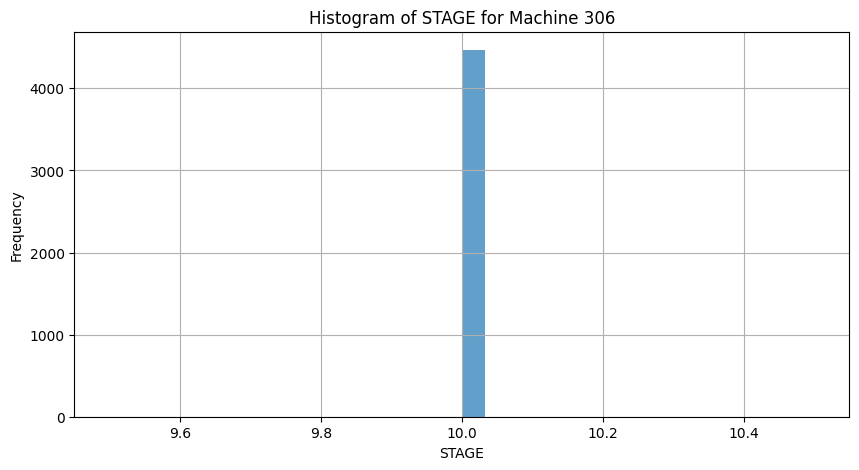

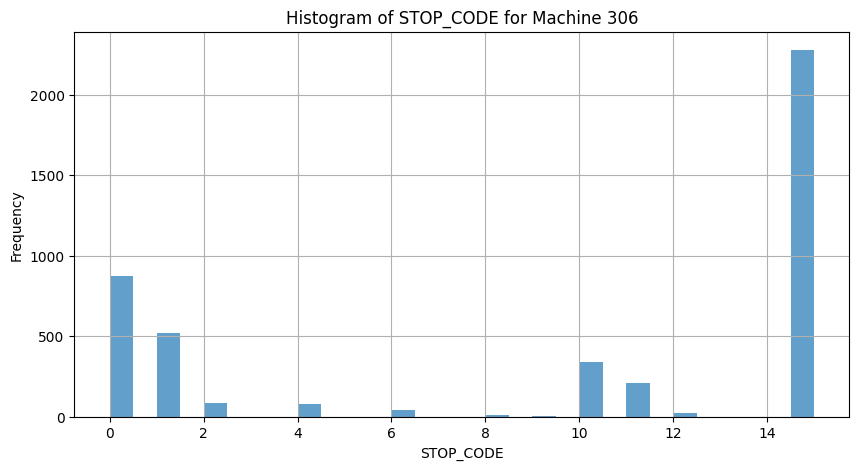

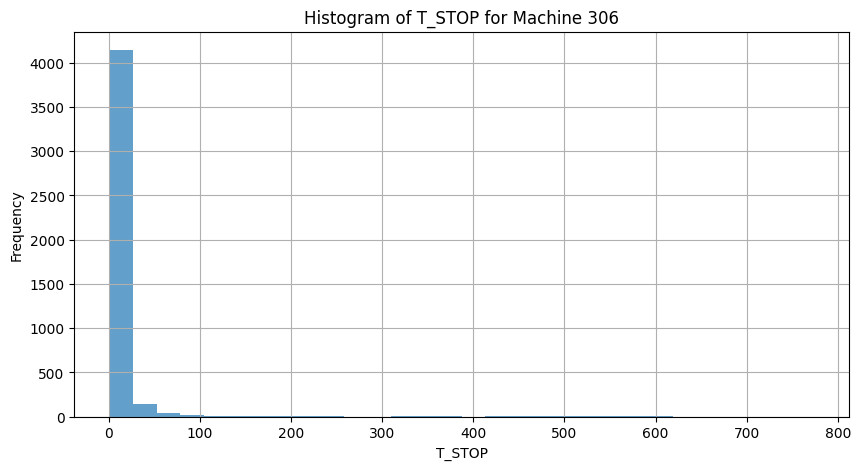

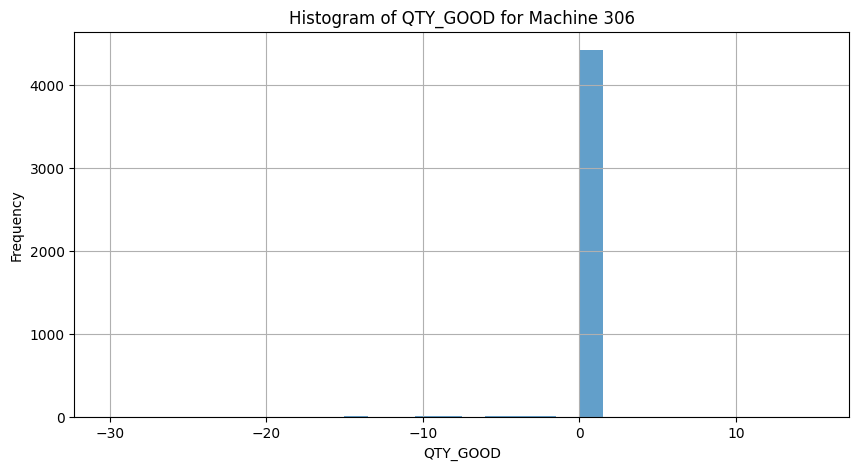

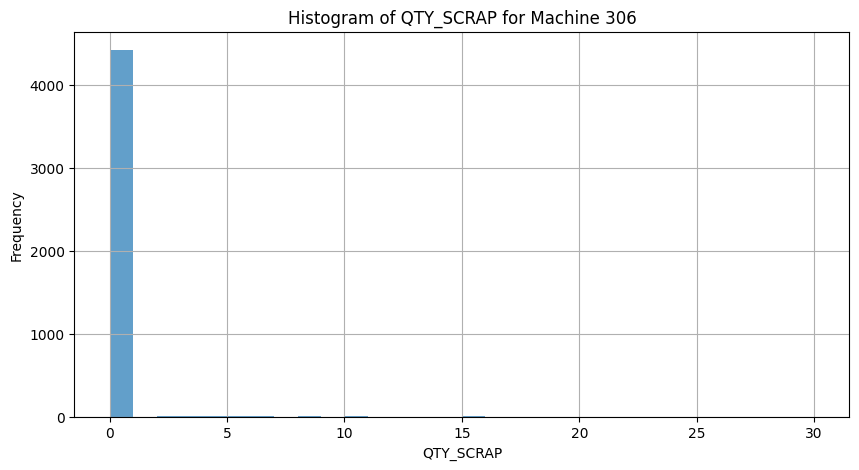

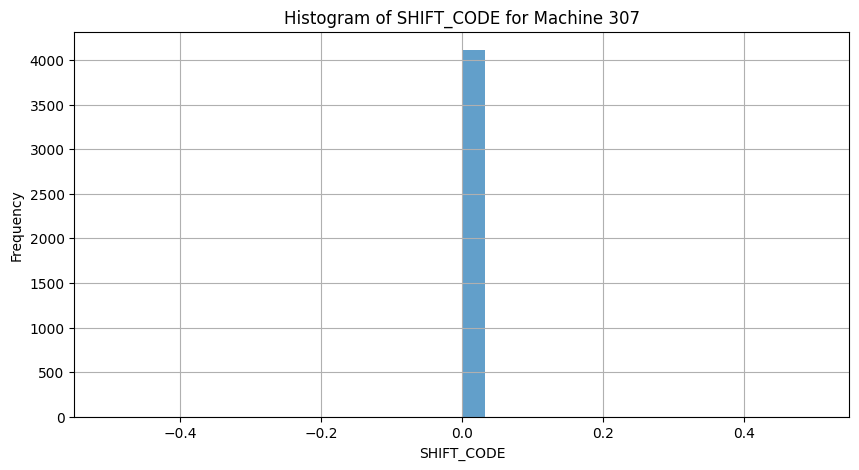

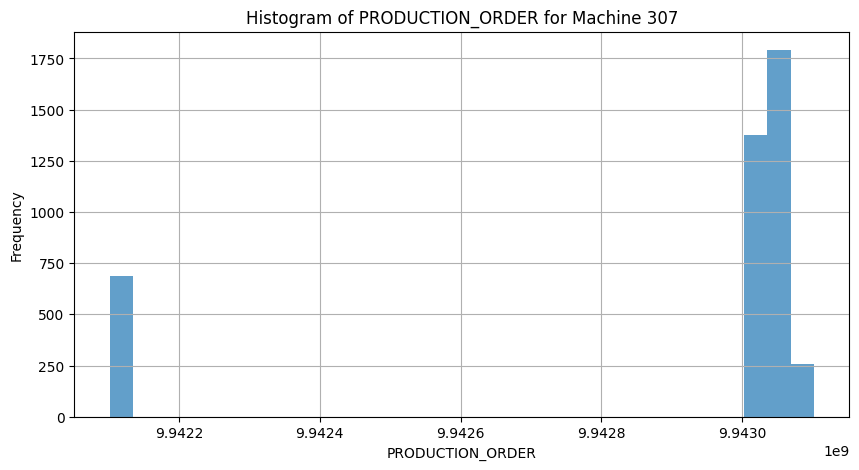

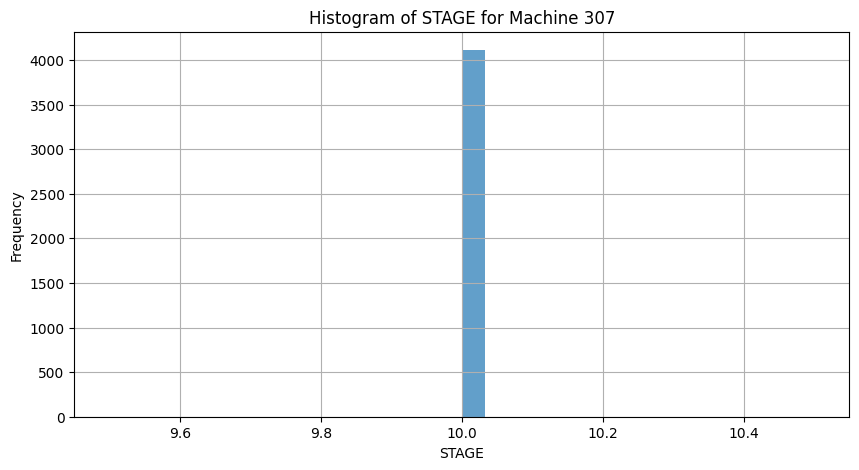

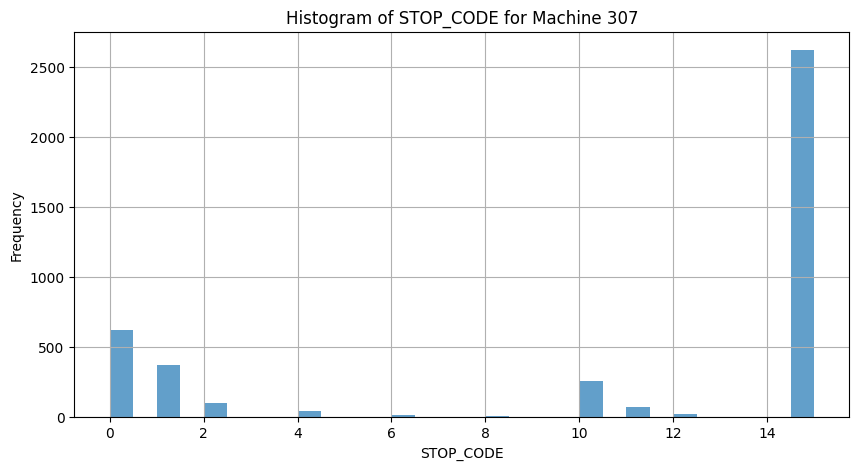

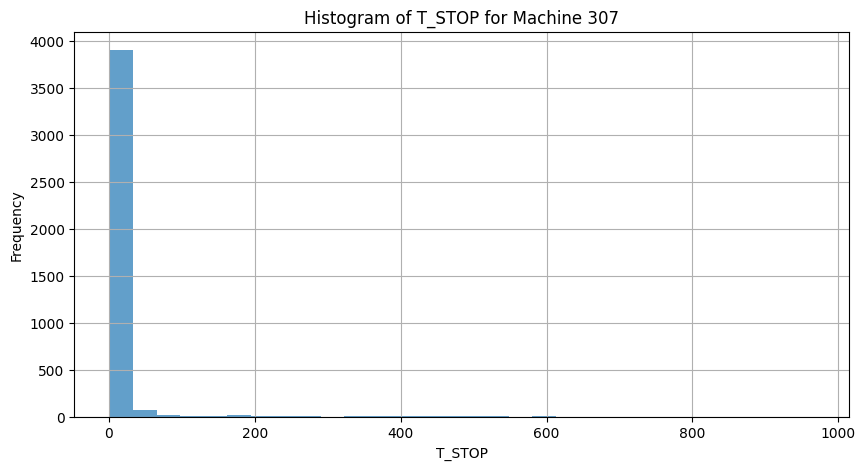

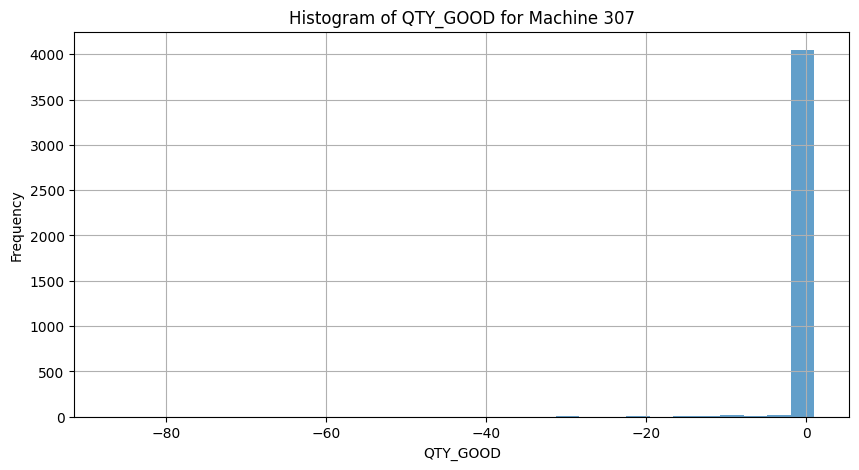

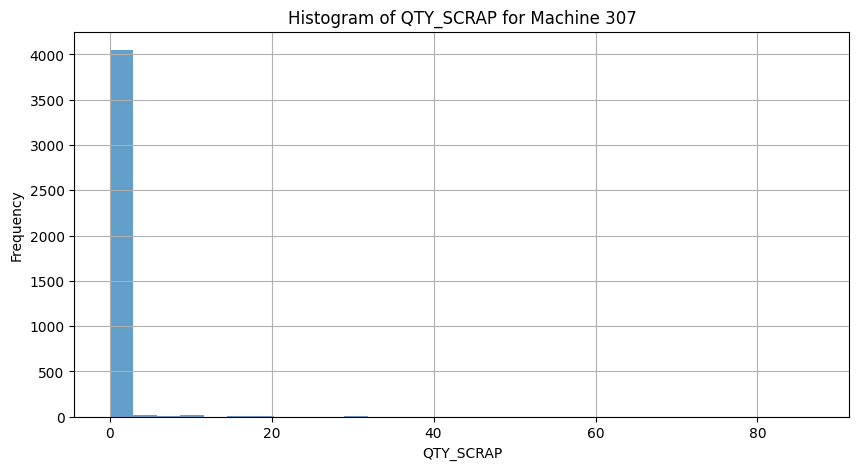

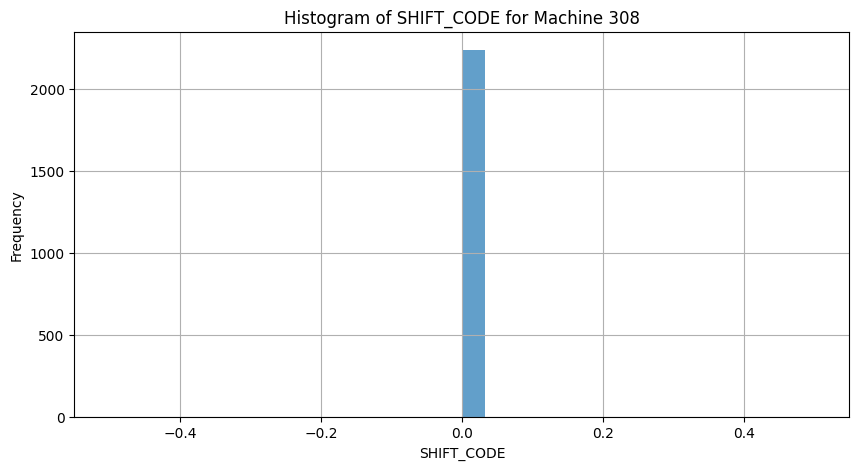

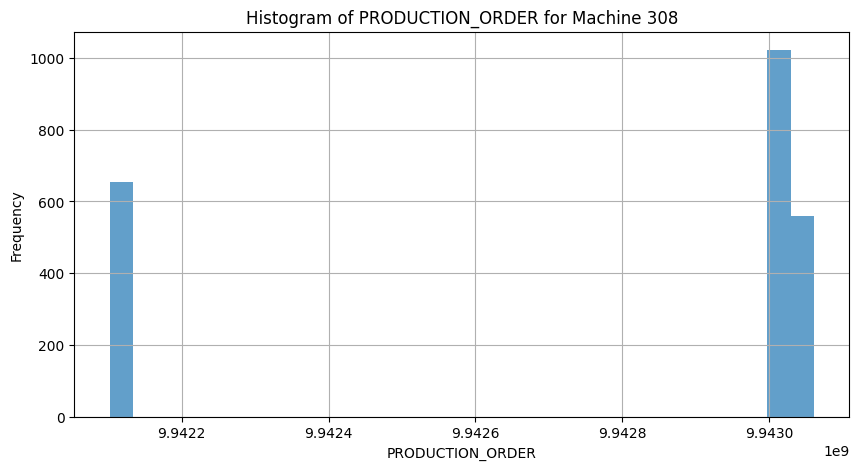

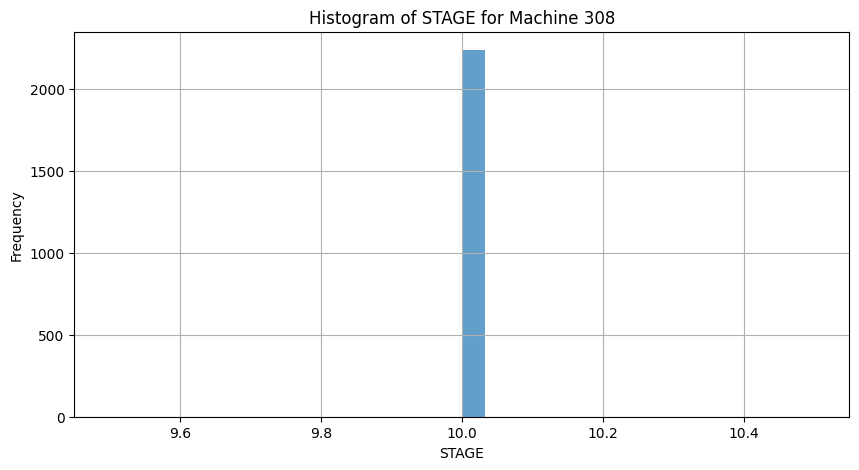

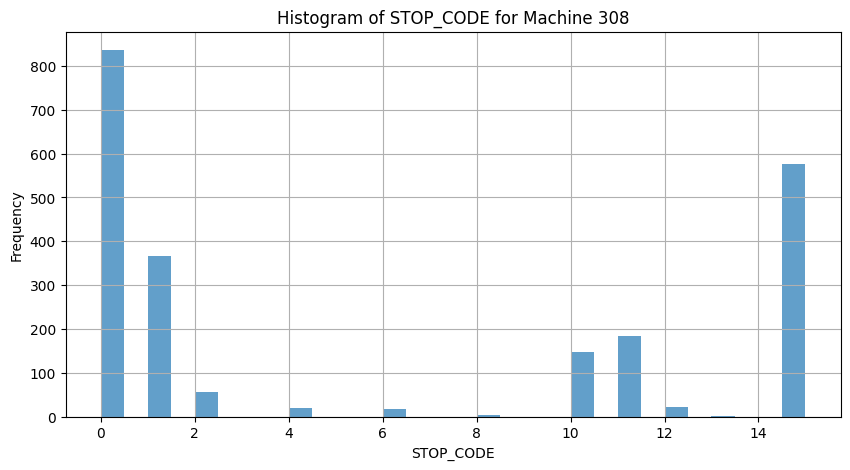

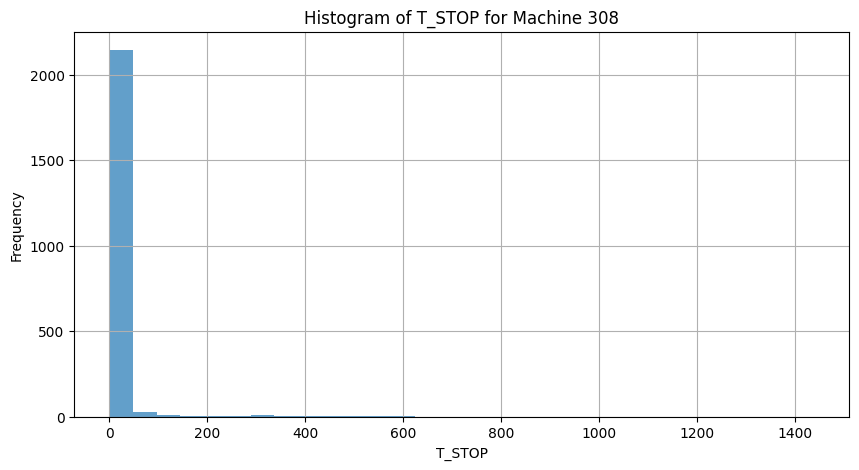

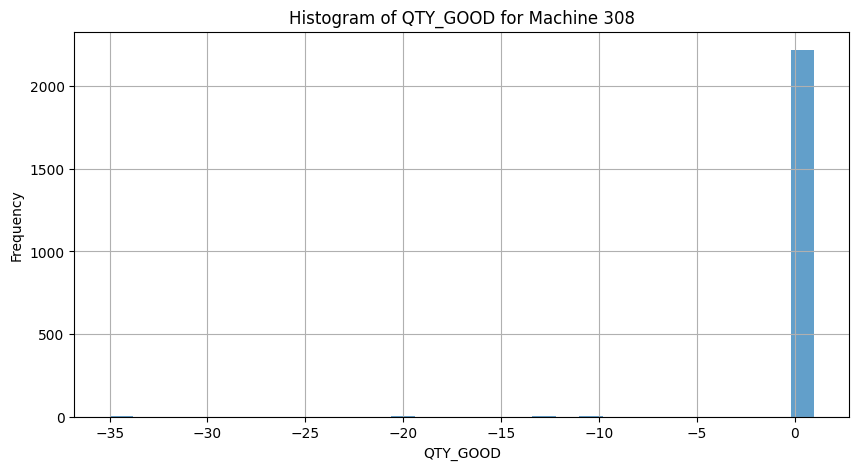

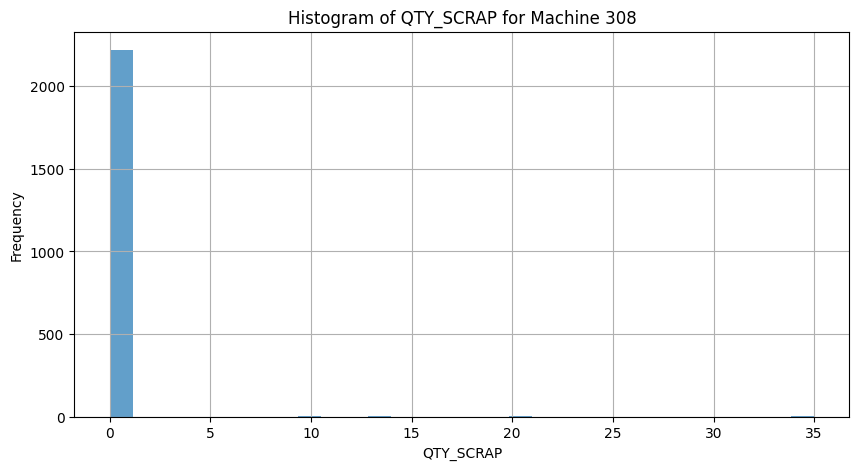

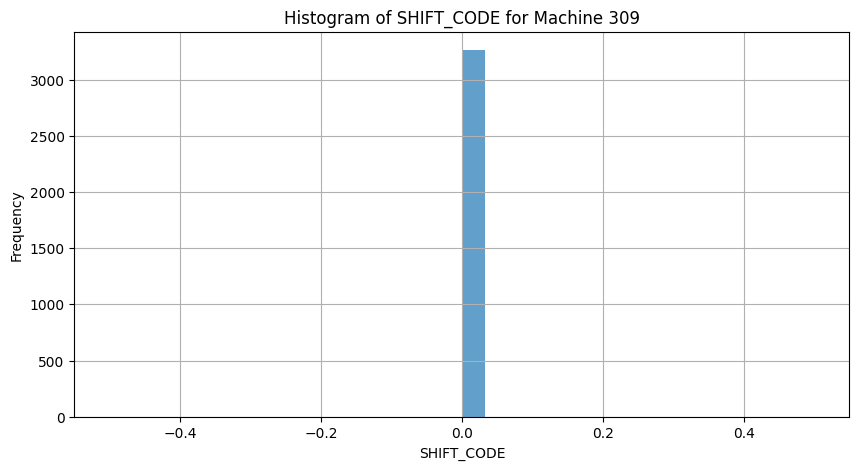

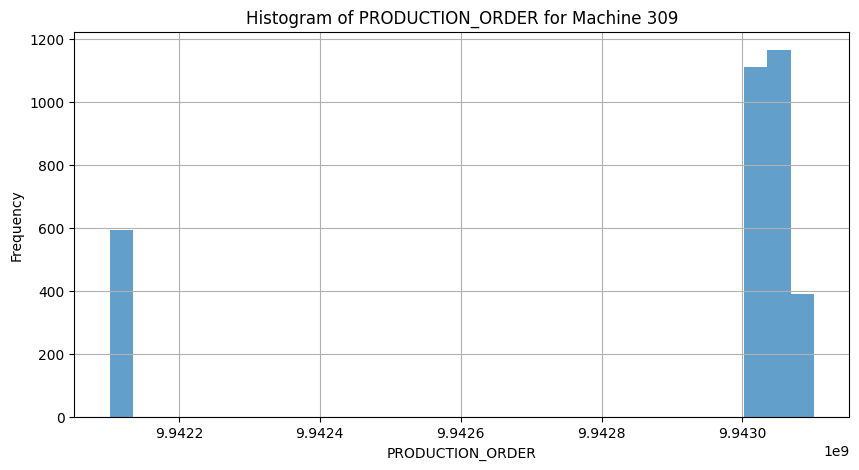

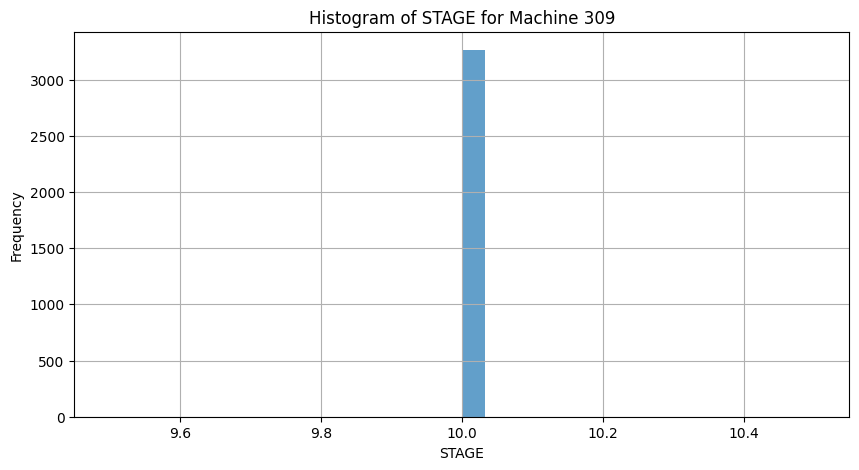

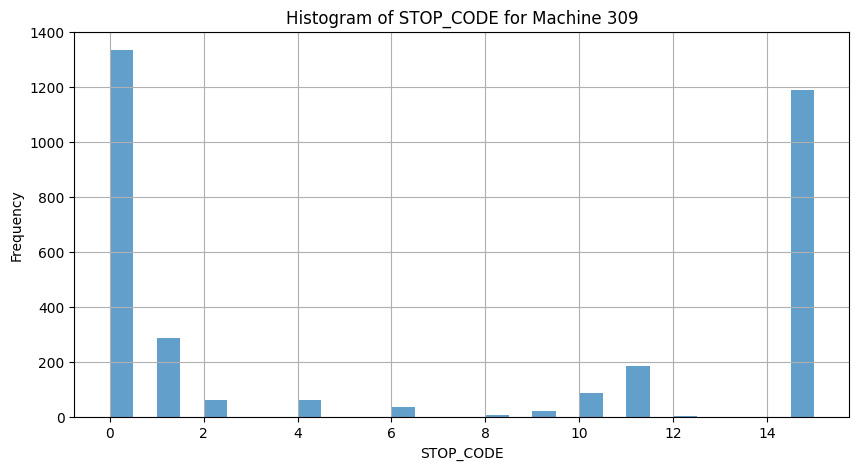

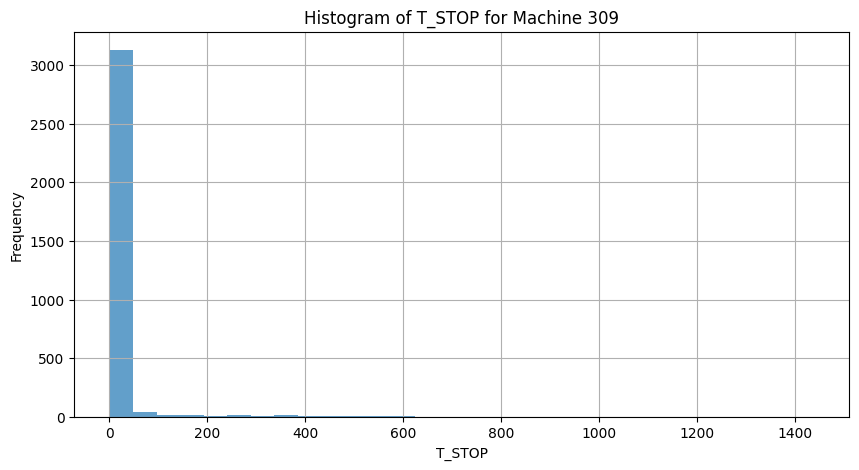

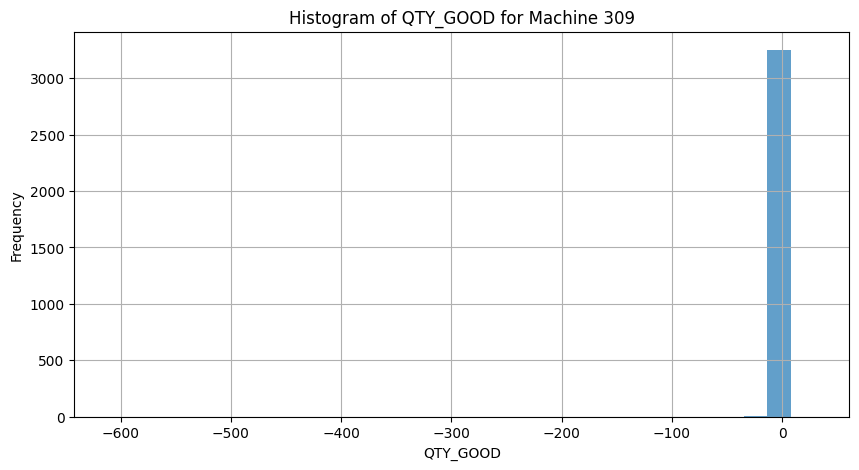

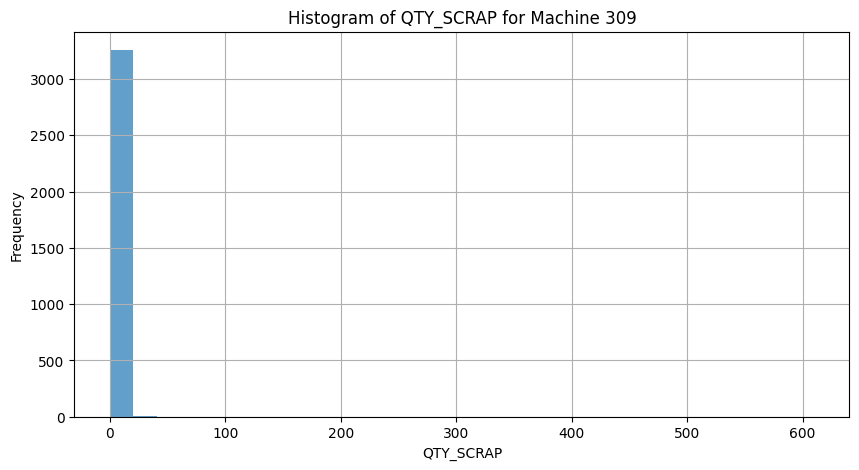

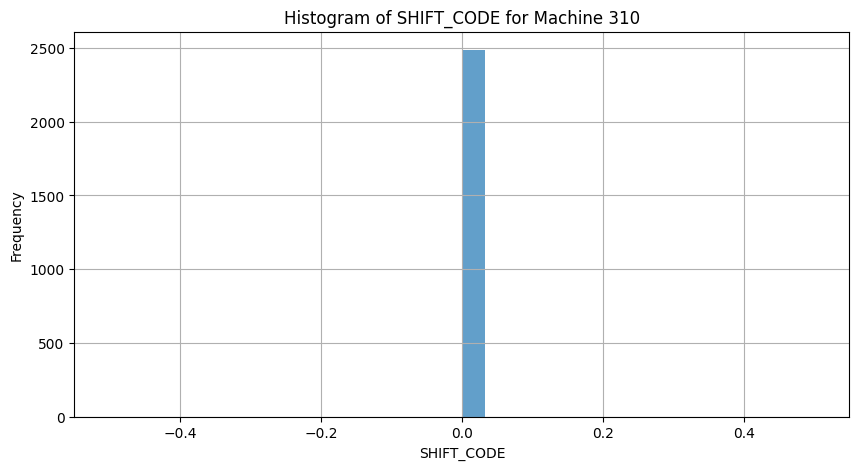

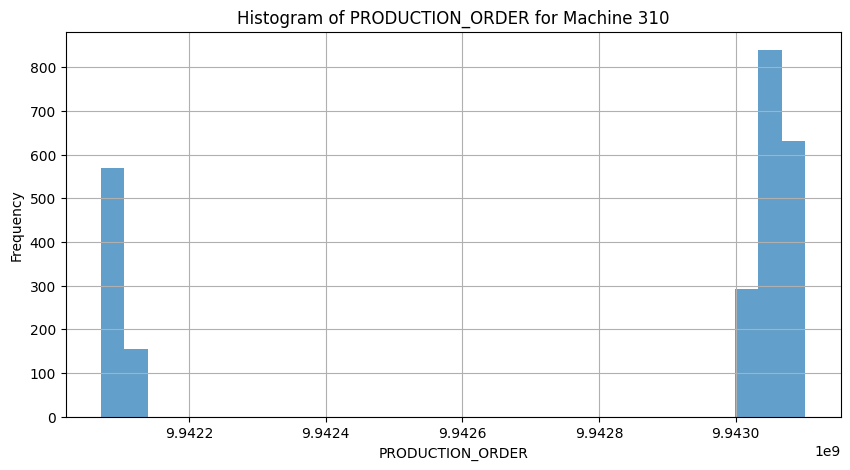

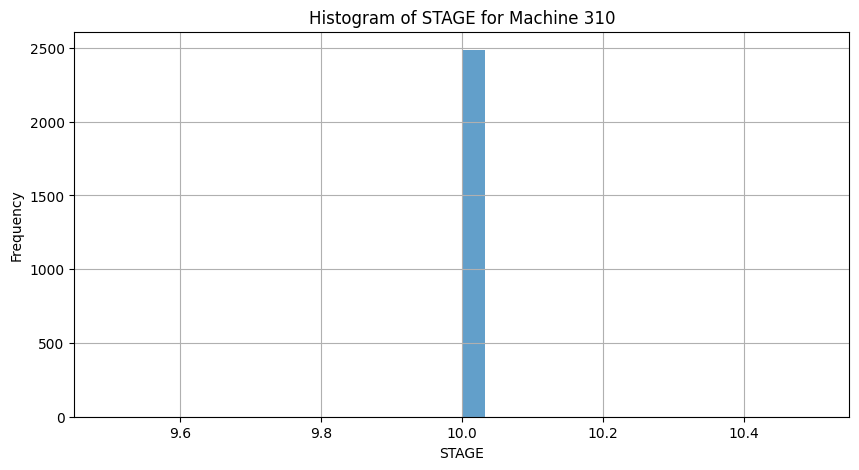

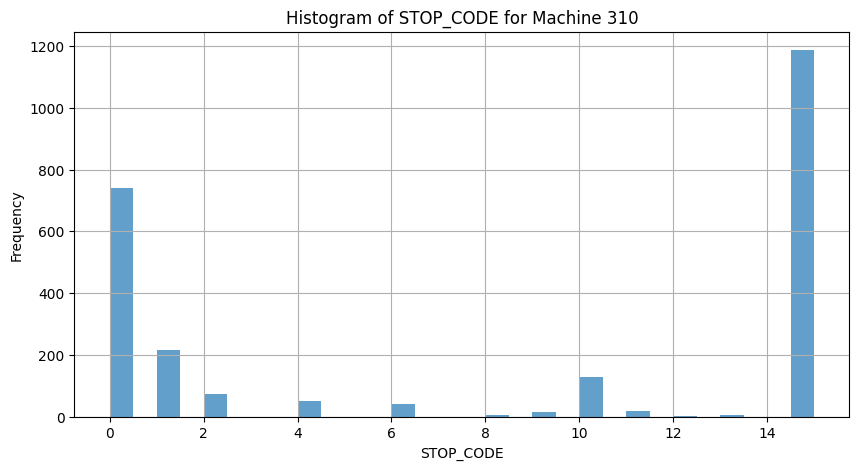

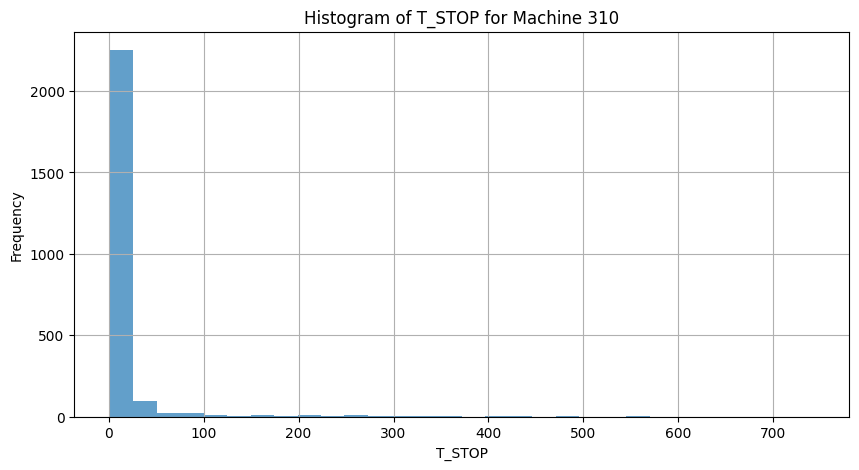

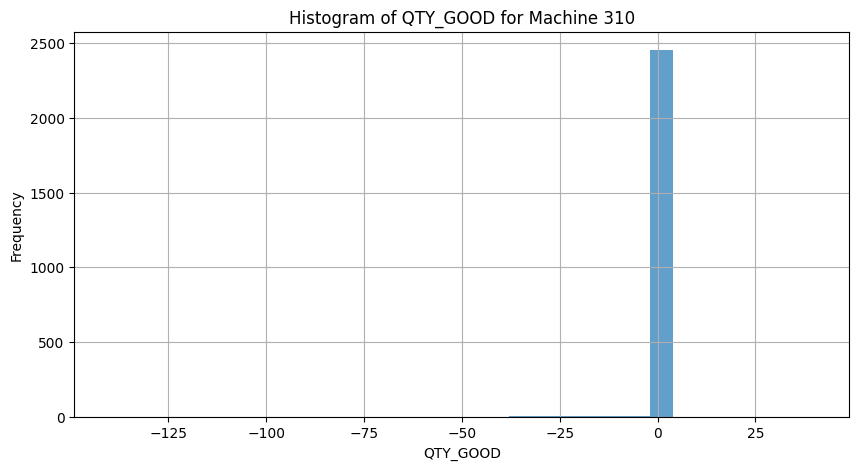

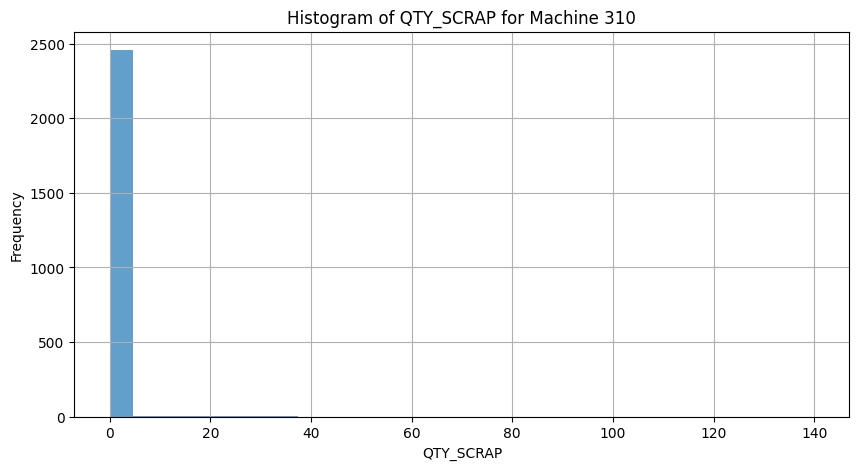

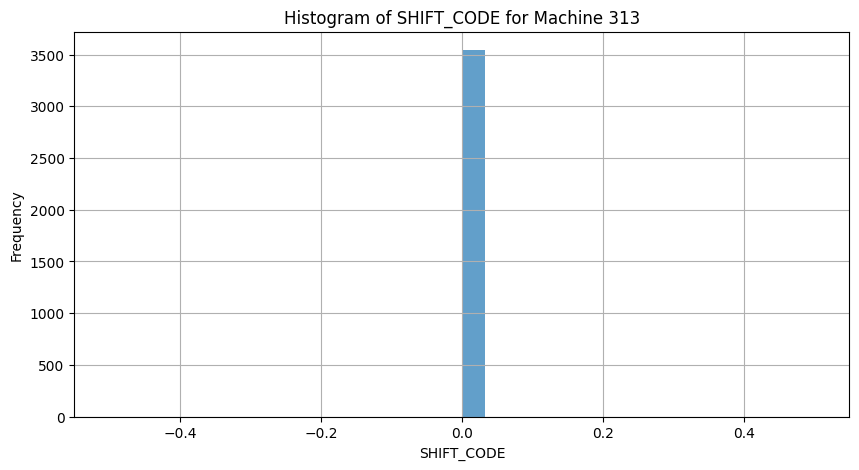

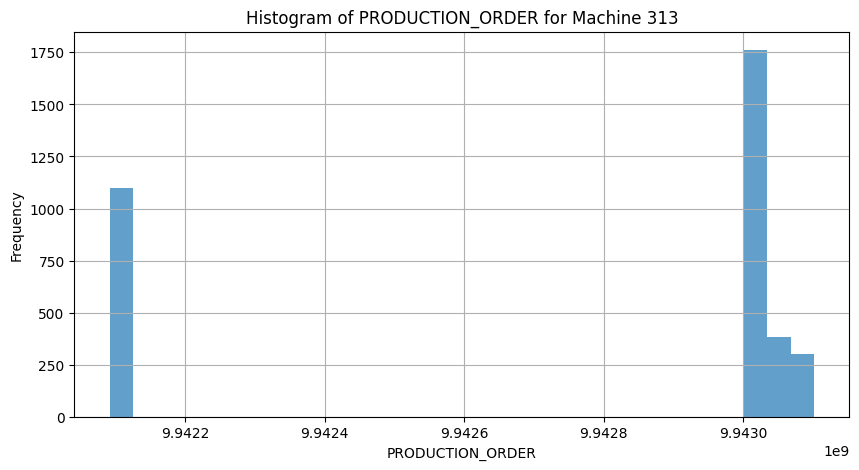

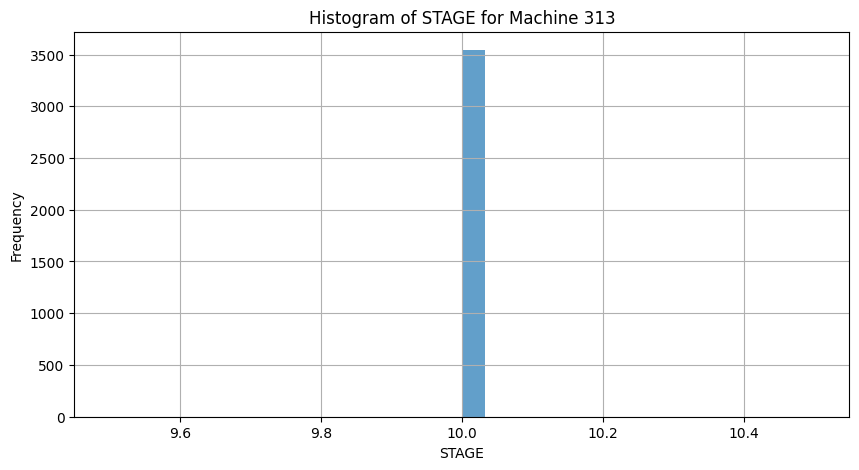

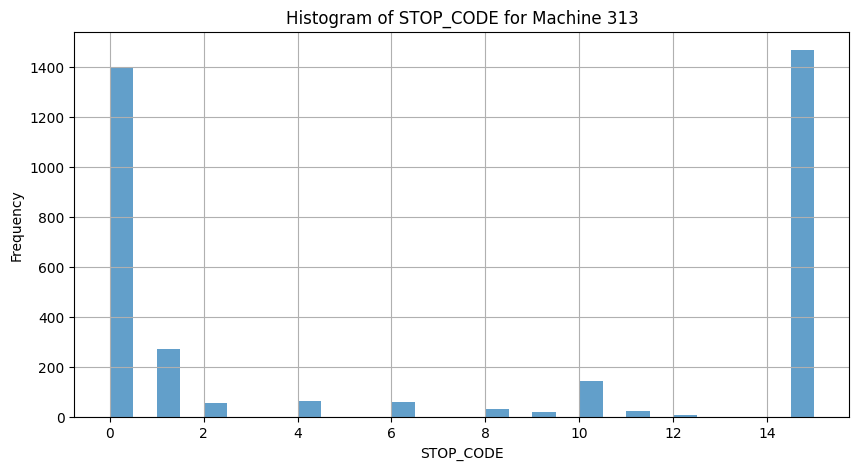

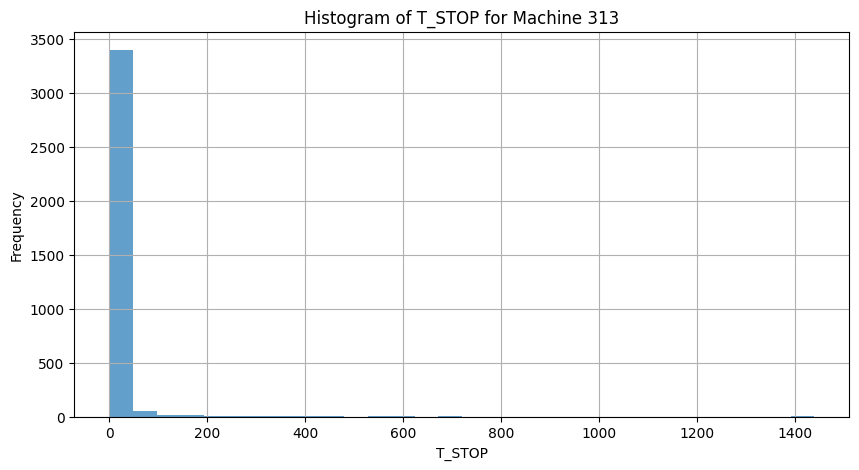

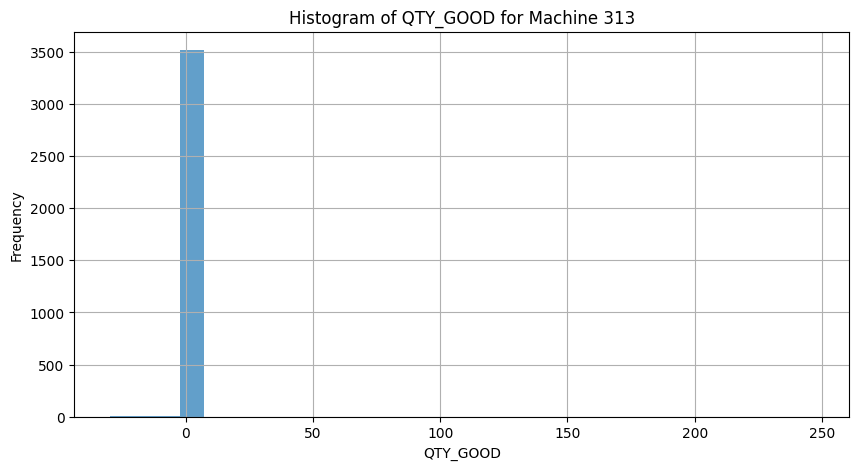

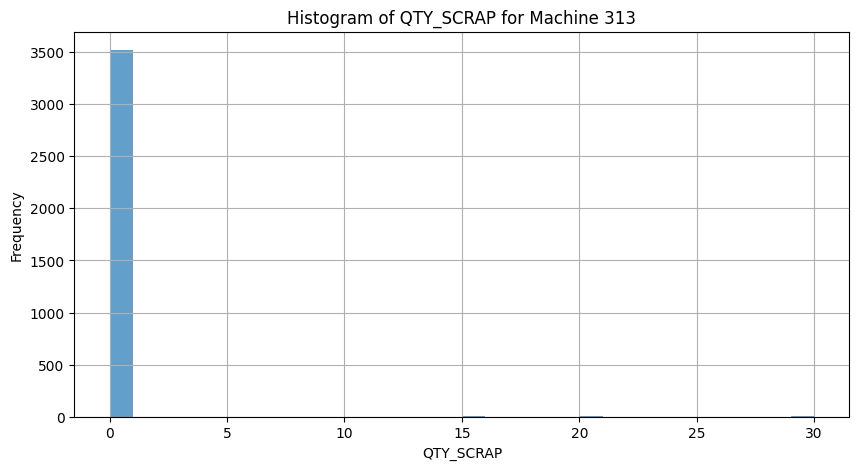

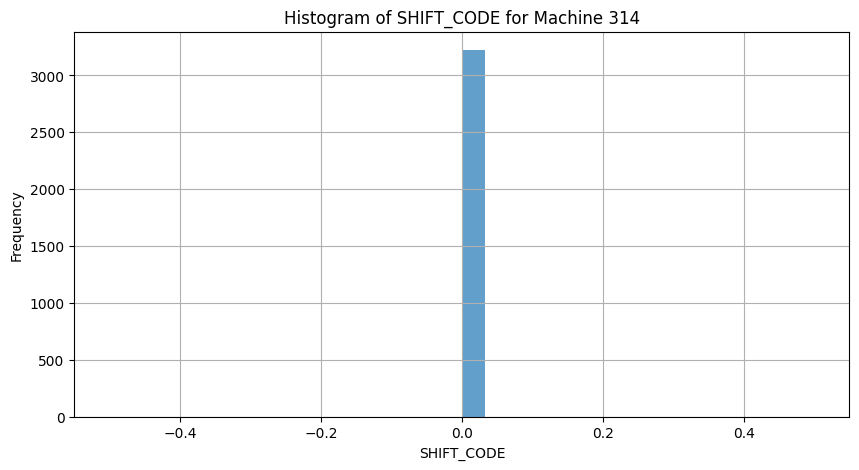

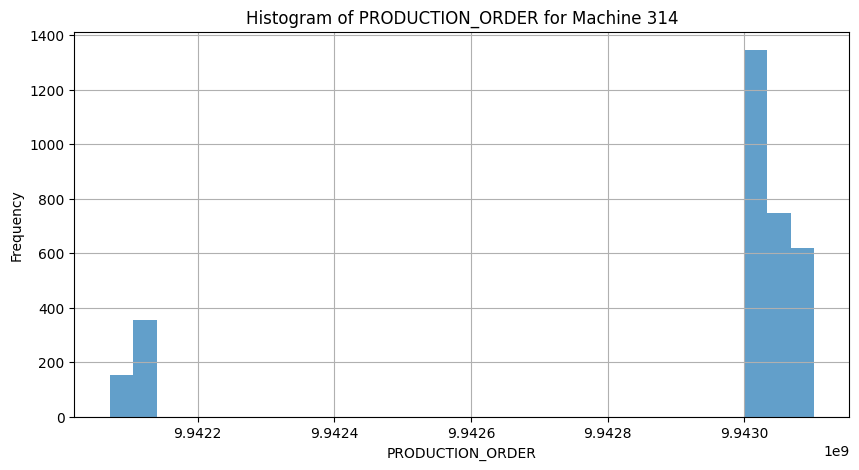

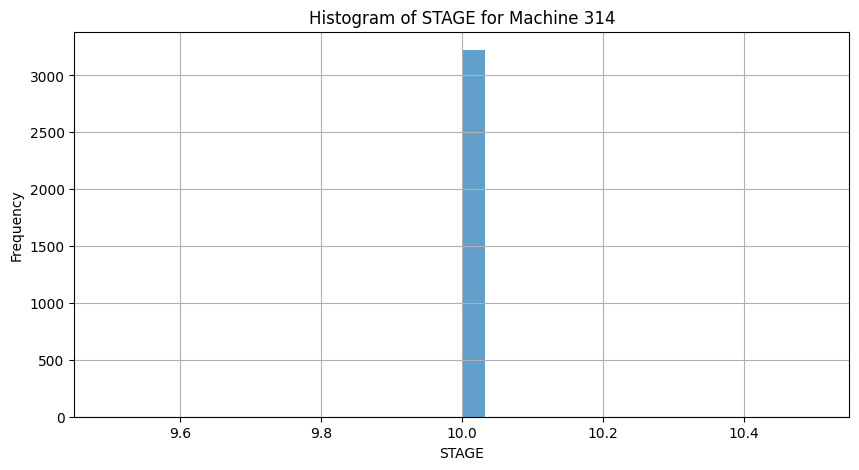

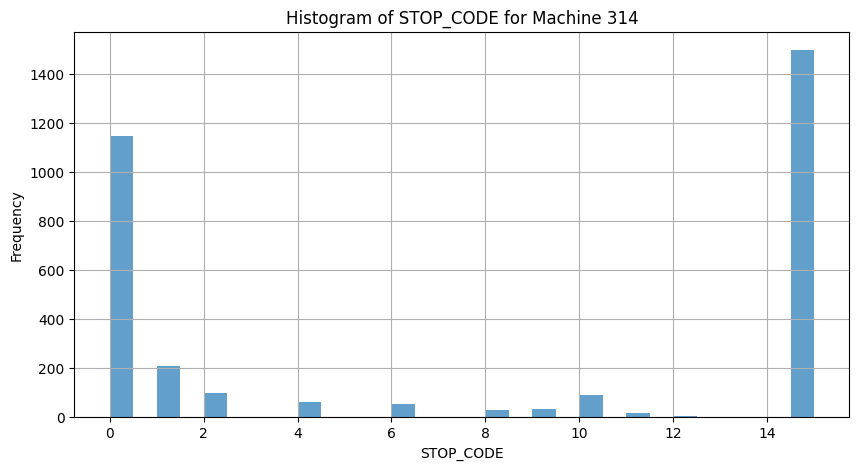

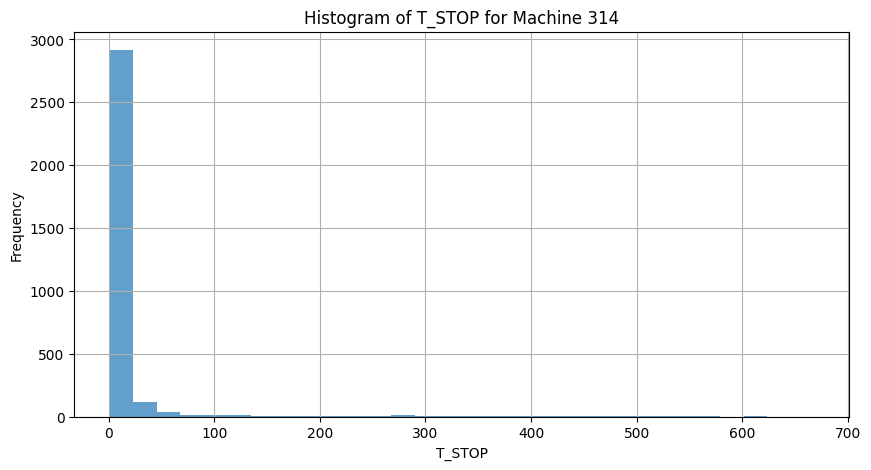

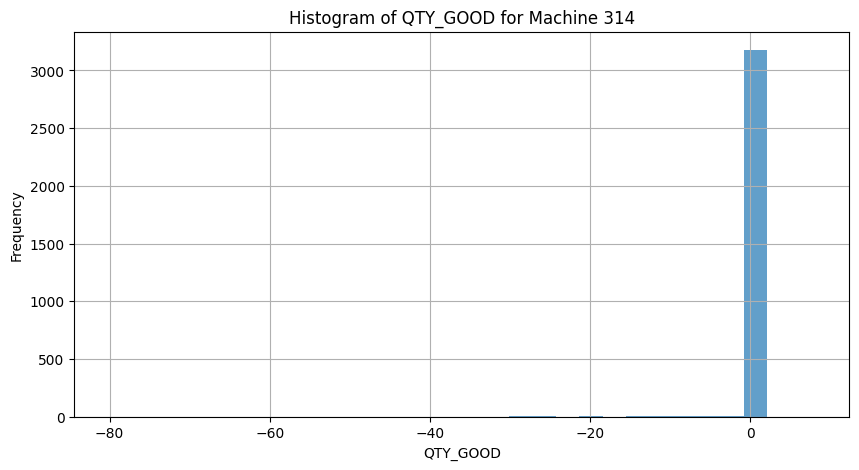

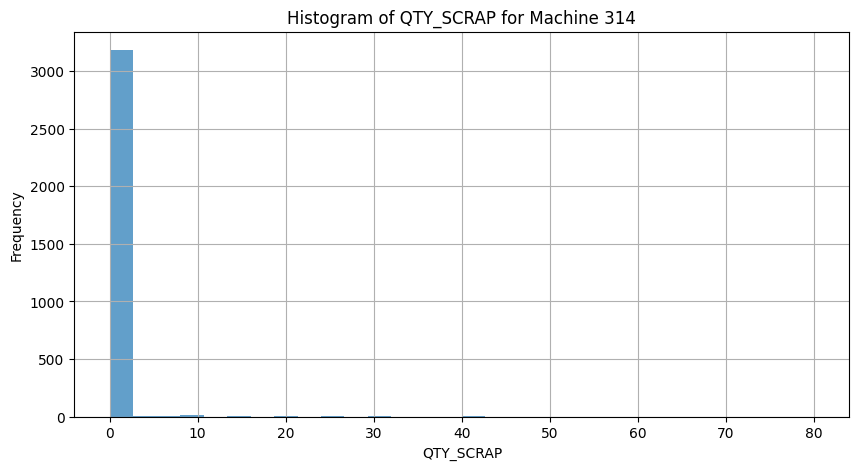

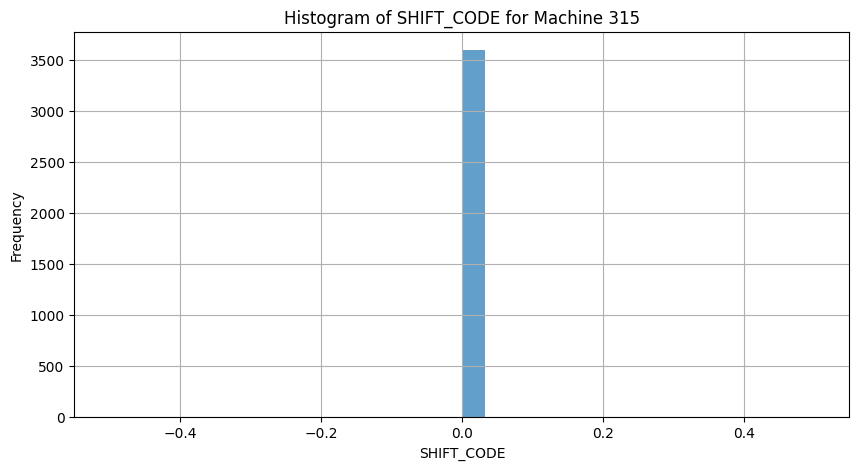

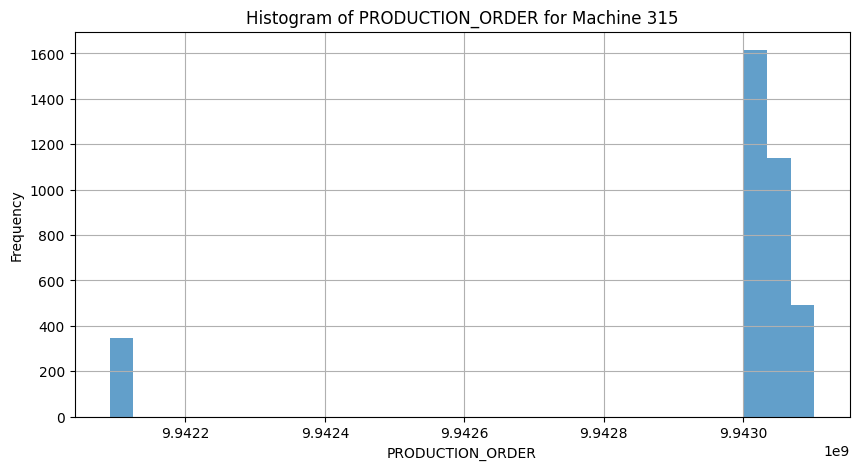

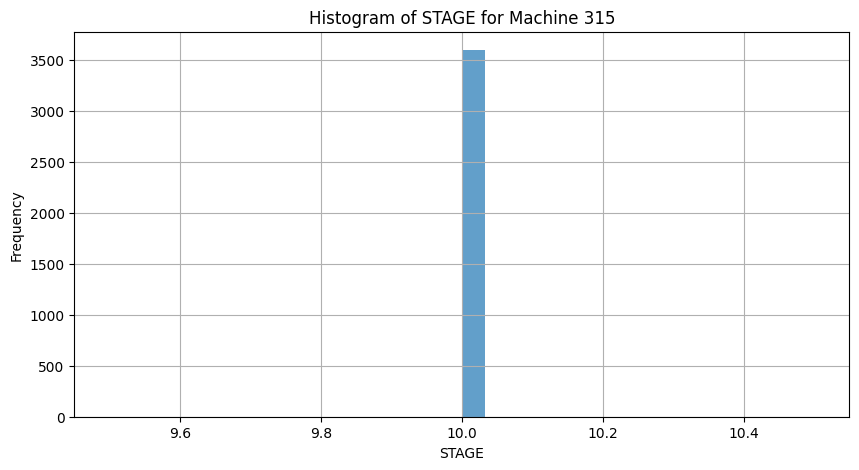

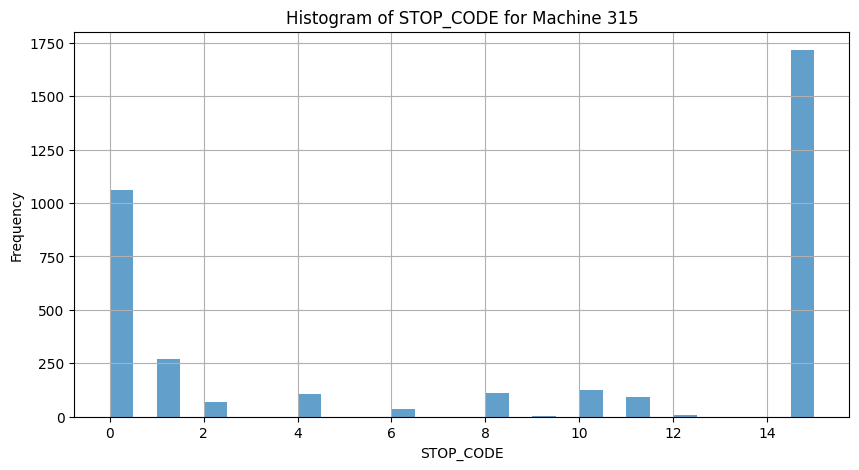

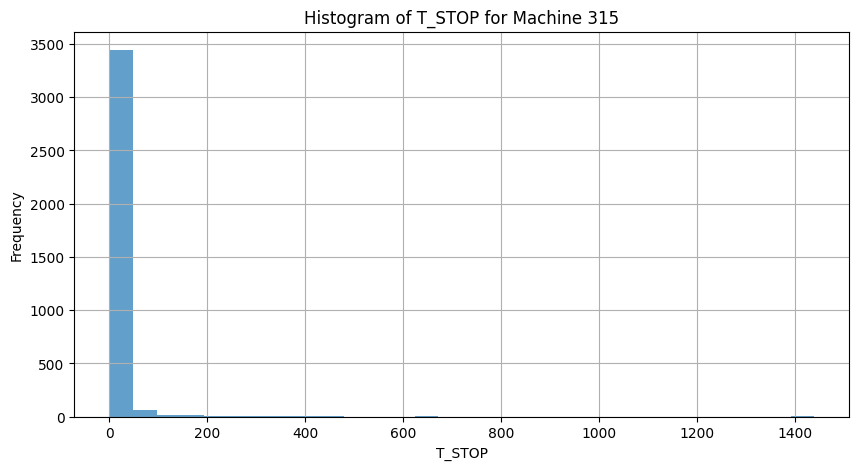

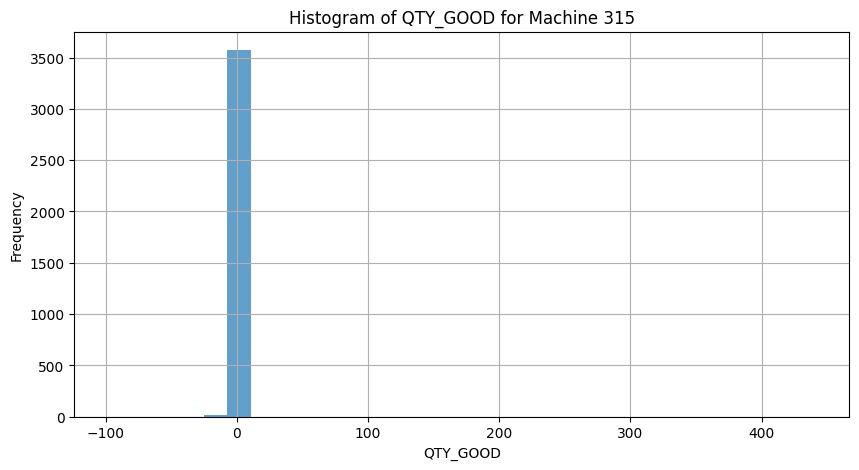

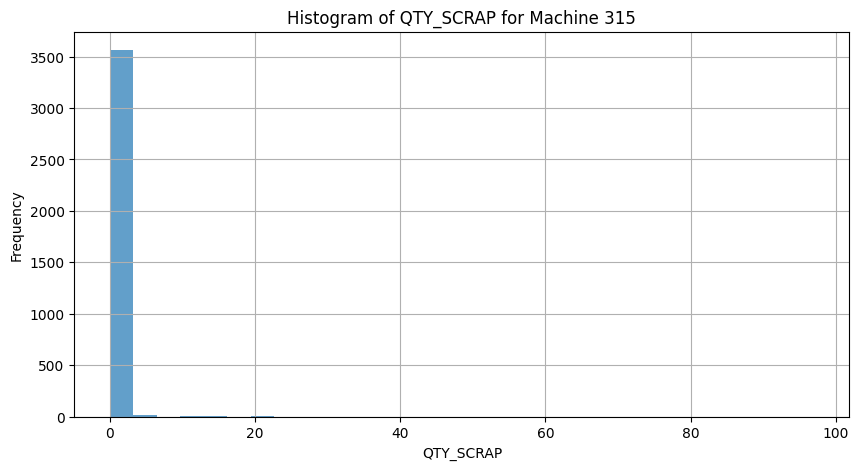

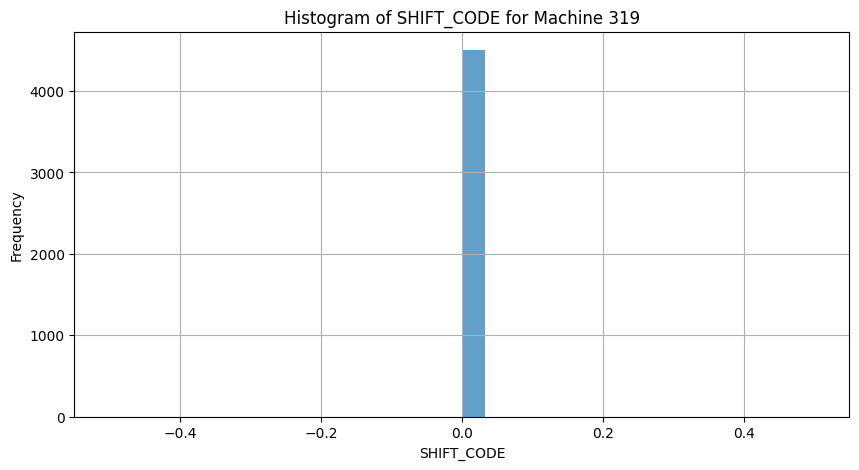

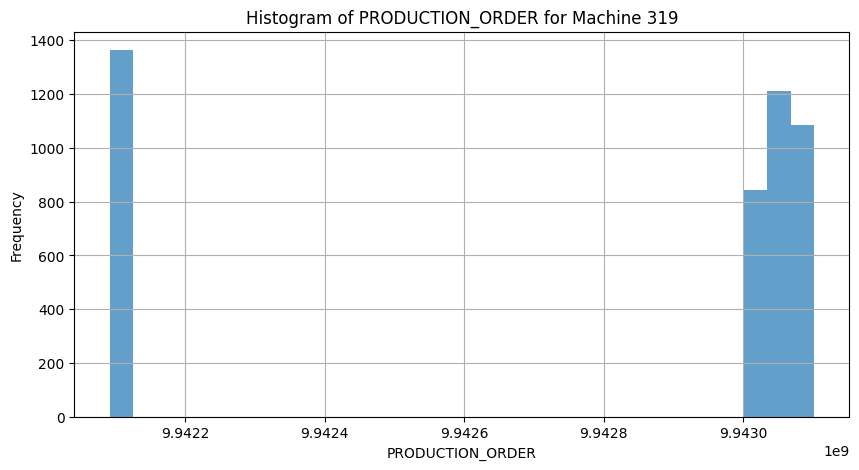

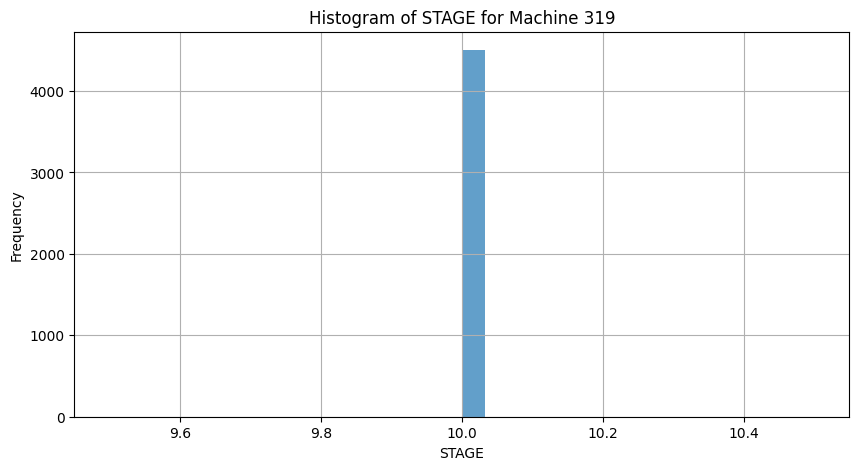

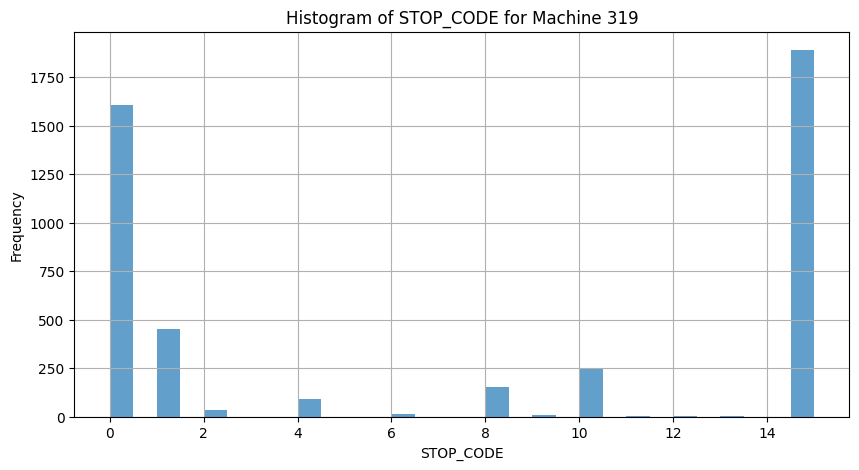

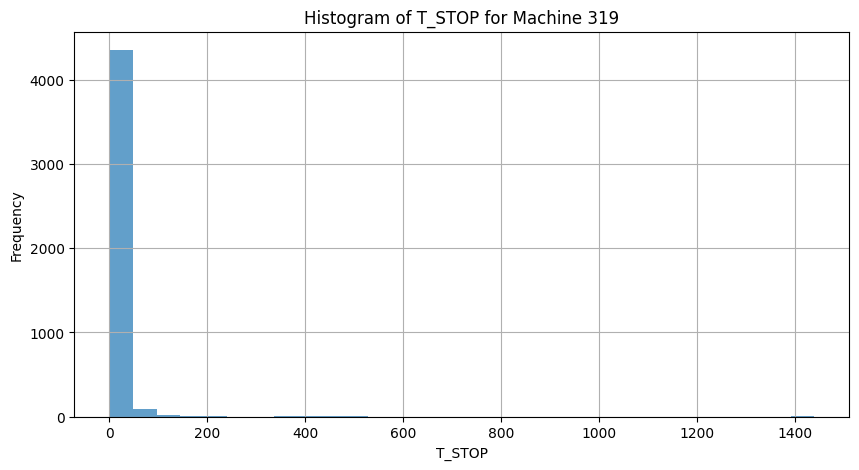

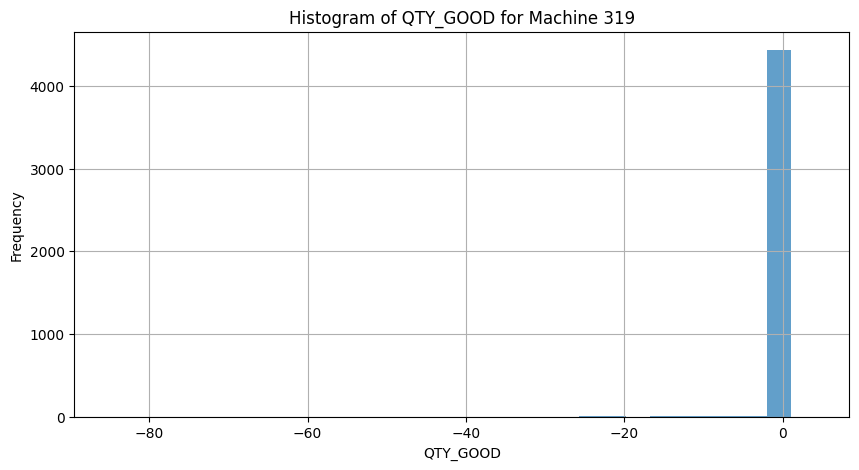

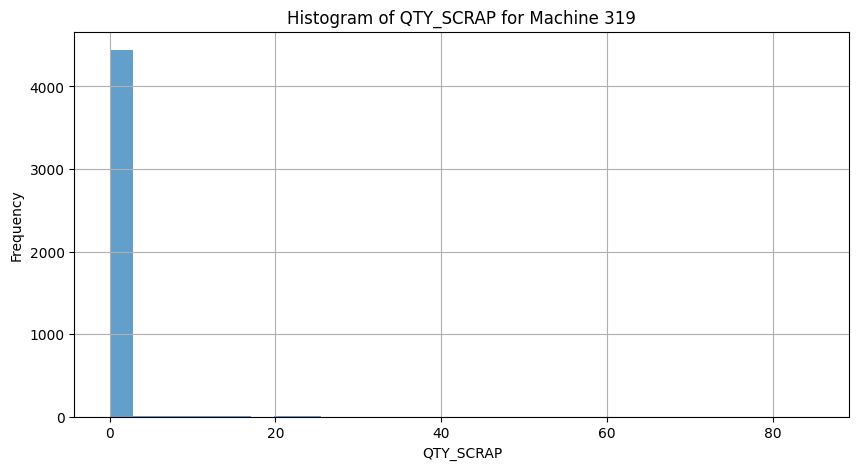

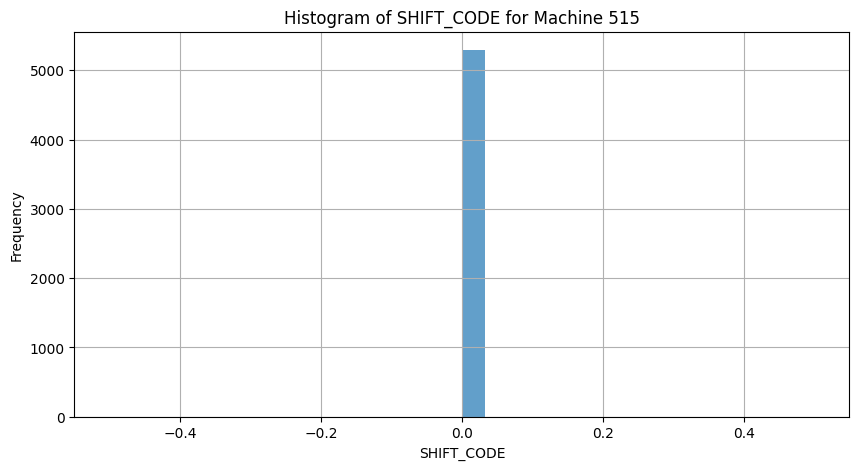

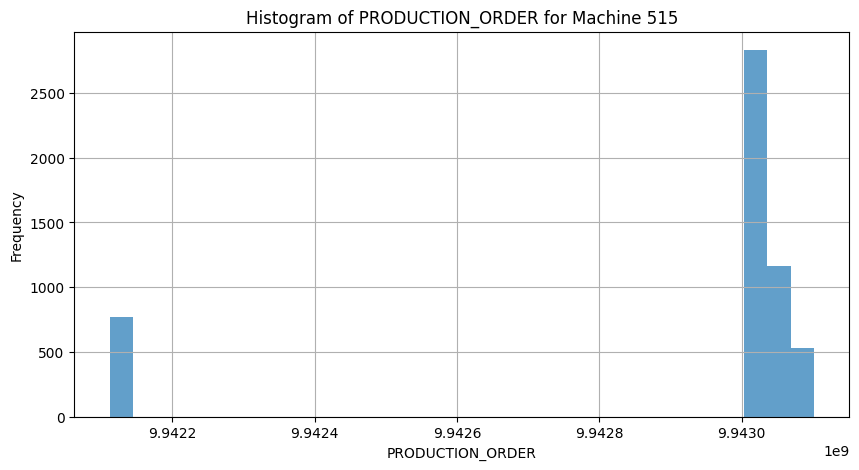

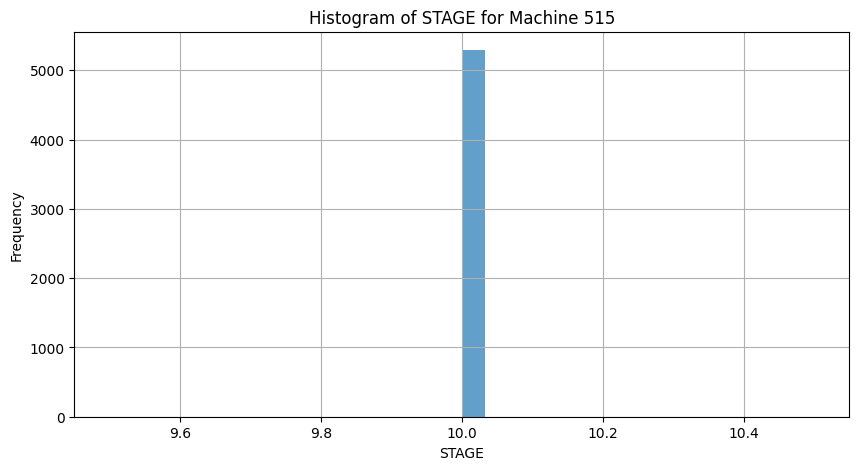

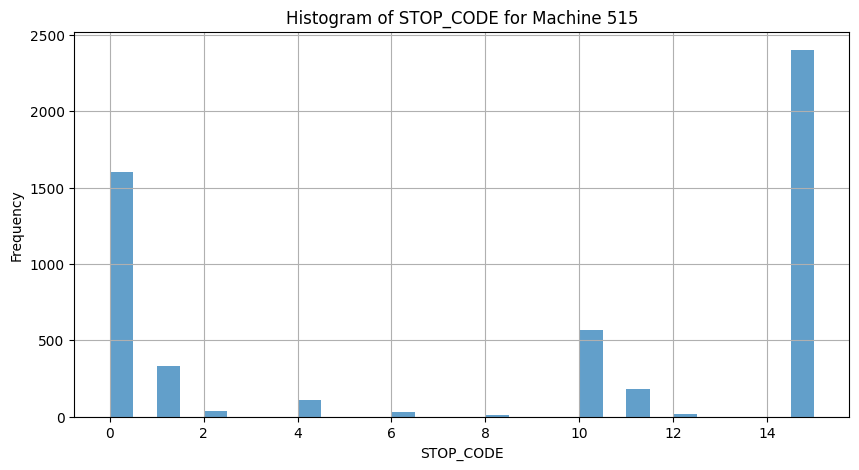

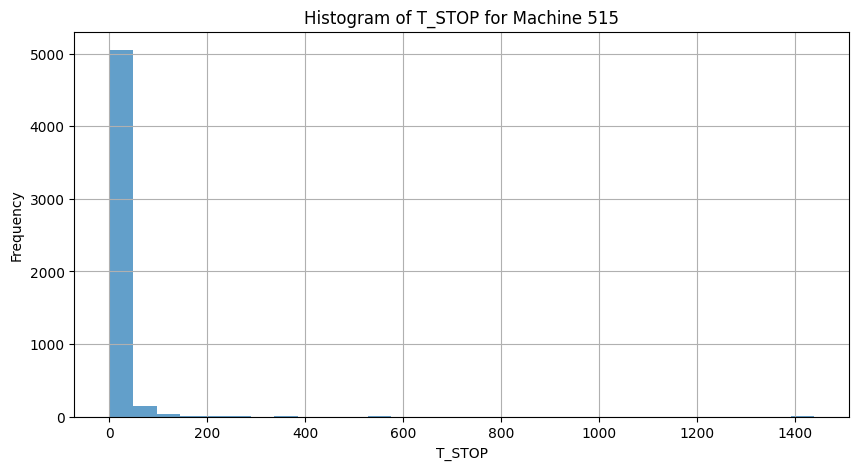

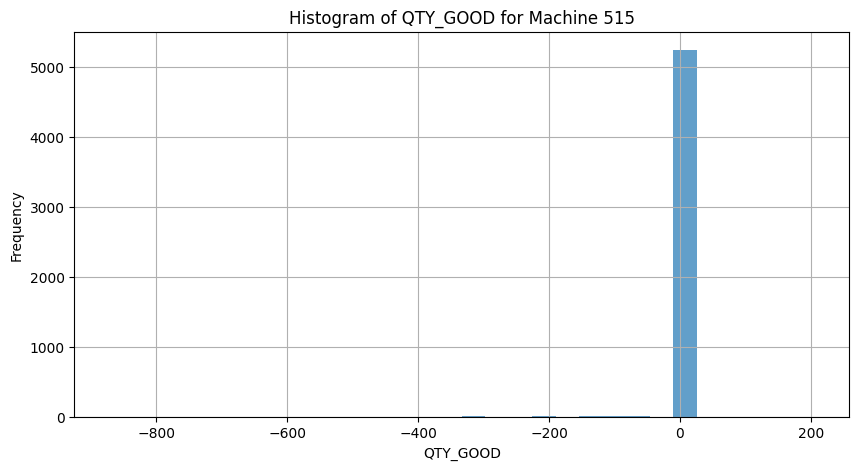

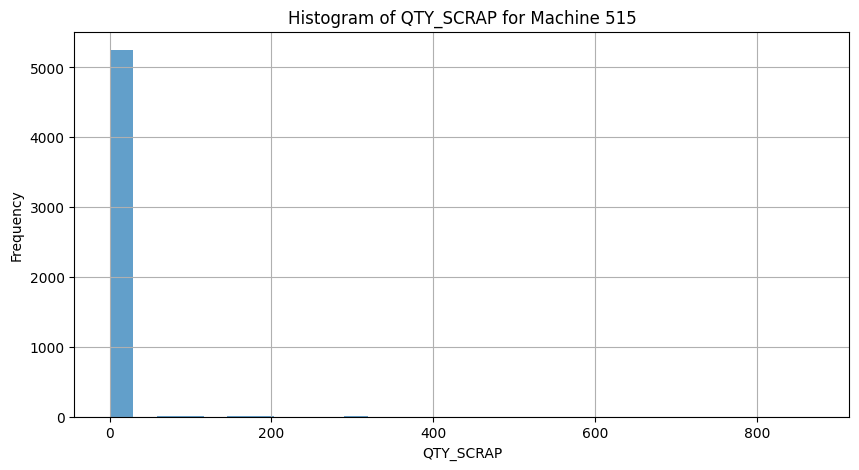

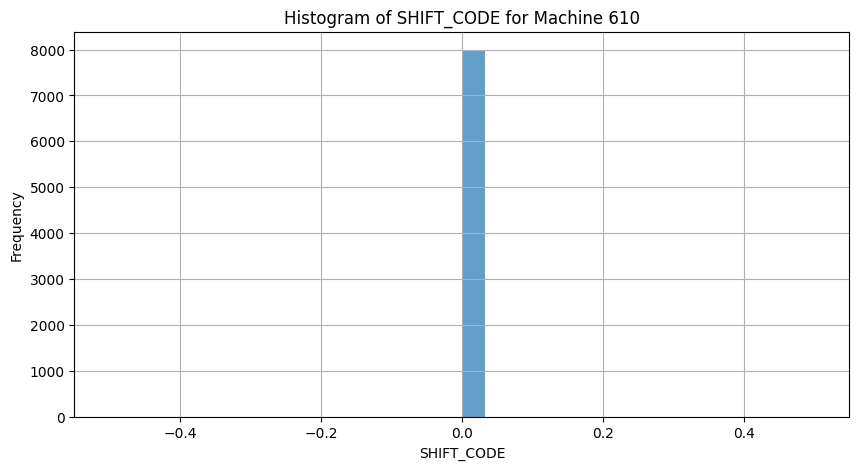

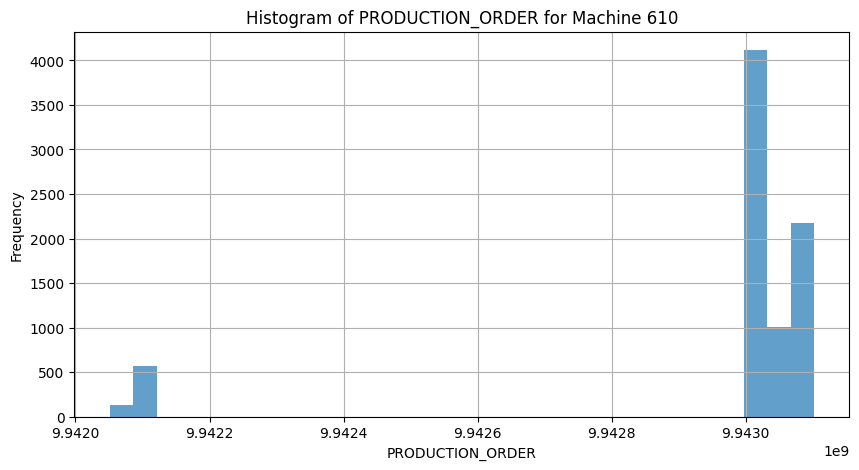

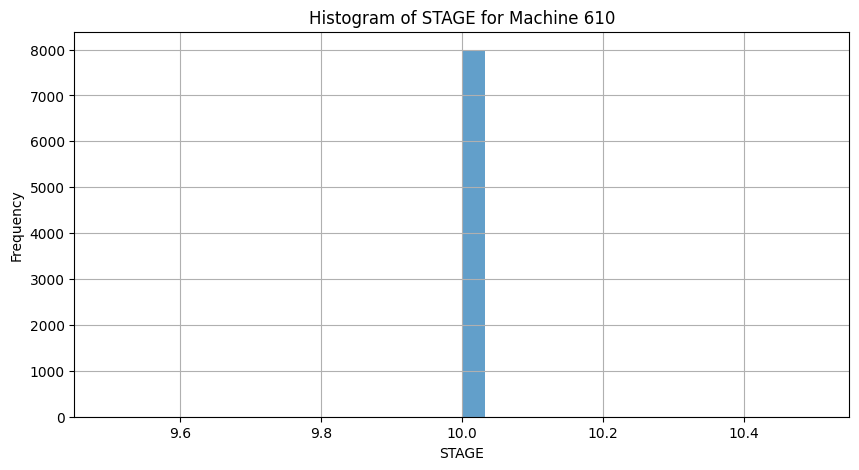

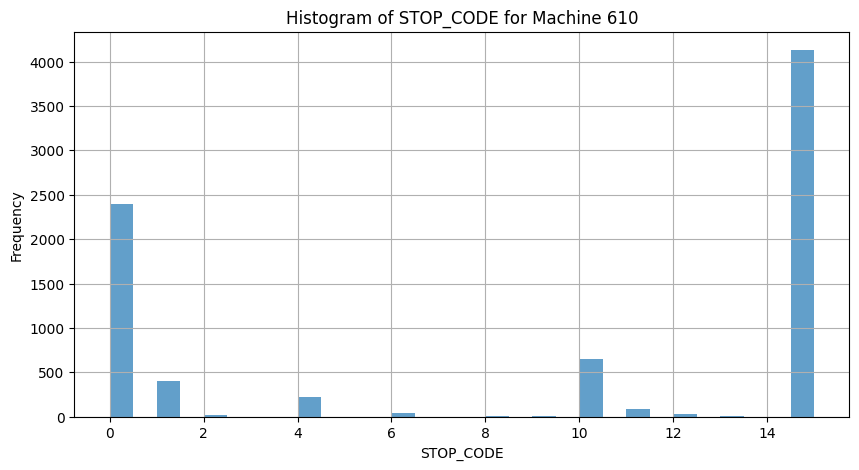

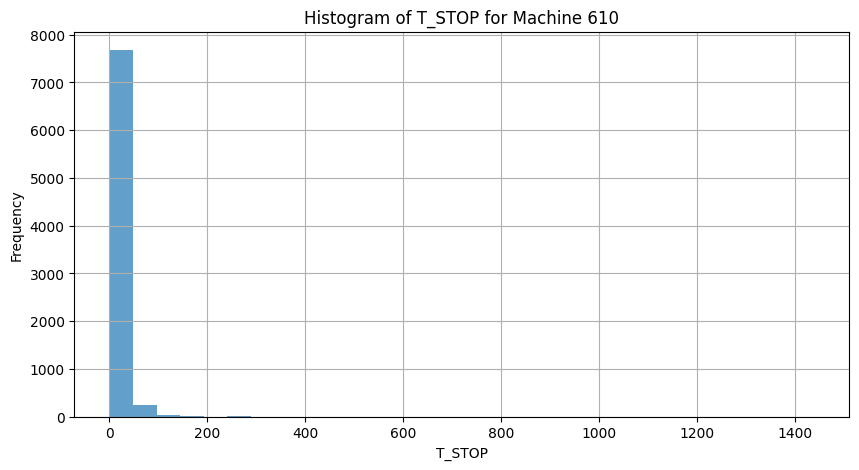

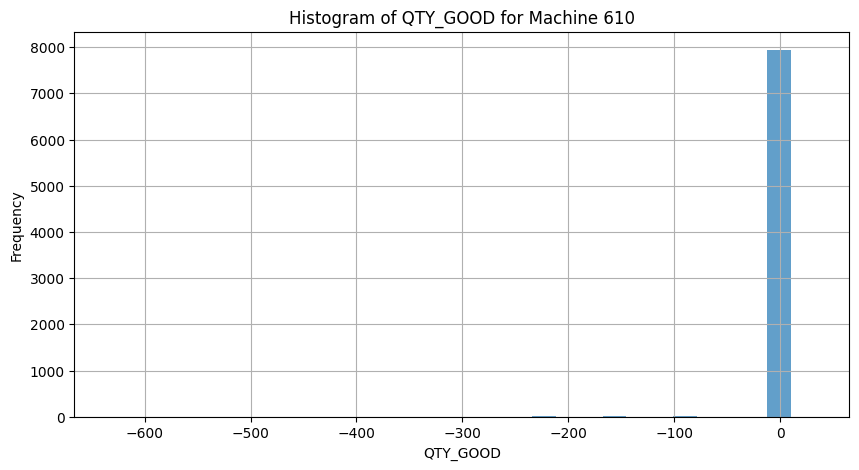

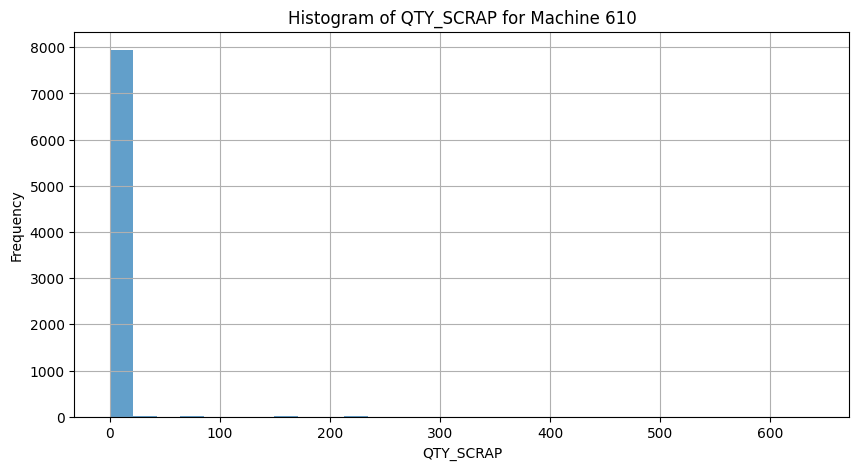

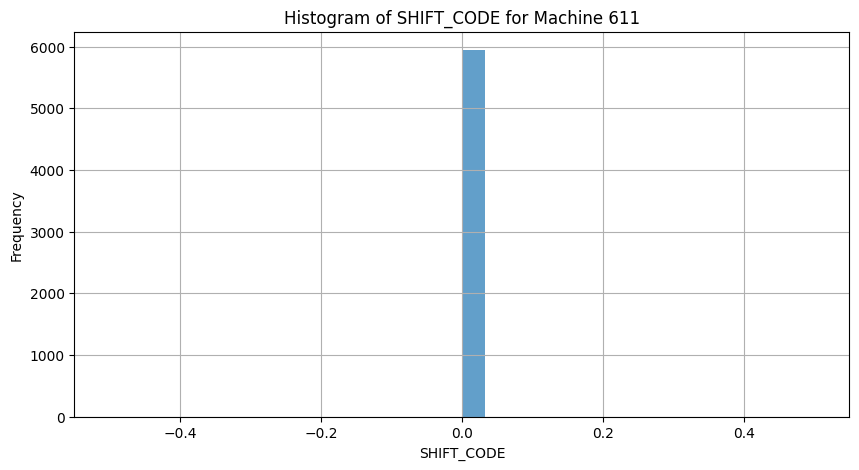

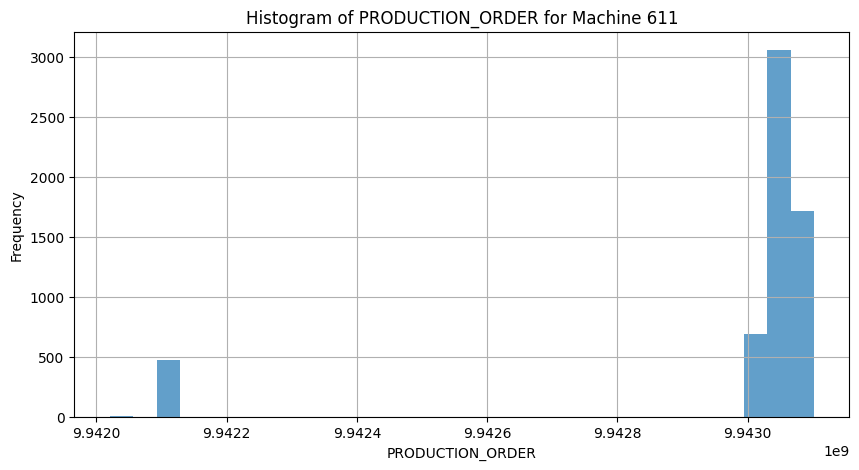

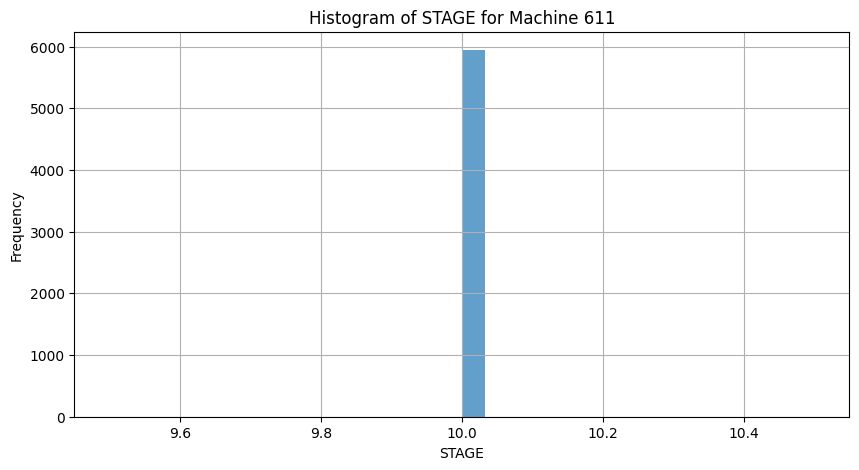

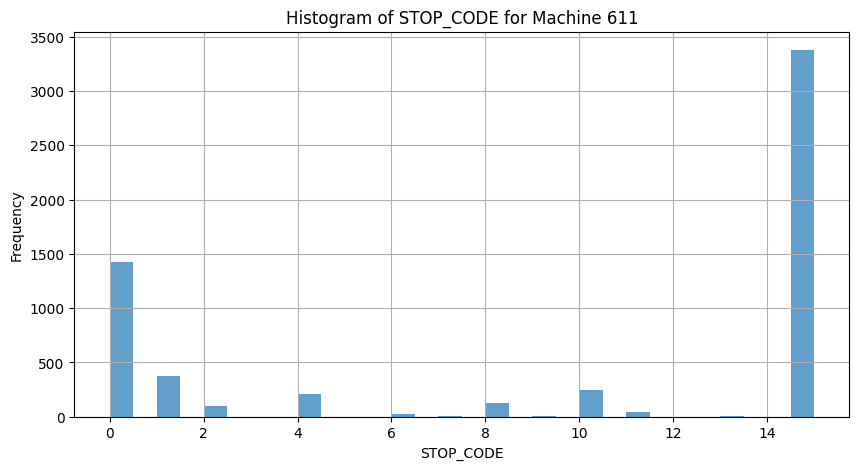

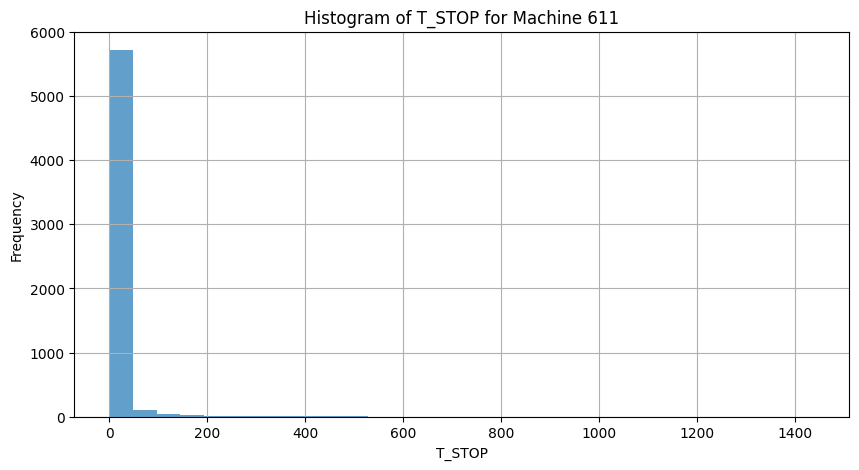

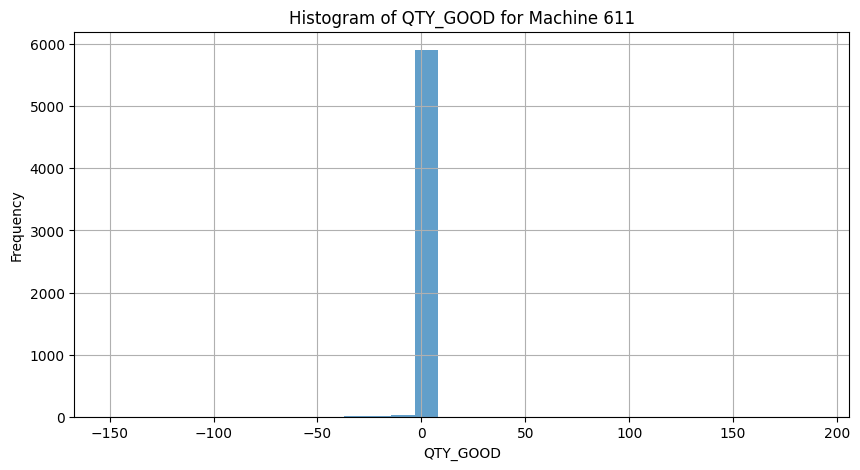

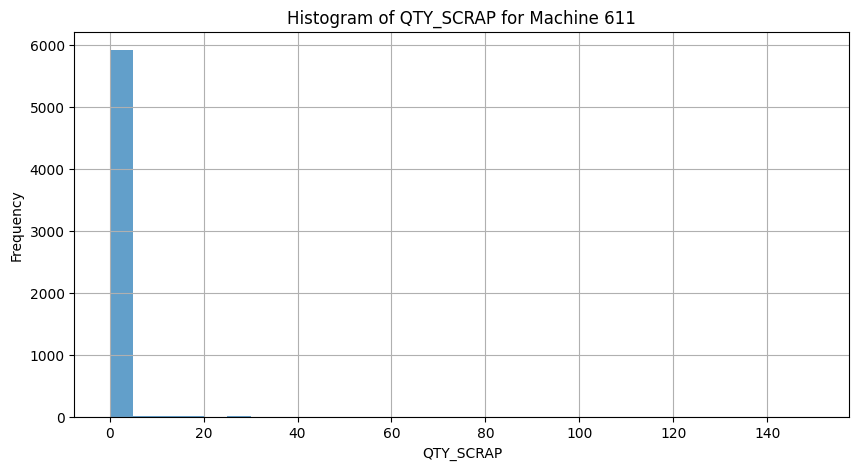

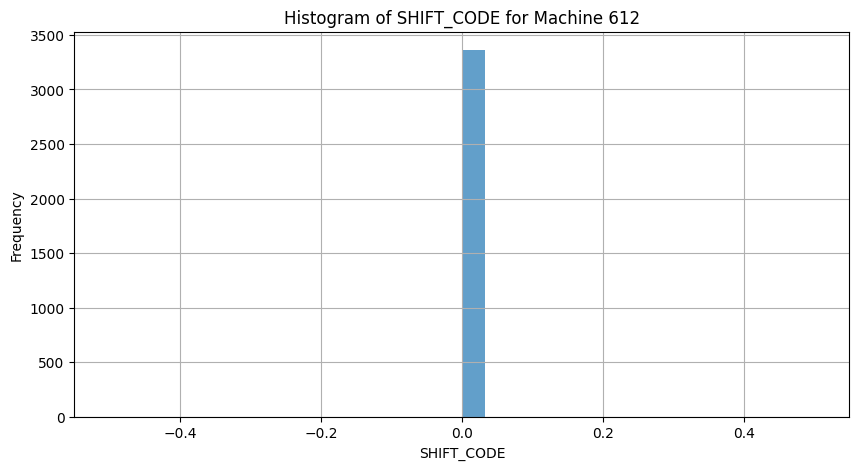

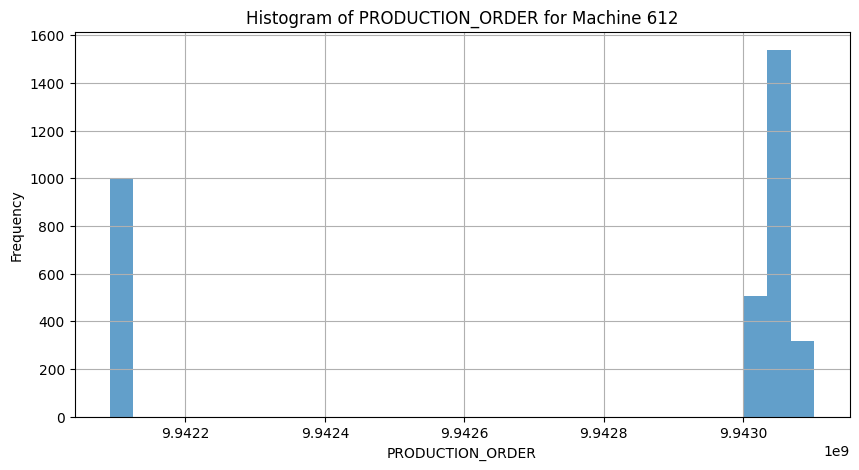

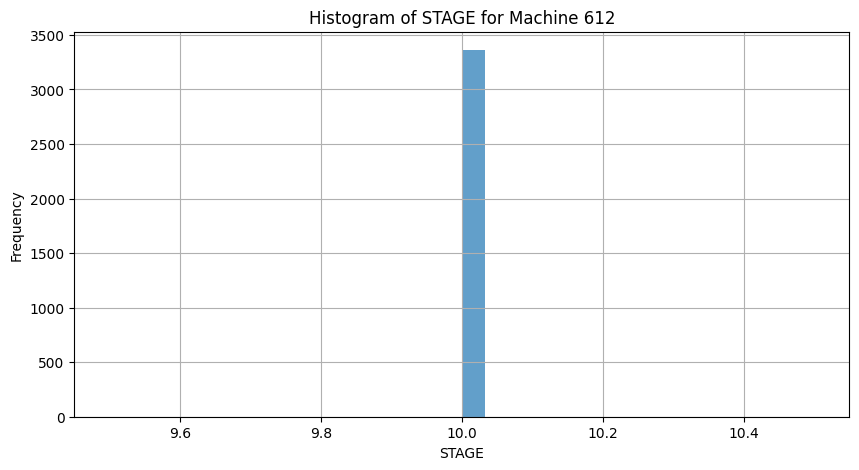

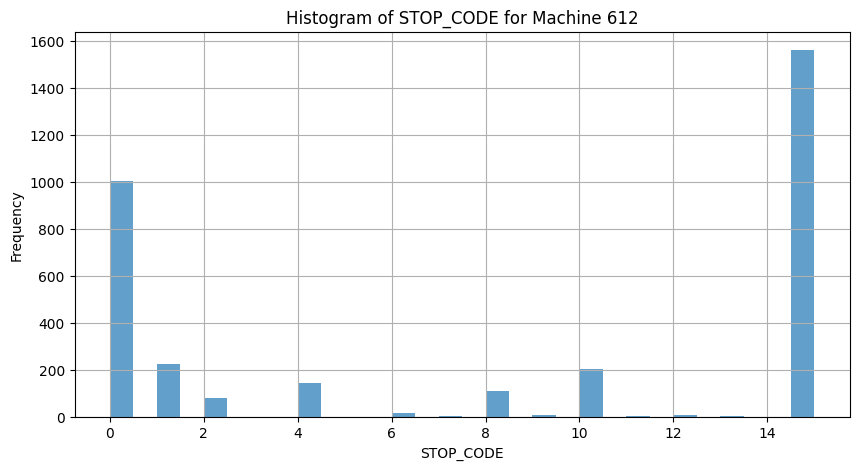

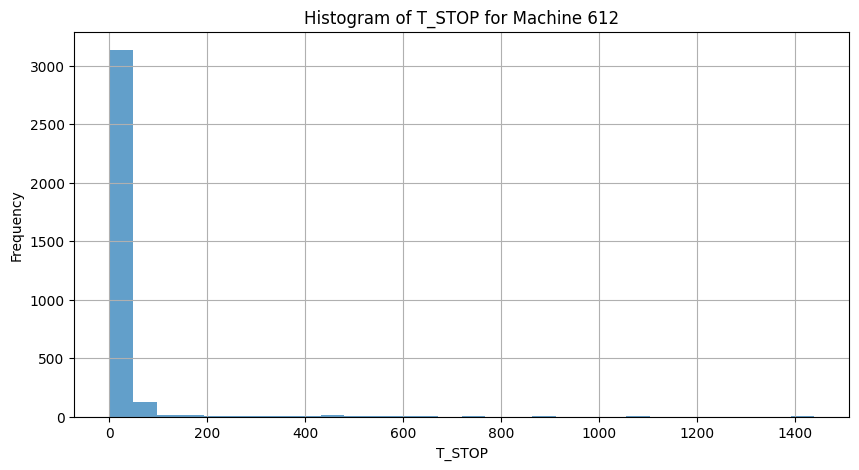

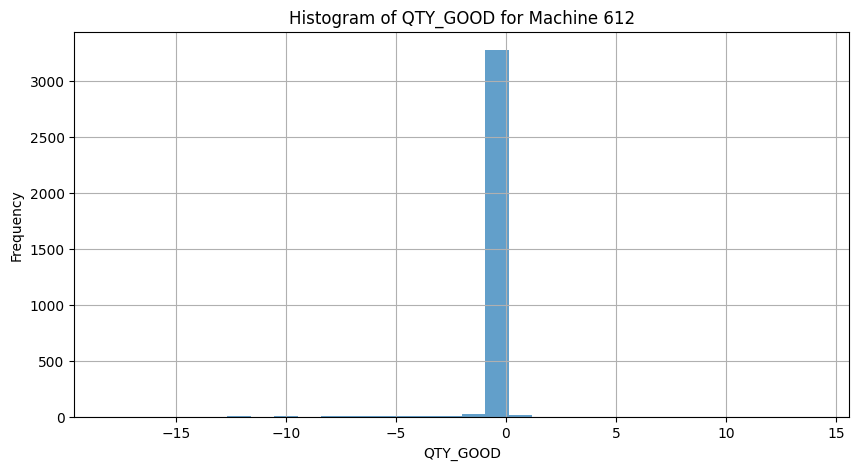

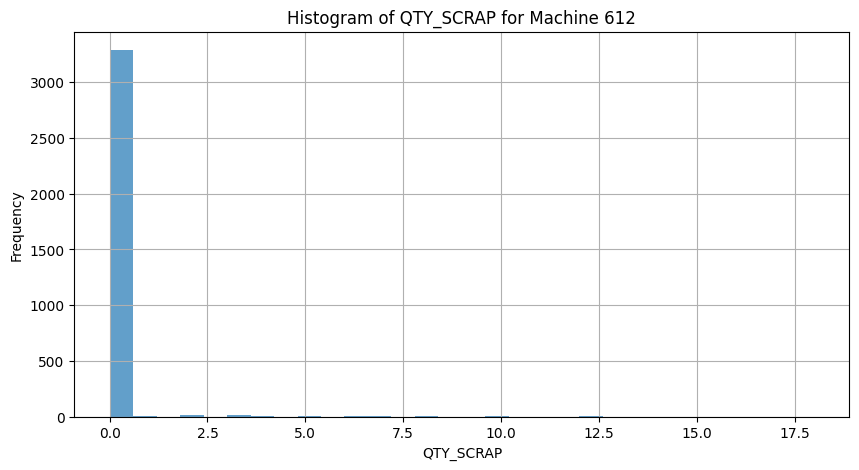

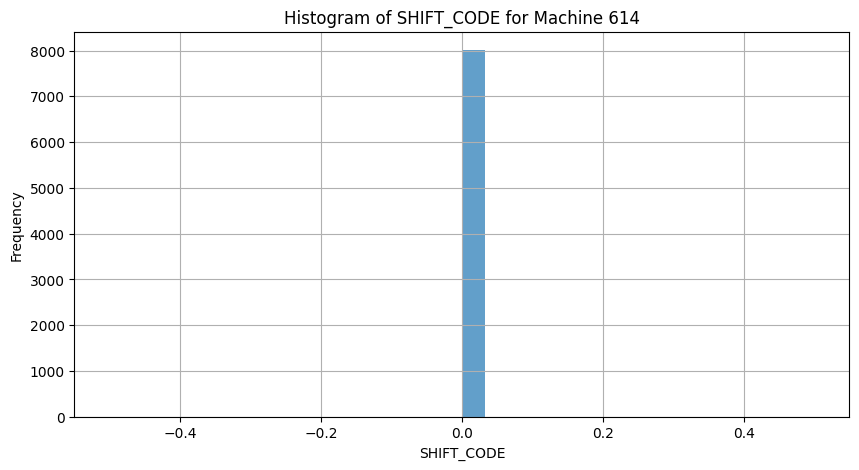

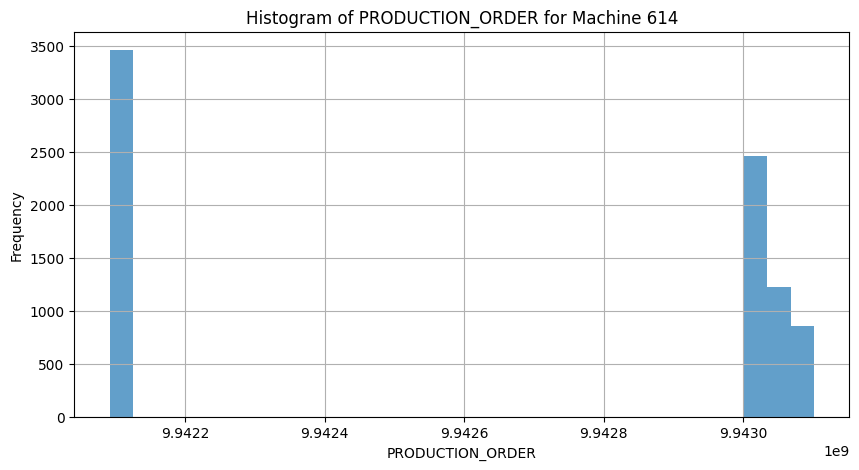

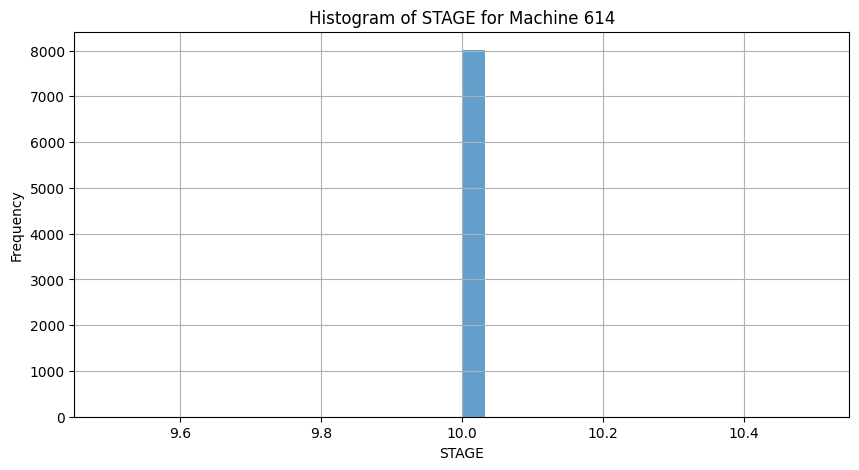

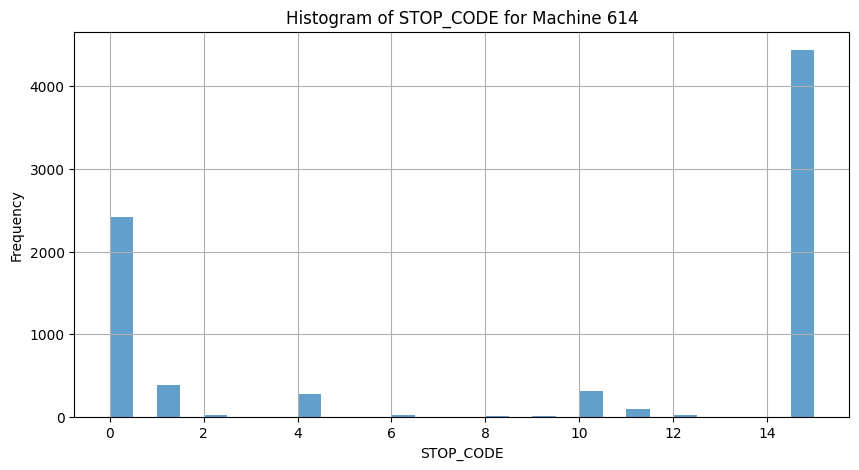

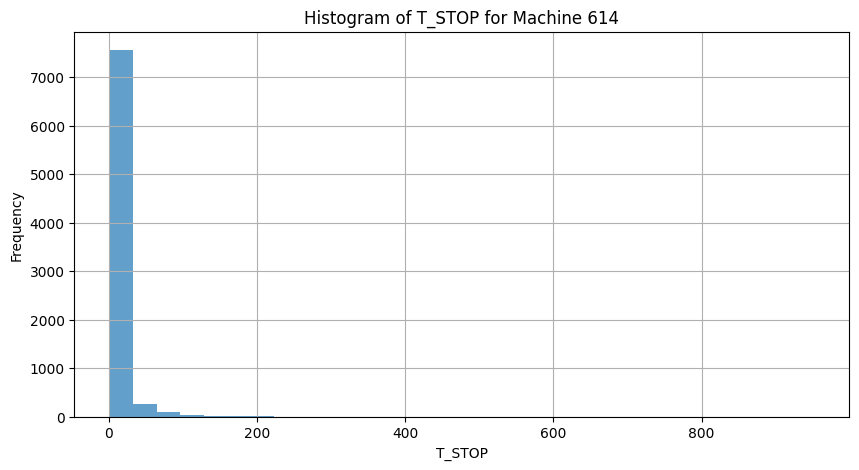

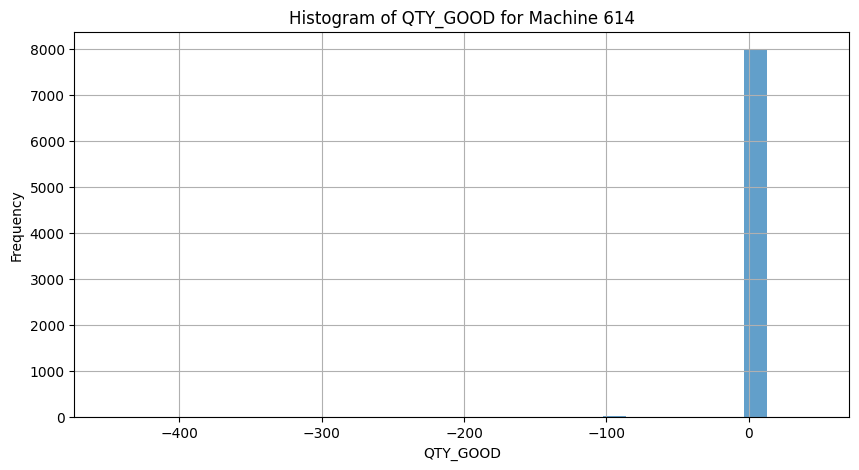

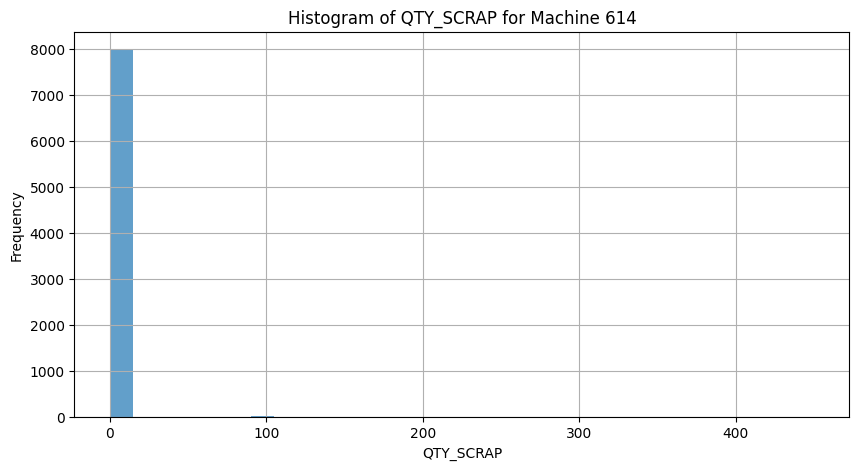

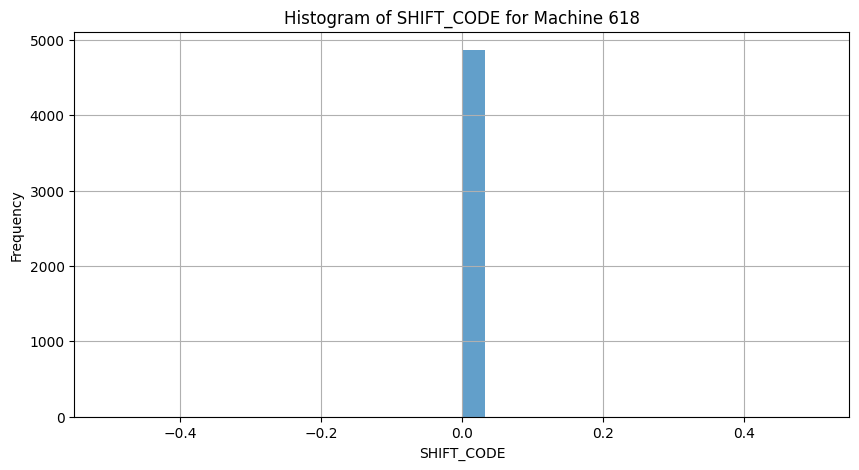

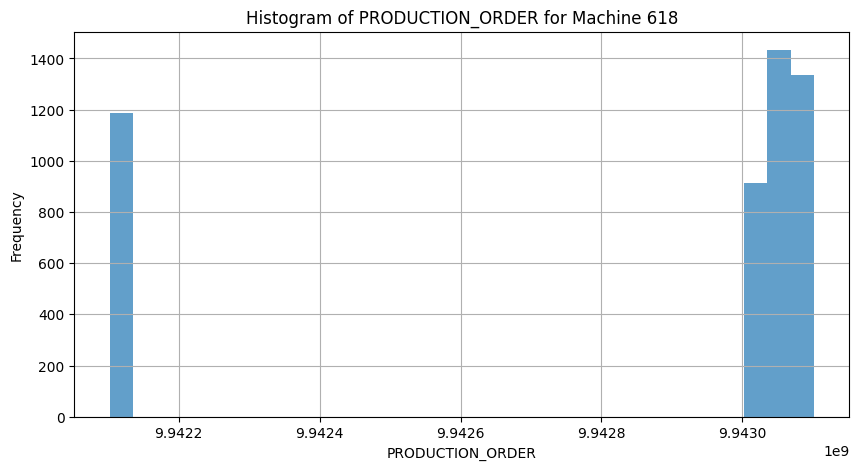

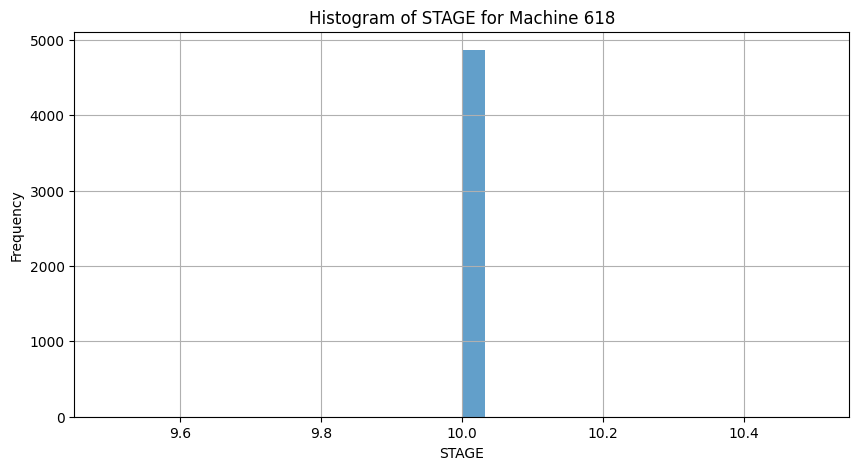

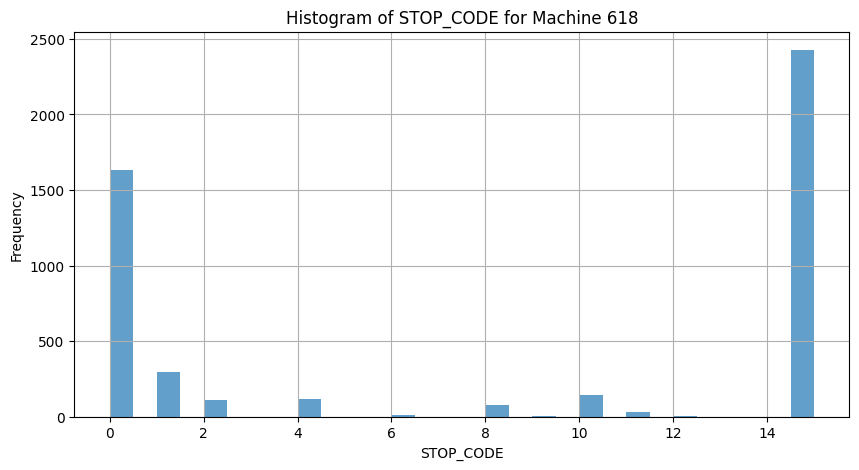

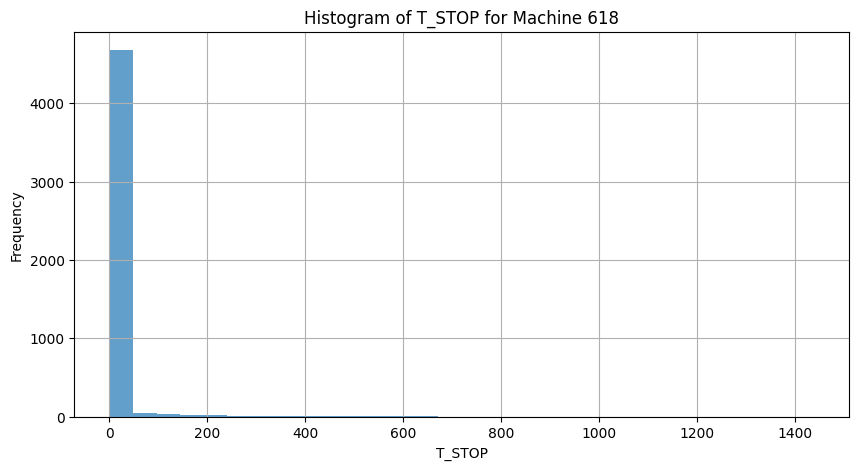

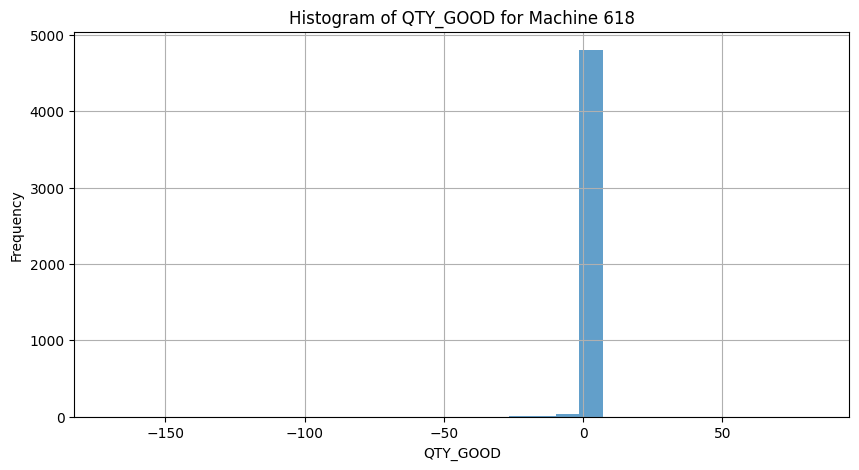

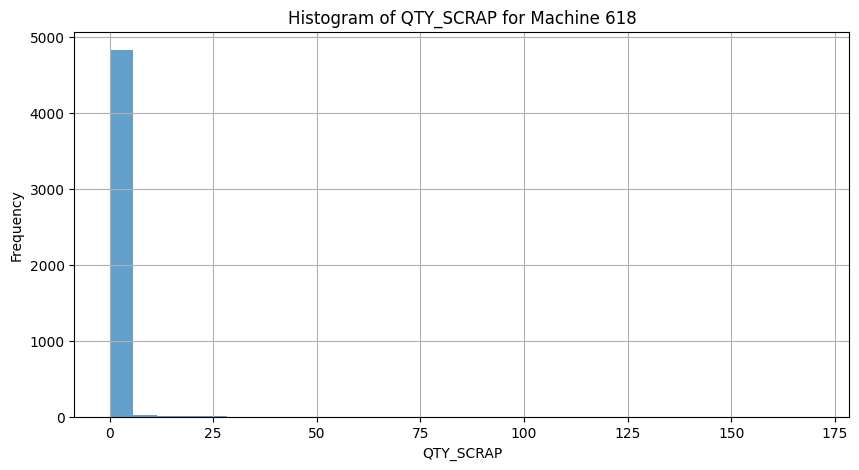

In [41]:
import matplotlib.pyplot as plt

# Get a list of all machine identifiers from the RESOURCE column
machines = fermate_df['RESOURCE'].unique()

# List of numerical columns for which to create histograms
numerical_columns = ['SHIFT_CODE', 'PRODUCTION_ORDER', 'STAGE', 'STOP_CODE', 'T_STOP', 'QTY_GOOD', 'QTY_SCRAP']

# Loop over each machine
for machine in machines:
    # Filter the dataframe for the current machine
    machine_data = fermate_df[fermate_df['RESOURCE'] == machine]

    # Plot a histogram for each numerical column
    for column in numerical_columns:
        plt.figure(figsize=(10, 5))
        plt.hist(machine_data[column], bins=30, alpha=0.7)
        plt.title(f'Histogram of {column} for Machine {machine}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()


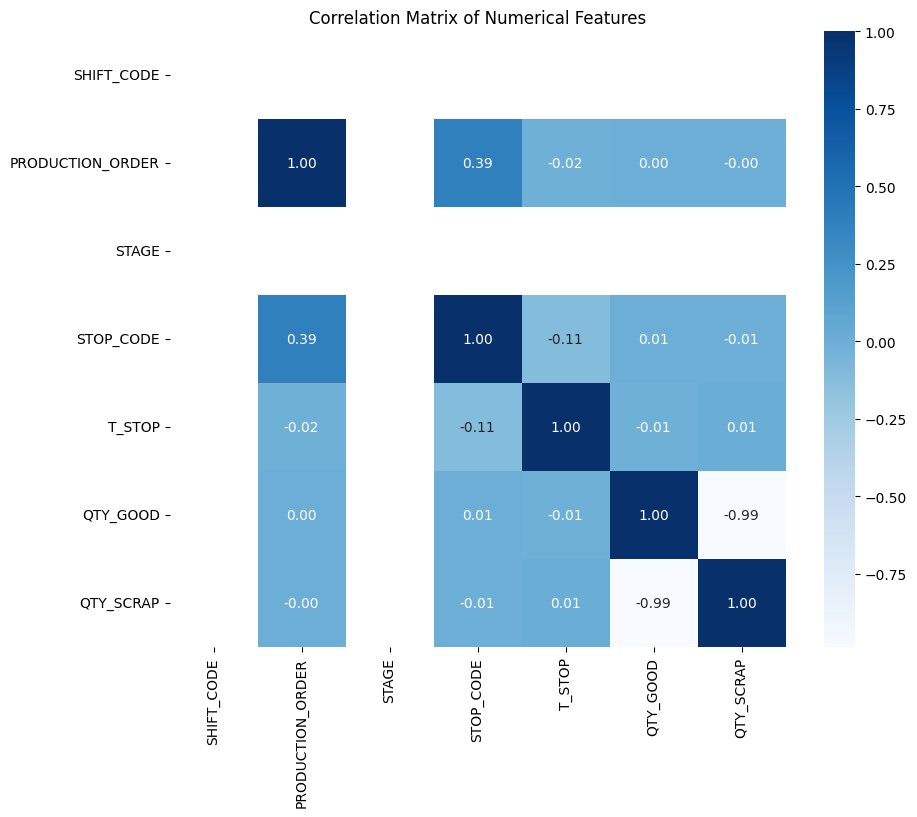

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming fermate_df is your DataFrame

# Select only the numerical columns for the correlation matrix
numerical_cols = ['SHIFT_CODE', 'PRODUCTION_ORDER', 'STAGE', 'STOP_CODE', 'T_STOP', 'QTY_GOOD', 'QTY_SCRAP']

# Calculate the correlation matrix
corr_matrix = fermate_df[numerical_cols].corr()

# Visualize the correlation matrix using a heatmap with a blue color palette
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='Blues', cbar=True, square=True)
plt.title('Correlation Matrix of Numerical Features')
plt.show()